# Load libraries and datasets

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.metrics import f1_score
import re

from pathlib import Path
import sys

root = str(Path().resolve().parents[0])
if root not in sys.path:
    sys.path.append(root)

from src.utils import ROOT, DATA_DIR, EXPERIMENTS_DIR, OUTPUT_DIR, DATA_PATHS

for path in [ROOT, DATA_DIR, EXPERIMENTS_DIR, OUTPUT_DIR]:
    if str(path.resolve()) not in sys.path:
        sys.path.append(str(path.resolve()))

print(*sys.path, sep="\n")

from importlib import reload
import src

reload(src)
reload(src.utils)
reload(src.custom_transformers)
reload(src.custom_model_selection)
reload(src.experiment_runner)
reload(src.config_parser)

sns.set_style("whitegrid")

/usr/lib/python312.zip
/usr/lib/python3.12
/usr/lib/python3.12/lib-dynload

/home/ryanwtsai/repos/ml_ai_portfolio/notes/example_code/venv/lib/python3.12/site-packages
/home/ryanwtsai/repos/ml_ai_portfolio/titanic
/home/ryanwtsai/repos/ml_ai_portfolio/titanic/dataset
/home/ryanwtsai/repos/ml_ai_portfolio/titanic/experiments
/home/ryanwtsai/repos/ml_ai_portfolio/titanic/outputs


In [4]:
from src.utils import load_titanic_data

df, _, _ = load_titanic_data(load_X_y=False, extracted=True)

# Univariate

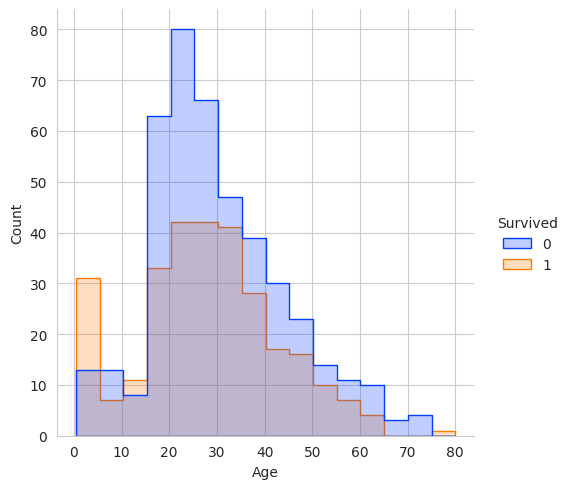

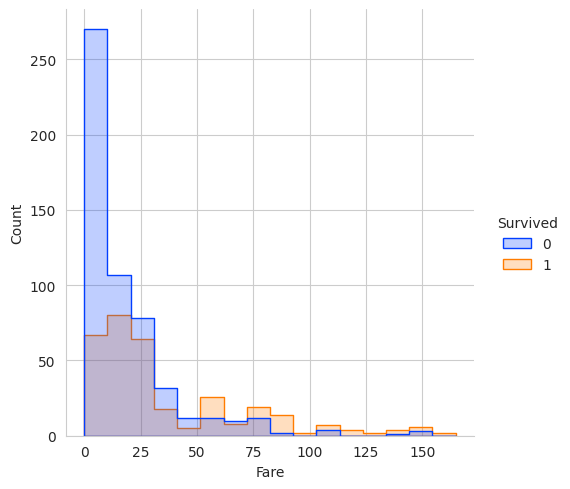

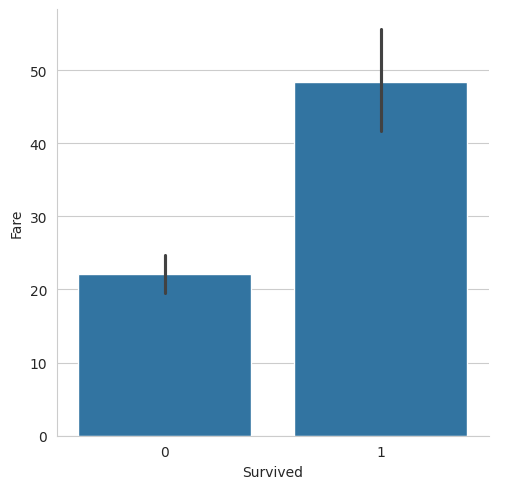

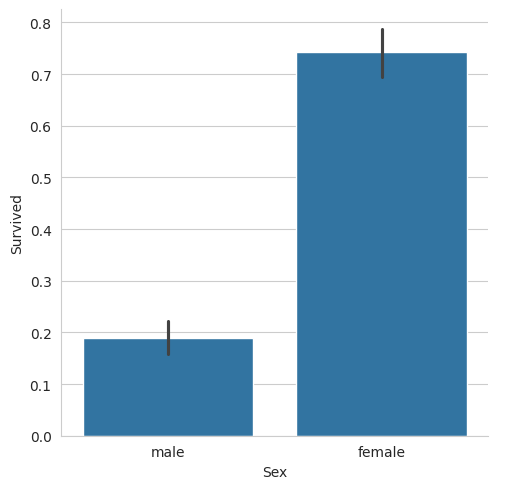

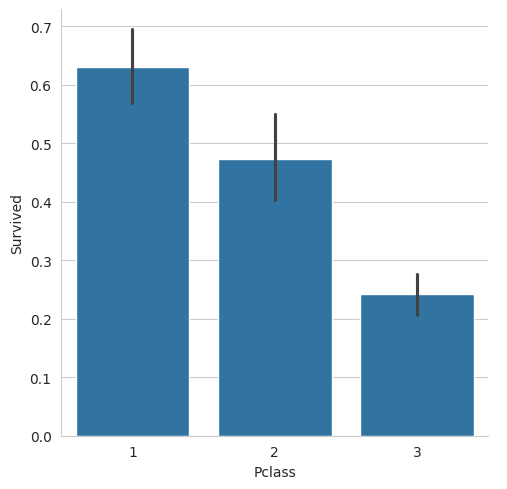

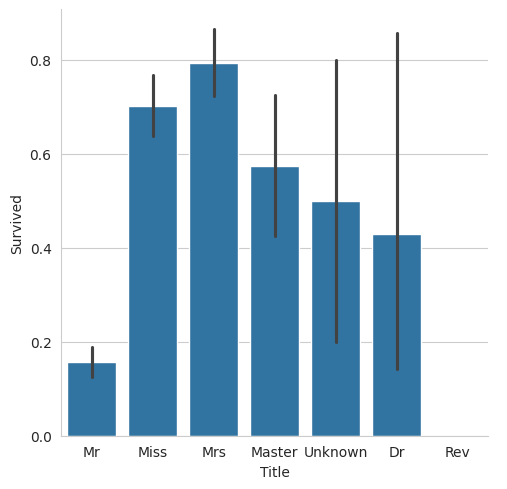

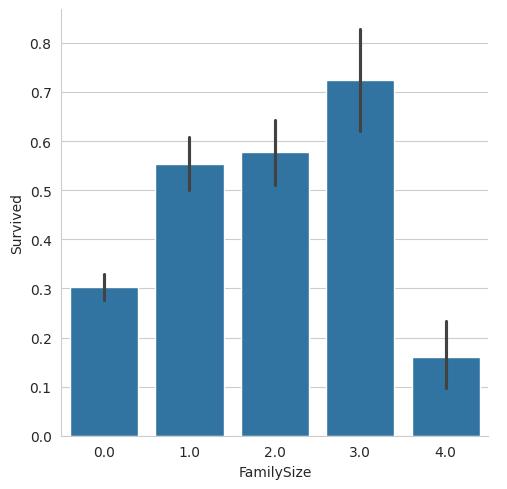

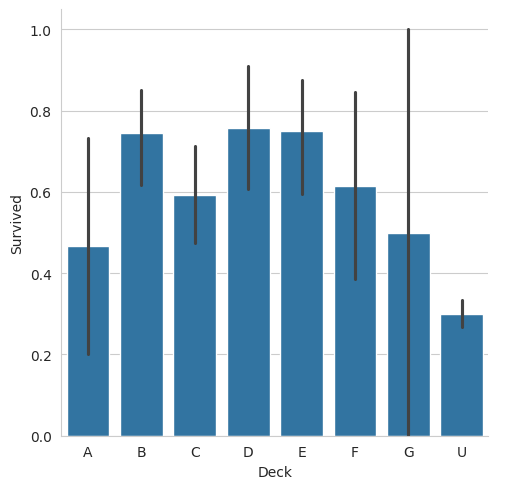

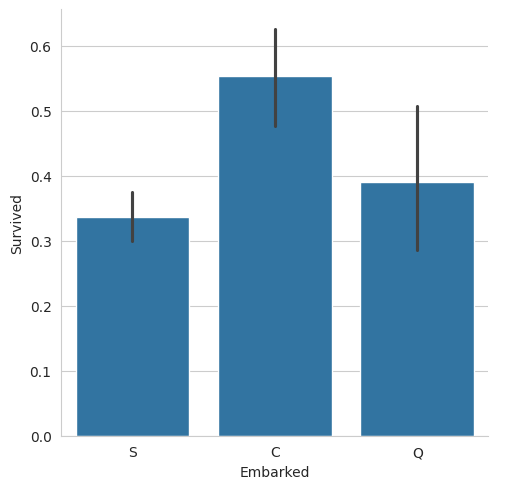

In [7]:
g = sns.displot(df, x="Age", hue="Survived", element="step", binwidth=5, palette="bright")
# g = sns.catplot(df, x="AgeBin", y="Survived", kind="bar", aspect=1.5)
# g = sns.catplot(df, x="AgeMissing", y="Survived", kind="bar")
g = sns.displot(df.loc[df["Fare"] < 200], x="Fare", hue="Survived", binwidth=10, palette="bright", element="step")
g = sns.catplot(df, x="Survived", y="Fare", kind="bar")
# g = sns.catplot(df, x="FareBin", y="Survived", kind="bar", aspect=2)
g = sns.catplot(df, x="Sex", y="Survived", kind="bar")
g = sns.catplot(df, x="Pclass", y="Survived", kind="bar")
g = sns.catplot(df, x="Title", y="Survived", kind="bar", order=df.Title.value_counts().sort_values(ascending=False).index)
# g = sns.catplot(df, x="FamilySize", y="Survived", kind="bar")
g = sns.catplot(pd.concat((df[["FamilySize"]].clip(upper=4), df[["Survived"]]), axis=0), x="FamilySize", y="Survived", kind="bar")
# g = sns.displot(df, x="FamilySize", hue="Survived", element="step", discrete=True, palette="bright")
# g = sns.catplot(df, x="SibSp", y="Survived", kind="bar")
# g = sns.catplot(df, x="Parch", y="Survived", kind="bar")
g = sns.catplot(df, x="Deck", y="Survived", kind="bar", order=sorted(df.Deck.unique()))
g = sns.catplot(df, x="Embarked", y="Survived", kind="bar", order=df.Embarked.value_counts().sort_values(ascending=False).index)

## Age transformation

## Fare transformation

In [ ]:
from sklearn.preprocessing import RobustScaler, PowerTransformer, QuantileTransformer, KBinsDiscretizer

pow = PowerTransformer()
df["FareYeo"] = pow.fit_transform(df[["Fare"]])
pow.set_params(method="box-cox")
df["FareBoxCox"] = pow.fit_transform(df[["Fare"]].clip(lower=1))

g = sns.displot(df, kind="hist", x="FareYeo", color="blue", label="FareYeo", element="step")
sns.histplot(df, x="FareBoxCox", color="orange", label="FareBoxCox", alpha=0.5, ax=g.ax, element="step")
g.ax.legend()
g.ax.set_title("Fare Power Transform")
g.ax.set_xlabel("Fare")

g = sns.displot(df, kind="hist", x="FareYeo", color="blue", label="FareYeo", element="step", hue="Survived", palette="bright")
g = sns.displot(df, kind="hist", x="FareBoxCox", element="step", hue="Survived", palette="bright")

/home/ryanwtsai/repos/ml_ai_portfolio/notes/example_code/venv/lib/python3.12/site-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (891). n_quantiles is set to n_samples.
  warnings.warn(
/home/ryanwtsai/repos/ml_ai_portfolio/notes/example_code/venv/lib/python3.12/site-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (891). n_quantiles is set to n_samples.
  warnings.warn(


179      0.0000
258    512.3292
263      0.0000
271      0.0000
277      0.0000
302      0.0000
413      0.0000
466      0.0000
481      0.0000
597      0.0000
633      0.0000
674      0.0000
679    512.3292
732      0.0000
737    512.3292
806      0.0000
815      0.0000
822      0.0000
Name: Fare, dtype: float64

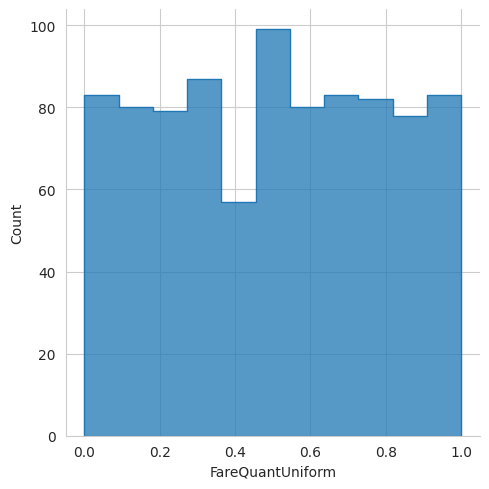

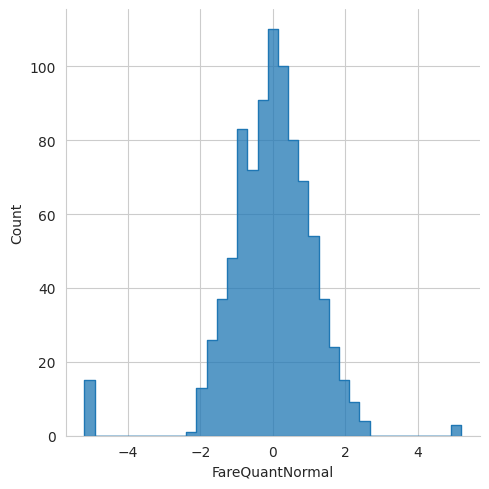

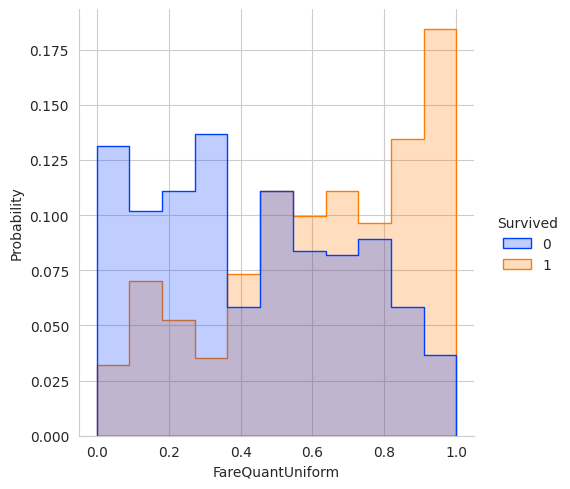

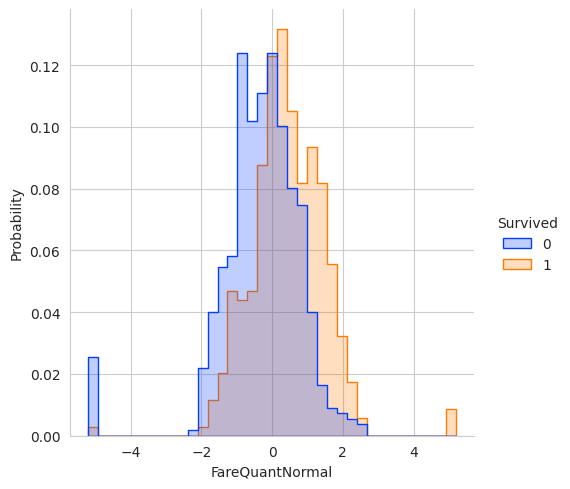

In [10]:
qu = QuantileTransformer()
df["FareQuantUniform"] = qu.fit_transform(df[["Fare"]])
qu.set_params(output_distribution="normal")
df["FareQuantNormal"] = qu.fit_transform(df[["Fare"]])

g = sns.displot(df, kind="hist", x="FareQuantUniform", label="FareQuantUniform", element="step")
g = sns.displot(df, kind="hist", x="FareQuantNormal", label="FareQuantNormal", element="step")
g = sns.displot(df, kind="hist", x="FareQuantUniform", label="FareQuantUniform", element="step", hue="Survived", palette="bright", stat="probability", common_norm=False)
g = sns.displot(df, kind="hist", x="FareQuantNormal", label="FareQuantNormal", element="step", hue="Survived", palette="bright", stat="probability", common_norm=False)

df.query("FareQuantNormal < -4 or FareQuantNormal > 4")["Fare"]

[array([  0.    ,   7.9104,  14.4542,  31.    , 512.3292])]


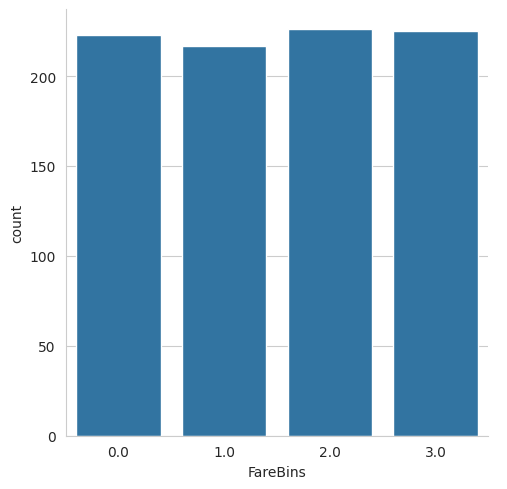

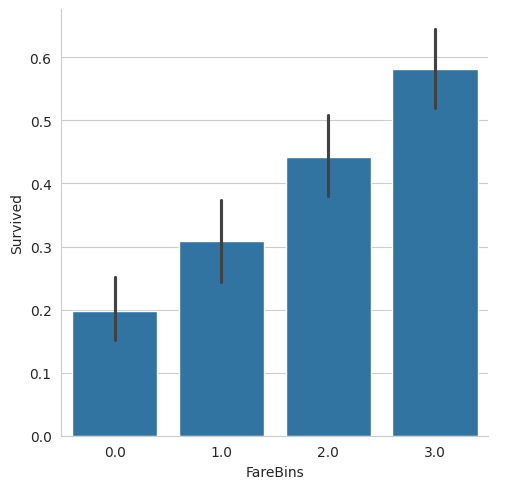

In [13]:
kbins = KBinsDiscretizer(n_bins=4, encode="ordinal")
df["FareBins"] = kbins.fit_transform(df[["Fare"]])
print(kbins.bin_edges_)
# kbins.set_params(n_bins=10)
# df["Fare10Bins"] = kbins.fit_transform(df[["Fare"]])

g = sns.catplot(df, kind="count", x="FareBins")
# g = sns.catplot(df, kind="count", x="Fare10Bins")
g = sns.catplot(df, kind="bar", x="FareBins", y="Survived")
# g = sns.catplot(df, kind="bar", x="Fare10Bins", y="Survived")

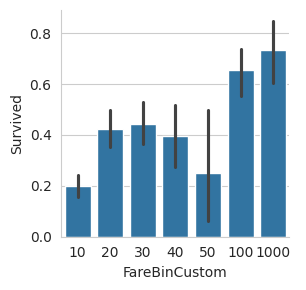

In [14]:
def custom_fare_bin(x):
    x = np.clip(x, a_min=0, a_max=1000)
    bins = np.array([10, 20, 30, 40, 50, 100, 1000])
    return bins[np.argmax(x <= bins)]

df["FareBinCustom"] = df["Fare"].map(custom_fare_bin).astype("category")
g = sns.catplot(df, kind="bar", x="FareBinCustom", y="Survived", height=3)

# Multivariate

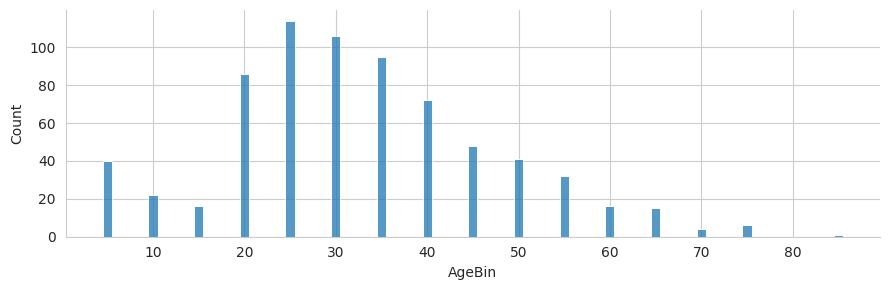

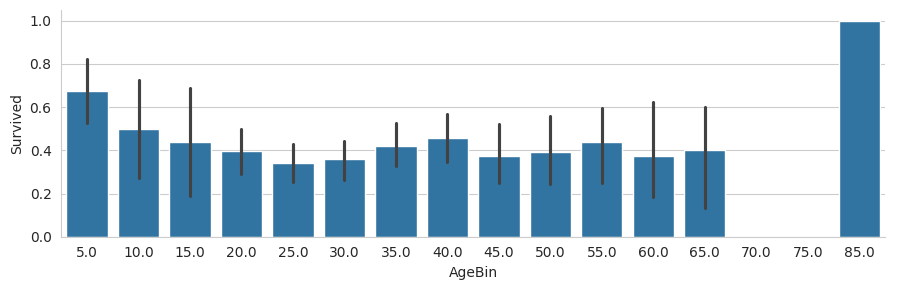

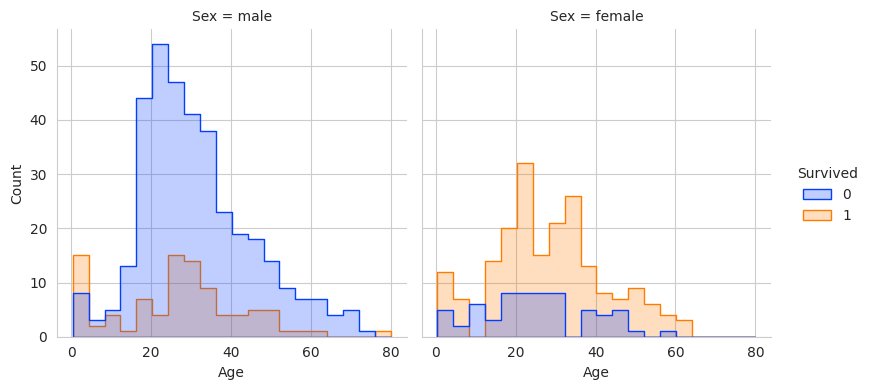

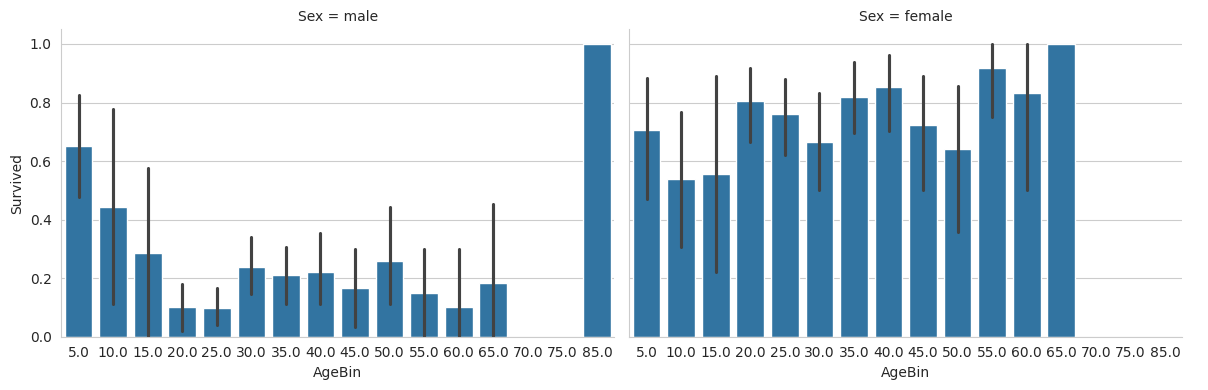

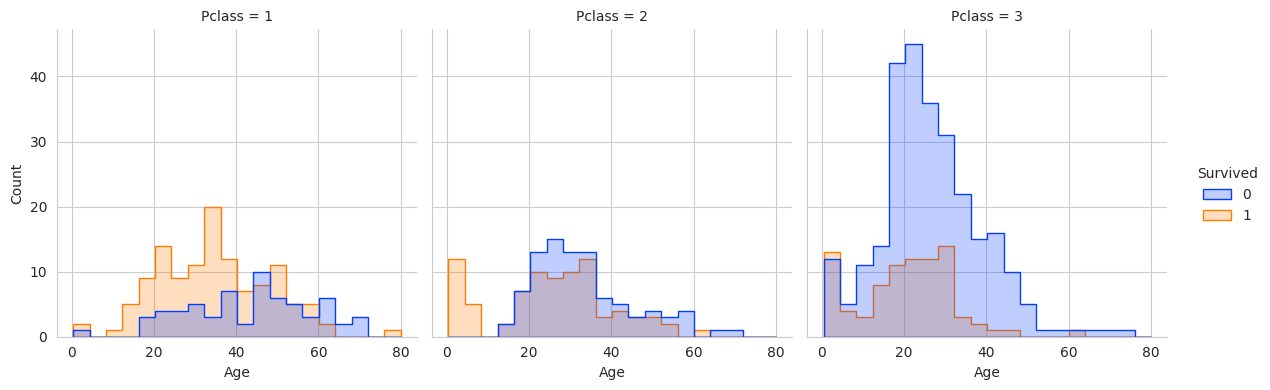

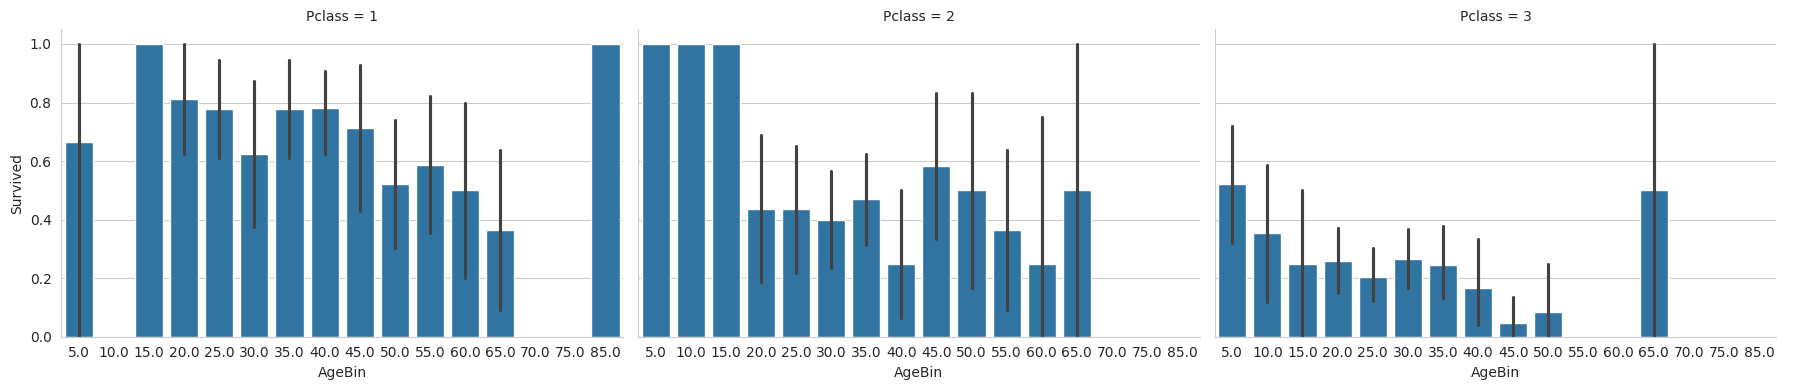

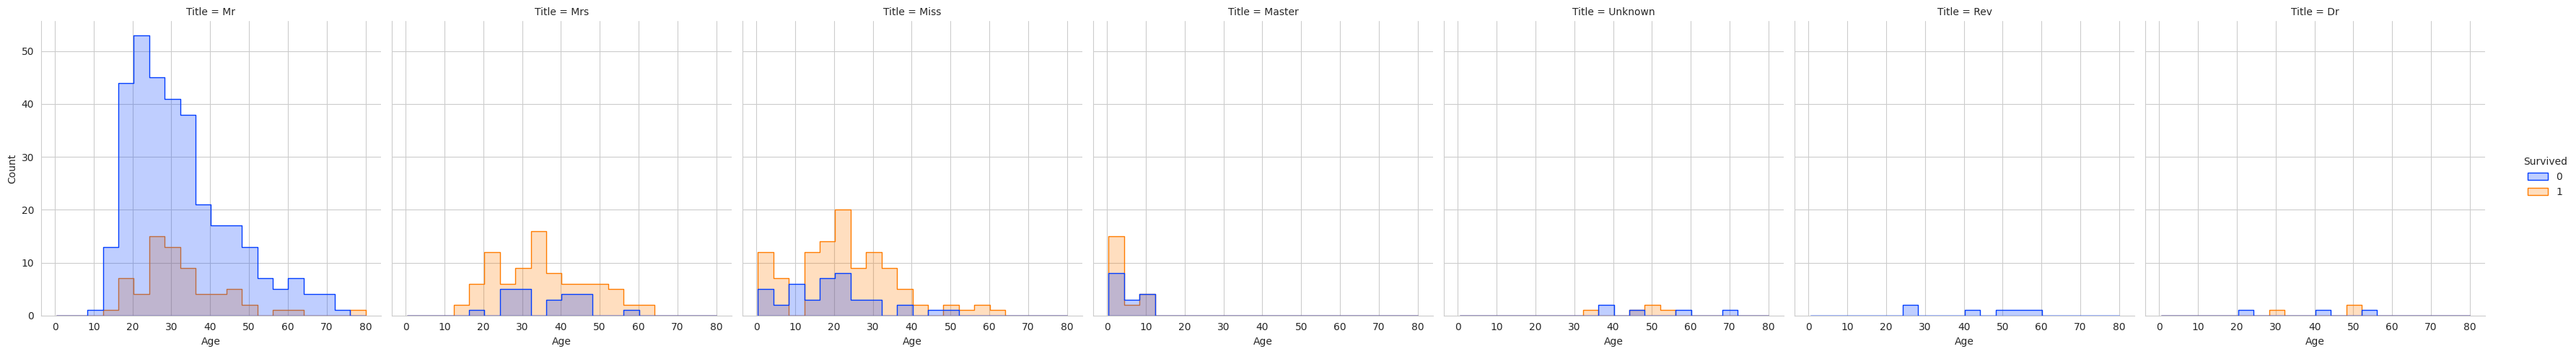

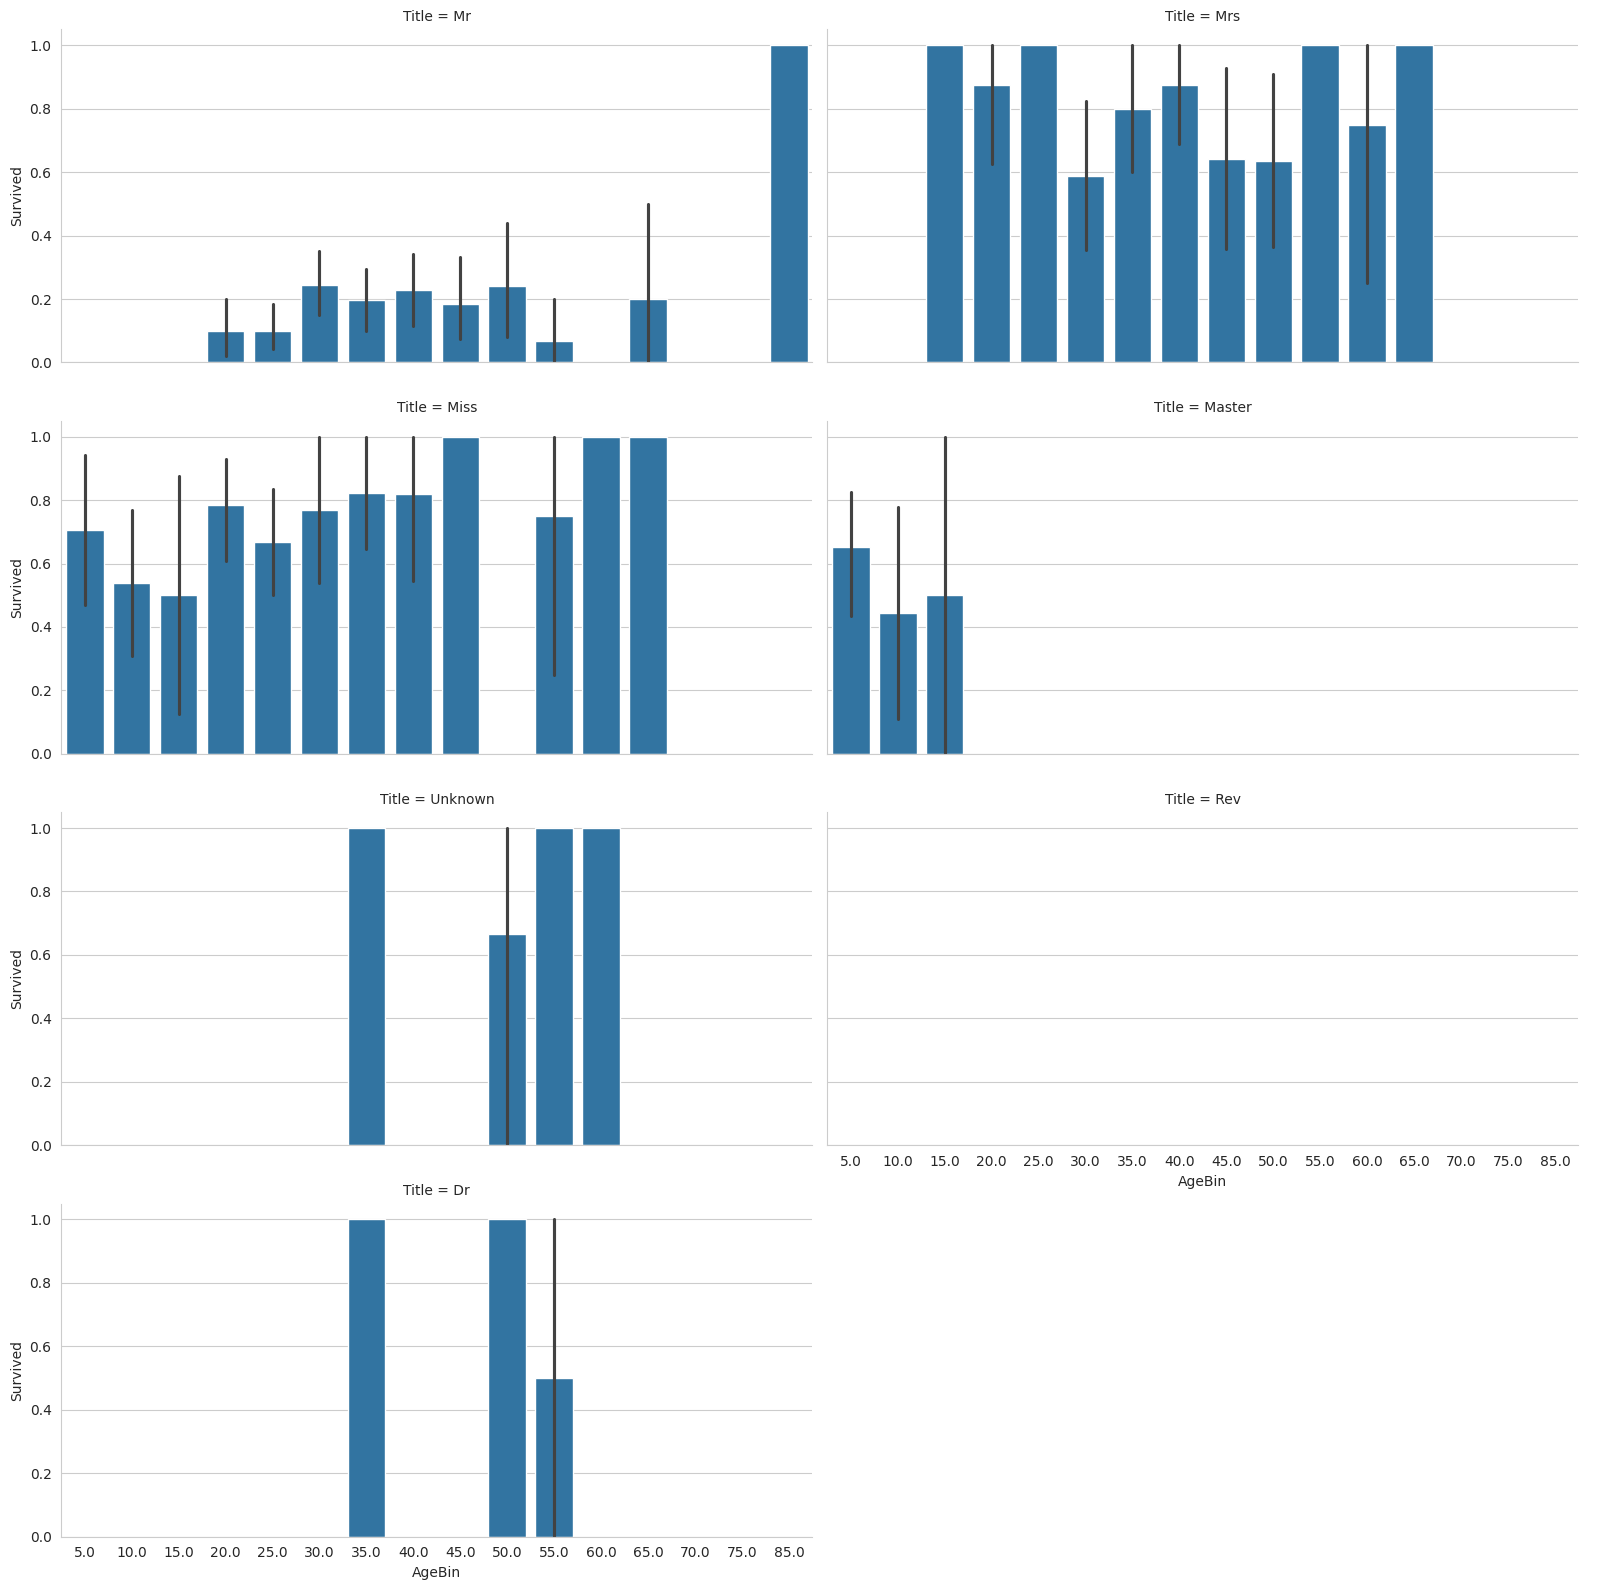

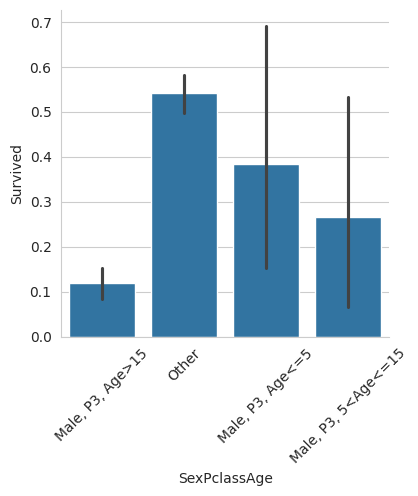

In [ ]:
# Ah, To Be Young

g = sns.displot(df_out, kind="hist", x="AgeBin", discrete=True, height=3, aspect=3)
g = sns.catplot(df_out, kind="bar", x="AgeBin", y="Survived", height=3, aspect=3)
# g = sns.catplot(df_out, kind="bar", x="Survived", y="Age", estimator="median", height=4)
# g = sns.catplot(df_out, kind="boxen", x="Survived", y="Age", height=4)
# g = sns.displot(df_out, kind="hist", x="Age", hue="Sex", col="Survived", height=4, palette="bright", element="step")
g = sns.displot(df_out, kind="hist", x="Age", hue="Survived", palette="bright", col="Sex", element="step", height=4) # Survived vs. Age, controlling for Sex
g = sns.catplot(df_out, kind="bar", x="AgeBin", y="Survived", col="Sex", height=4, aspect=1.5) # Survived vs. Age, controlling for Sex
g = sns.displot(df_out, kind="hist", x="Age", hue="Survived", palette="bright", col="Pclass", element="step", height=4)
g = sns.catplot(df_out, kind="bar", x="AgeBin", y="Survived", col="Pclass", height=4, aspect=1.5)
g = sns.displot(df_out, kind="hist", x="Age", col="Title", hue="Survived", element="step", palette="bright")
g = sns.catplot(df_out, kind="bar", x="AgeBin", y="Survived", height=4, col="Title", aspect=2, col_wrap=2)
g = sns.catplot(df_out, kind="bar", x="SexPclassAge", y="Survived", height=4)
g.ax.tick_params(axis="x", labelrotation=45)

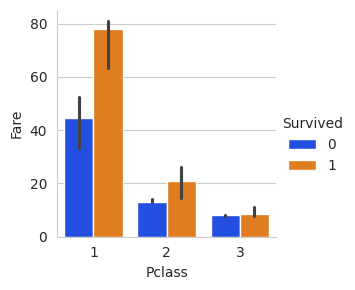

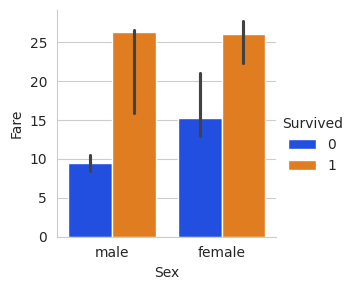

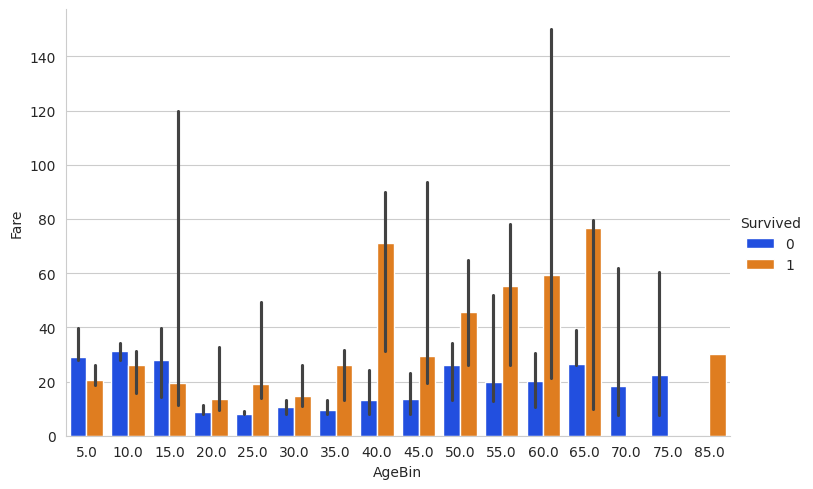

In [956]:
# Life Is Pay 2 Win

# Controlling for Pclass, does Fare affect survival? Yes, big difference in median (which is important when considering tree splits)
g = sns.catplot(df_out, kind="bar", x="Pclass", y="Fare", estimator="median", hue="Survived", palette="bright", height=3) # Using median reduces outlier effect
g = sns.catplot(df_out, kind="bar", x="Sex", y="Fare", estimator="median", hue="Survived", palette="bright", height=3)
g = sns.catplot(df_out, kind="bar", x="AgeBin", y="Fare", estimator="median", hue="Survived", palette="bright", aspect=1.5)

In [ ]:
# The Fairer Sex

g = sns.catplot(df_out, kind="bar", x="AgeBin", y="Survived", hue="Sex", palette="bright", height=3, aspect=2)
g = sns.catplot(df_out, kind="bar", x="FareBin", y="Survived", hue="Sex", palette="bright", height=3, aspect=3)
g = sns.catplot(df_out, kind="bar", x="Pclass", y="Survived", hue="Sex", palette="bright", height=3)
g = sns.catplot(df_out, kind="bar", x="FamilySize", y="Survived", hue="Sex", palette="bright", height=3)
g = sns.catplot(df_out, kind="bar", x="Deck", y="Survived", hue="Sex", palette="bright", height=3)
g = sns.catplot(df_out, kind="bar", x="Embarked", y="Survived", hue="Sex", palette="bright", height=3)

In [ ]:
# Priority Passenger, Coming Through!

g = sns.catplot(df_out, kind="bar", y="Survived", x="AgeBin", hue="Pclass", palette="bright", height=4, aspect=3)
g = sns.catplot(df_out, kind="bar", y="Survived", x="FareBin", hue="Pclass", palette="bright", height=4, aspect=3)
g = sns.catplot(df_out, kind="bar", y="Survived", x="Sex", hue="Pclass", palette="bright", height=4)
g = sns.catplot(df_out, kind="bar", y="Survived", x="Title", hue="Pclass", palette="bright", height=4)
g.ax.tick_params(axis="x", labelrotation=45)
g = sns.catplot(df_out, kind="bar", y="Survived", x="FamilySize", hue="Pclass", palette="bright", height=4)

Deck  Pclass
A     1          22
B     1          65
C     1          94
D     1          40
      2           6
E     1          34
      2           4
      3           3
F     2          13
      3           8
G     3           5
U     1          68
      2         254
      3         693
Name: count, dtype: int64


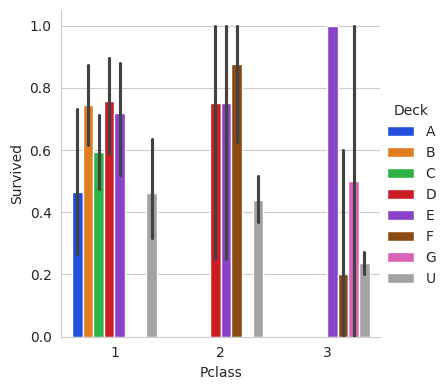

In [771]:
# Living large at the top

print(df_out.groupby(["Deck"]).Pclass.value_counts(normalize=False).sort_index())
g = sns.catplot(df_out, kind="bar", x="Pclass", y="Survived", hue="Deck", palette="bright", height=4, hue_order=sorted(df_out.Deck.unique()))

Embarked
S    914
C    270
Q    123
Name: count, dtype: int64
Embarked  Pclass
C         1         0.522222
          2         0.103704
          3         0.374074
Q         1         0.024390
          2         0.056911
          3         0.918699
S         1         0.193654
          2         0.264770
          3         0.541575
Name: proportion, dtype: float64


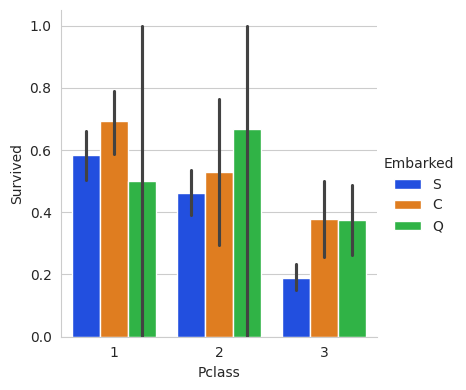

In [ ]:
# The bourgeoisie comes from Cherbourg

print(df_out.Embarked.value_counts().sort_values(ascending=False))
print(df_out.groupby("Embarked").Pclass.value_counts(normalize=True).sort_index())
g = sns.catplot(df_out, kind="bar", x="Pclass", y="Survived", hue="Embarked", palette="bright", height=4, hue_order=df_out.Embarked.value_counts().sort_values(ascending=False).index)

In [ ]:
# Excuse Me, Miss

print(df_out.Title.value_counts().sort_values(ascending=False))
g = sns.catplot(df_out, kind="bar", x="Title", y="Survived", height=3, order=df_out.Title.value_counts().sort_values(ascending=False).index)
g.ax.tick_params(axis="x", labelrotation=45)
g = sns.catplot(df_out.loc[df_out["FareBin"] < 50], kind="bar", x="FareBin", y="Survived", hue="Title", palette="bright", height=4, aspect=1.5, hue_order=df_out.Title.value_counts().sort_values(ascending=False).index)
g = sns.catplot(df_out, kind="bar", x="Sex", y="Survived", hue="Title", palette="bright", hue_order=df_out.Title.value_counts().sort_values(ascending=False).index)
g = sns.catplot(df_out, kind="bar", x="Pclass", y="Survived", hue="Title", palette="bright", hue_order=df_out.Title.value_counts().sort_values(ascending=False).index)
g = sns.catplot(df_out, kind="bar", x="FamilySize", y="Survived", hue="Title", palette="bright", hue_order=df_out.Title.value_counts().sort_values(ascending=False).index, aspect=3)
g = sns.catplot(df_out, kind="bar", x="Deck", y="Survived", hue="Title", 
                palette="bright", hue_order=df_out.Title.value_counts().sort_values(ascending=False).index, 
                order=sorted(df_out.Deck.unique()), aspect=3)

FamilySize
0     537
1     161
2     102
3      29
4      15
5      22
6      12
7       6
10      7
Name: count, dtype: int64


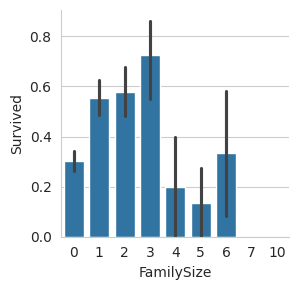

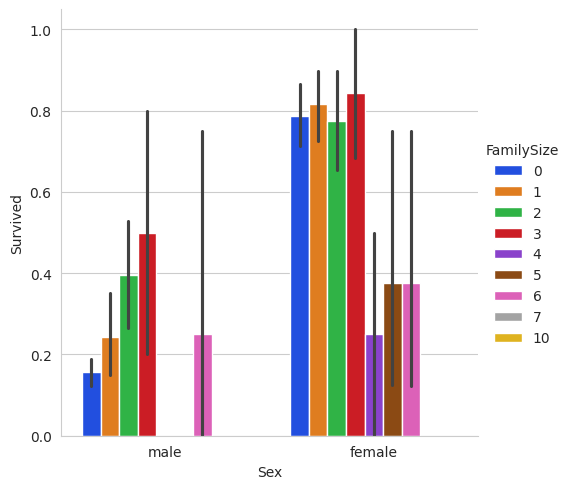

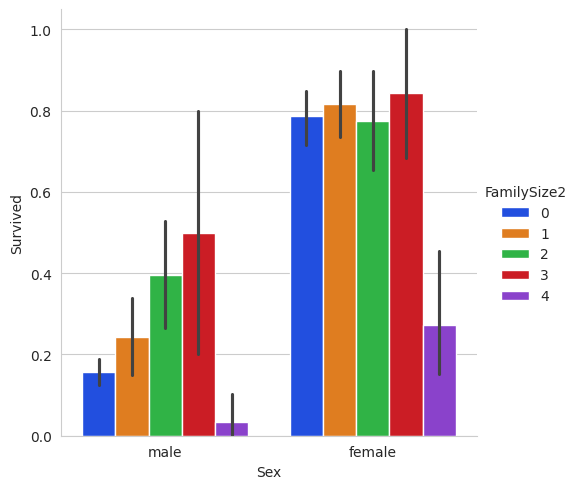

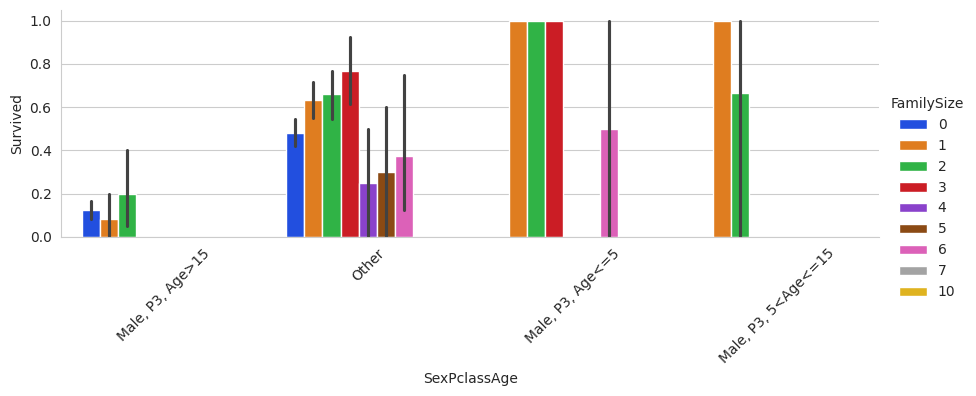

In [430]:
# Man + Small Family = Dead. Large Family? Also Dead.

print(df_out.FamilySize.value_counts().sort_index())
g = sns.catplot(df_out, kind="bar", x="FamilySize", y="Survived", height=3)
# print(df_out.groupby("Sex").FamilySize.value_counts().sort_index())
g = sns.catplot(df_out, kind="bar", x="Sex", y="Survived", hue="FamilySize", palette="bright")
df_out["FamilySize2"] = df_out["FamilySize"].clip(upper=4)
g = sns.catplot(df_out, kind="bar", x="Sex", y="Survived", hue="FamilySize2", palette="bright")
g = sns.catplot(df_out, kind="bar", x="SexPclassAge", y="Survived", hue="FamilySize", palette="bright", height=3, aspect=3)
g.ax.tick_params(axis="x", labelrotation=45)

# Who's Missing?

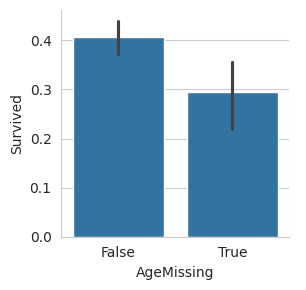

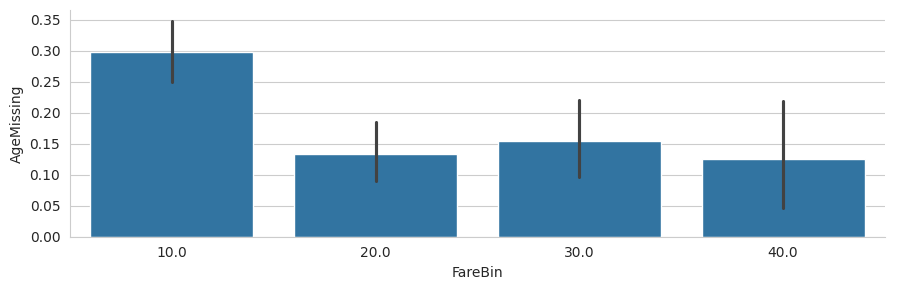

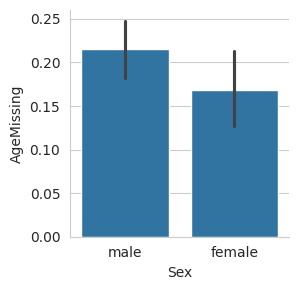

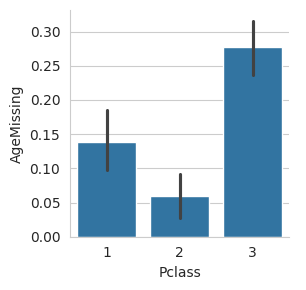

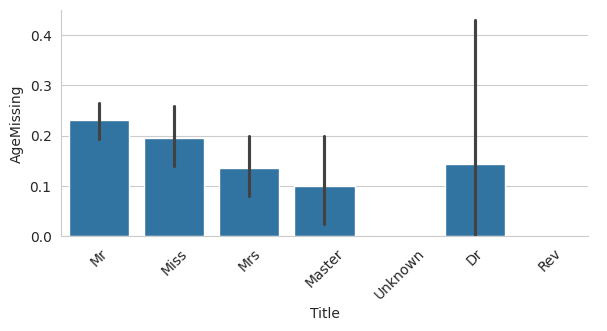

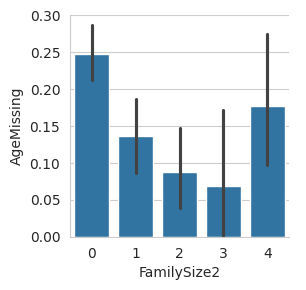

In [ ]:
# Age missing? You're dead.
# Age missing is probably covered by other features.

g = sns.catplot(df_out, kind="bar", x="AgeMissing", y="Survived", height=3)
g = sns.catplot(df_out.loc[df_out["FareBin"] < 50], kind="bar", x="FareBin", y="AgeMissing", height=3, aspect=3)
g = sns.catplot(df_out, kind="bar", x="Sex", y="AgeMissing", height=3)
g = sns.catplot(df_out, kind="bar", x="Pclass", y="AgeMissing", height=3)
g = sns.catplot(df_out, kind="bar", x="Title", y="AgeMissing", height=3, aspect=2, order=df_out.Title.value_counts().sort_values(ascending=False).index)
g.ax.tick_params(axis="x", labelrotation=45)
df_out["FamilySize2"] = df_out["FamilySize"].clip(upper=4)
g = sns.catplot(df_out, kind="bar", x="FamilySize2", y="AgeMissing", height=3)

## Predicting Age

* When training a model to predict Age, should you clip Age to 65? Hard to say. Not sure if it'll affect the survival prediction much.
* No pattern from Fare
* Sex doesn't matter too much on its own, but there's a bigger difference w/FamilySize interaction. In large families, the women tend to be older.
* Larger family (clipped at 4) = younger
* More siblings = younger (stronger predictor than family size)
* Higher class = older
* Title makes a big difference

Features to use: Sex, FamilySize, SibSp, Pclass, Title

I'm thinking my AgeImputer should take care of encoding the features and then drop after. Who cares if it takes more time. Much easier if it's standalone.

Can RandomForestRegressor predict/split based on median? If mean only, should I clip or transform Age so it's not so skewed?

Assess imputation:
* Try a different model, e.g. SVR
* Run model on training data and check training performance - turns out FareTransformed does have a big impact on MAE
* Check which groups are missing and estimate which ages should be filled in (e.g. group-wise imputation)
    * Mostly singles
    * Mr/Male: Pclass 1 (40-45), Pclass 2 (30-35), Pclass 3 (25-30)
    * Miss/Female: Pclass 3 (20-25)
* Check distributions before and after, check conditional distributions before and after

In [47]:
from sklearn.preprocessing import KBinsDiscretizer, QuantileTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from src.custom_transformers import DynamicDataPrepPipeline
from src.utils import load_titanic_data

X_age, y_age, _ = load_titanic_data(target="Age")

fare_tf = "passthrough"
# fare_tf = KBinsDiscretizer(n_bins=4, encode="ordinal")
# fare_tf = QuantileTransformer()
# fare_tf = QuantileTransformer(output_distribution="normal")
data_prep = DynamicDataPrepPipeline(
    extract_fam=True, 
    extract_title=True,
    numeric_columns=["SibSp", "Pclass", "Fare"],
    numeric_transformations = {
        "default": "passthrough",
        "Fare": fare_tf,
    },
)
# model = RandomForestRegressor(max_depth=10, n_estimators=100, criterion="squared_error", random_state=0)
model = RandomForestRegressor(max_depth=4, n_estimators=10, random_state=0)

ml_pipe = Pipeline([
    ("data_prep", data_prep),
    ("model", model),
])

missing_age = y_age.isna()
ml_pipe.fit(X_age.loc[~missing_age], y_age[~missing_age])
df["AgeImputed"] = df["Age"]
ages = ml_pipe.predict(X_age.loc[missing_age])
df.loc[missing_age, "AgeImputed"] = ages
ages = ml_pipe.predict(X_age)
df["AllAgeImputed"] = ages
df["MAE"] = df["Age"]
df.loc[~missing_age, "MAE"] = np.abs(df.loc[~missing_age, "Age"] - df.loc[~missing_age, "AllAgeImputed"])
print(df["MAE"].describe())
print("")
print(df["MAE"].quantile([0.5, 0.75, 0.9, 0.95, 0.99]))
print("")

count    714.000000
mean       8.230358
std        6.805240
min        0.040288
25%        3.071288
50%        6.906386
75%       11.345908
max       44.654092
Name: MAE, dtype: float64

0.50     6.906386
0.75    11.345908
0.90    17.067380
0.95    20.881016
0.99    31.611301
Name: MAE, dtype: float64



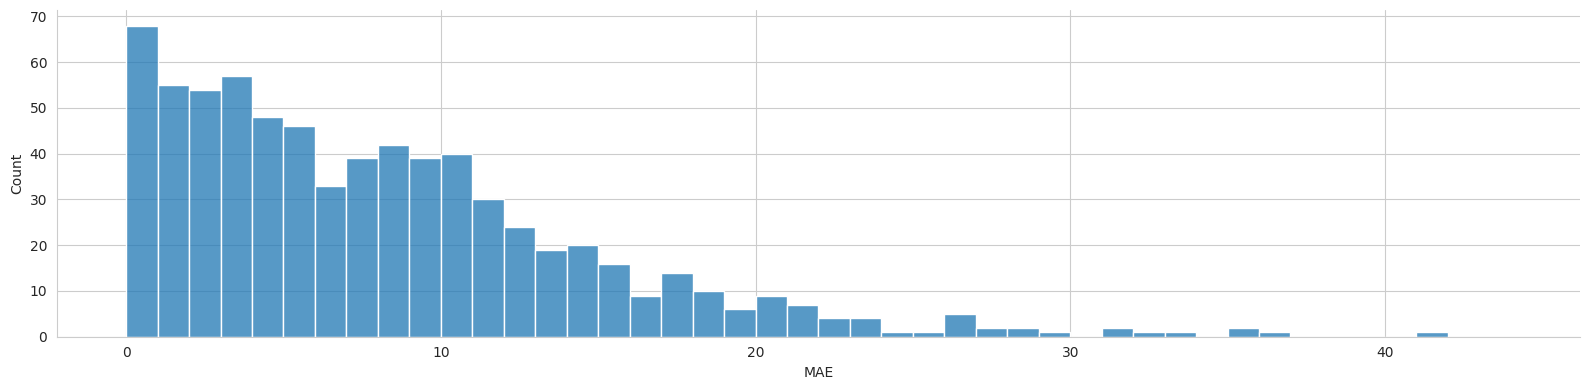

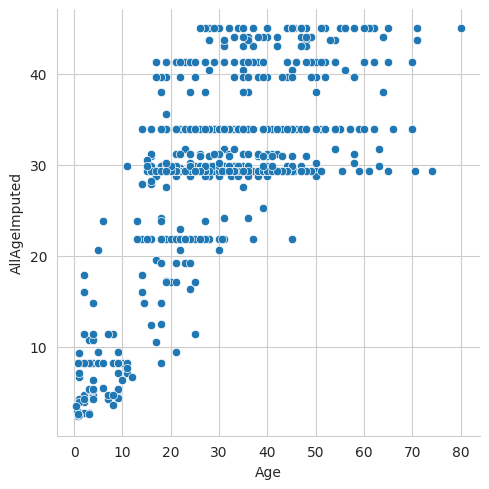

In [48]:
g = sns.displot(df, kind="hist", x="MAE", height=4, aspect=4, bins=range(0,np.ceil(df["MAE"].max()).astype("int").item()))
g = sns.relplot(df.loc[~missing_age], kind="scatter", x="Age", y="AllAgeImputed")

In [49]:
df.sort_values(by="MAE", ascending=False).head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,...,SexPclassAge,FareYeo,FareBoxCox,FareQuantUniform,FareQuantNormal,FareBins,FareBinCustom,AgeImputed,AllAgeImputed,MAE
851,852,0,3,male,74.0,0,0,347060,7.7750,S,...,"Male, P3, Age>15",-0.809136,-0.836888,0.165730,-0.971176,0.0,10,74.0,29.345908,44.654092
116,117,0,3,male,70.5,0,0,370369,7.7500,Q,...,"Male, P3, Age>15",-0.812349,-0.840489,0.137640,-1.090982,0.0,10,70.5,29.345908,41.154092
672,673,0,2,male,70.0,0,0,C.A. 24580,10.5000,S,...,Other,-0.508582,-0.506967,0.393820,-0.269376,1.0,20,70.0,33.927526,36.072474
280,281,0,3,male,65.0,0,0,336439,7.7500,Q,...,"Male, P3, Age>15",-0.812349,-0.840489,0.137640,-1.090982,0.0,10,65.0,29.345908,35.654092
630,631,1,1,male,80.0,0,0,27042,30.0000,S,...,Other,0.527906,0.557446,0.733708,0.624066,2.0,30,80.0,44.959712,35.040288
483,484,1,3,female,63.0,0,0,4134,9.5875,S,...,Other,-0.599618,-0.605555,0.370225,-0.331258,1.0,10,63.0,29.850933,33.149067
33,34,0,2,male,66.0,0,0,C.A. 24579,10.5000,S,...,Other,-0.508582,-0.506967,0.393820,-0.269376,1.0,20,66.0,33.927526,32.072474
326,327,0,3,male,61.0,0,0,345364,6.2375,S,...,"Male, P3, Age>15",-1.028116,-1.086432,0.019101,-2.072678,0.0,10,61.0,29.345908,31.654092
275,276,1,1,female,63.0,1,0,13502,77.9583,S,...,Other,1.417234,1.416745,0.900562,1.284759,3.0,100,63.0,31.675070,31.324930
94,95,0,3,male,59.0,0,0,364500,7.2500,S,...,"Male, P3, Age>15",-0.878820,-0.915361,0.084831,-1.373288,0.0,10,59.0,29.345908,29.654092


In [51]:
# Check outliers

iqr_times_1p5 = df.Age.quantile([0.25, 0.75]).diff().iloc[1]*1.5

print([(df.Age.quantile([0.25])-iqr_times_1p5).iloc[0].item(), 
       (df.Age.quantile([0.75])+iqr_times_1p5).iloc[0].item()])

iqr_times_1p5 = df.AgeImputed.quantile([0.25, 0.75]).diff().iloc[1]*1.5

print([(df.AgeImputed.quantile([0.25])-iqr_times_1p5).iloc[0].item(), 
       (df.AgeImputed.quantile([0.75])+iqr_times_1p5).iloc[0].item()])

# df.loc[df.Age > (df.Age.quantile([0.75])+iqr_times_1p5).iloc[0].item()]
# df.query("Age > 60").sort_values(by="Survived", ascending=False)

[-6.6875, 64.8125]
[-0.6544856831317496, 59.192691409879046]


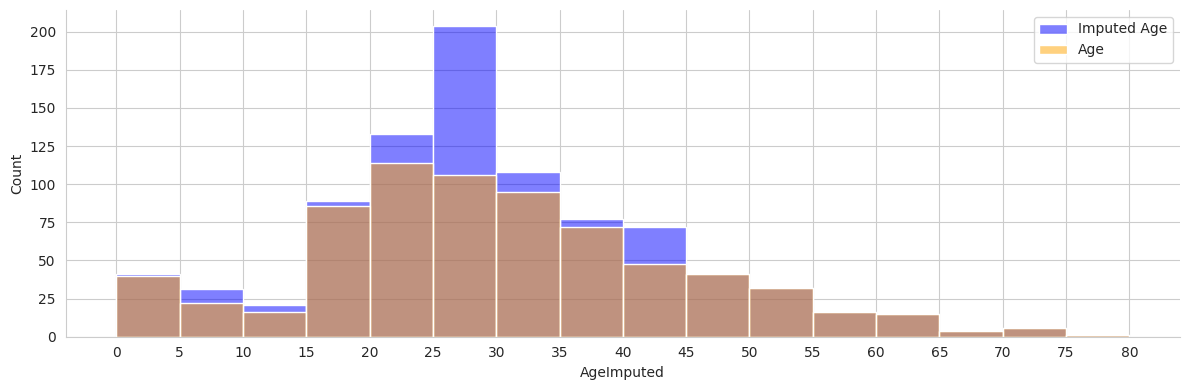

In [52]:
g = sns.displot(df, kind="hist", x="AgeImputed", bins=range(0, 85, 5), height=4, aspect=3, color="blue", alpha=0.5, label="Imputed Age")
ax = sns.histplot(df, x="Age", bins=range(0, 85, 5), ax=g.ax, color="orange", alpha=0.5, label="Age")
_ = ax.set_xticks(range(0, 85,5))
_ = ax.legend()

In [54]:
print(df[["Fare", "Age", "AgeImputed"]].corr())
print("")

                Fare       Age  AgeImputed
Fare        1.000000  0.096067    0.106377
Age         0.096067  1.000000    1.000000
AgeImputed  0.106377  1.000000    1.000000



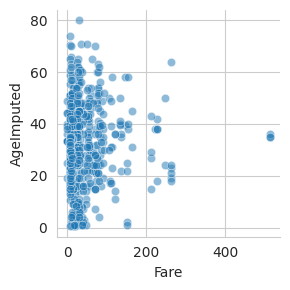

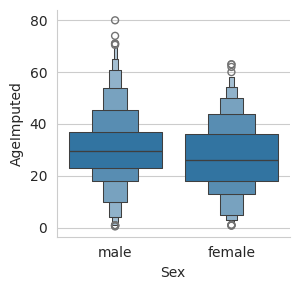

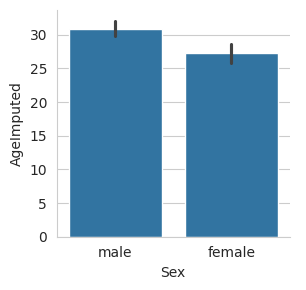

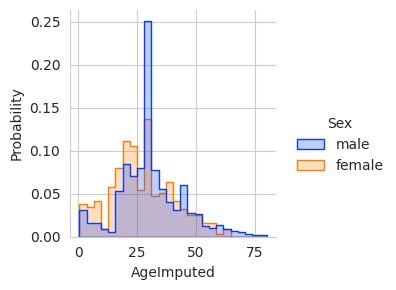

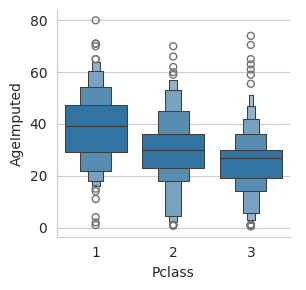

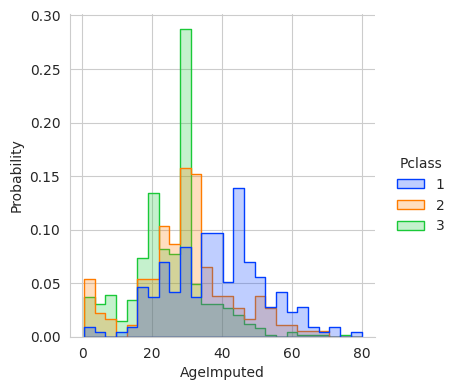

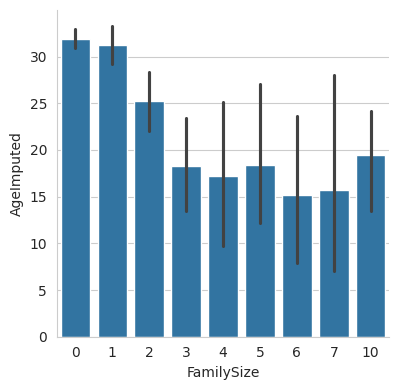

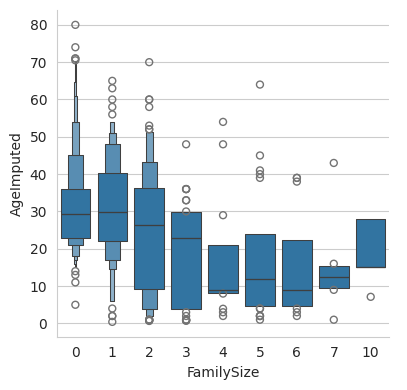

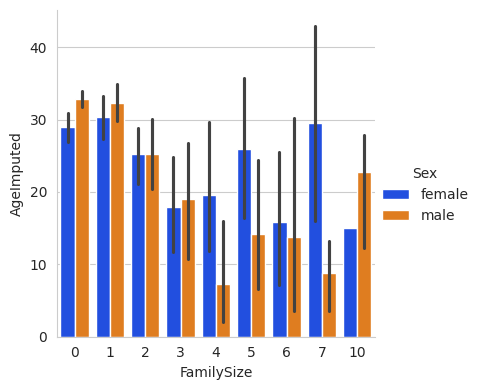

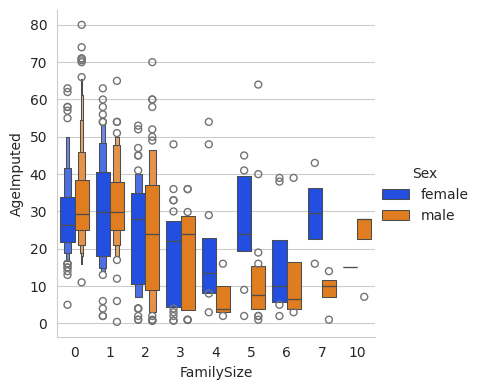

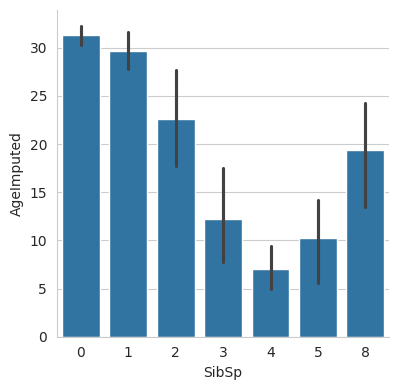

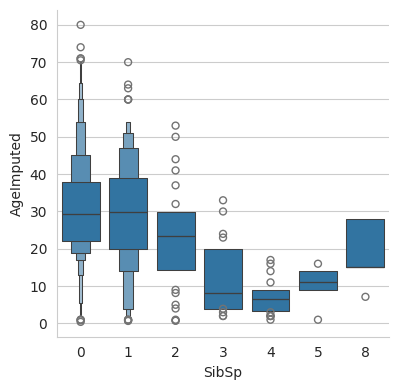

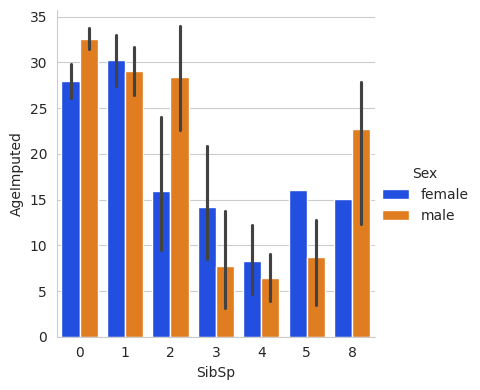

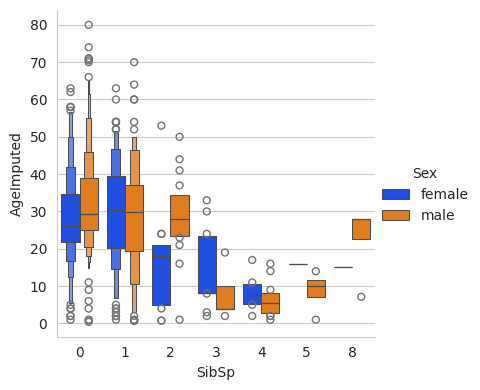

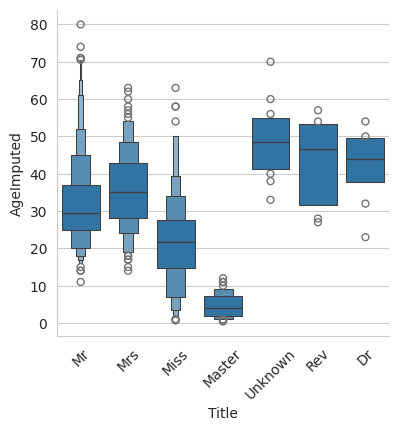

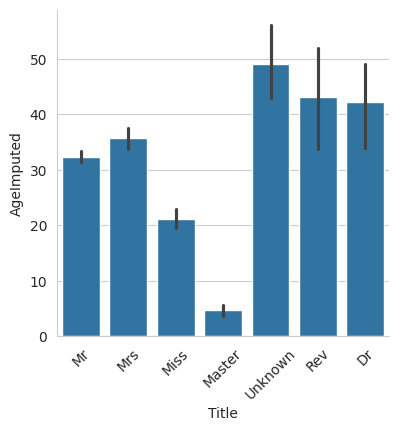

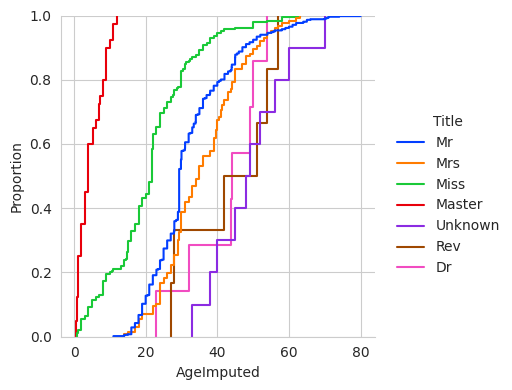

In [55]:
g = sns.relplot(df, kind="scatter", x="Fare", y="AgeImputed", alpha=0.5, height=3)
g = sns.catplot(df, kind="boxen", x="Sex", y="AgeImputed", height=3)
g = sns.catplot(df, kind="bar", x="Sex", y="AgeImputed", height=3)
g = sns.displot(df, kind="hist", x="AgeImputed", hue="Sex", palette="bright", element="step", height=3, stat="probability", common_norm=False)
g = sns.catplot(df, kind="boxen", x="Pclass", y="AgeImputed", height=3)
g = sns.displot(df, kind="hist", x="AgeImputed", hue="Pclass", palette="bright", element="step", height=4, stat="probability", common_norm=False)
g = sns.catplot(df, kind="bar", x="FamilySize", y="AgeImputed", height=4)
g = sns.catplot(df, kind="boxen", x="FamilySize", y="AgeImputed", height=4)
g = sns.catplot(df, kind="bar", x="FamilySize", y="AgeImputed", hue="Sex", palette="bright", height=4)
g = sns.catplot(df, kind="boxen", x="FamilySize", y="AgeImputed", hue="Sex", palette="bright", height=4)
g = sns.catplot(df, kind="bar", x="SibSp", y="AgeImputed", height=4)
g = sns.catplot(df, kind="boxen", x="SibSp", y="AgeImputed", height=4)
g = sns.catplot(df, kind="bar", x="SibSp", y="AgeImputed", height=4, hue="Sex", palette="bright")
g = sns.catplot(df, kind="boxen", x="SibSp", y="AgeImputed", height=4, hue="Sex", palette="bright")
# g = sns.catplot(df, kind="bar", x="Parch", y="AgeImputed", height=4)
# g = sns.catplot(df, kind="boxen", x="Parch", y="AgeImputed", height=4)
g = sns.catplot(df, kind="boxen", x="Title", y="AgeImputed", height=4)
g.ax.tick_params(axis="x", labelrotation=45)
g = sns.catplot(df, kind="bar", x="Title", y="AgeImputed", height=4)
g.ax.tick_params(axis="x", labelrotation=45)
g = sns.displot(df, kind="ecdf", x="AgeImputed", hue="Title", palette="bright", height=4)

       AgeImputed                                                           \
            count       mean        std   min   25%        50%   75%   max   
Sex                                                                          
female      314.0  27.218373  13.564948  0.75  18.0  26.000000  36.0  63.0   
male        577.0  30.872159  13.428694  0.42  23.0  29.345908  37.0  80.0   

          Age                                                      
        count       mean        std   min   25%   50%   75%   max  
Sex                                                                
female  261.0  27.915709  14.110146  0.75  18.0  27.0  37.0  63.0  
male    453.0  30.726645  14.678201  0.42  21.0  29.0  39.0  80.0  



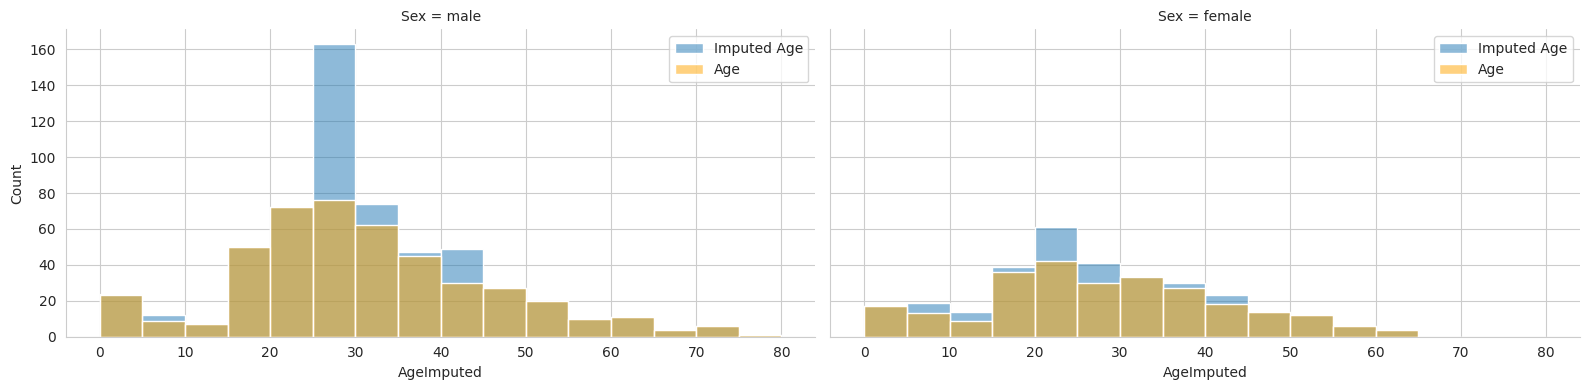

In [56]:
print(df.groupby("Sex")[["AgeImputed", "Age"]].describe())
print("")

g = sns.displot(df, kind="hist", bins=range(0, 85, 5), x="AgeImputed", col="Sex", height=4, aspect=2, alpha=0.5, label="Imputed Age")
_ = sns.histplot(df.query("Sex == 'male'"), bins=range(0, 85, 5), x="Age", alpha=0.5, color="orange", label="Age", ax=g.axes[0][0])
_ = sns.histplot(df.query("Sex == 'female'"), bins=range(0, 85, 5), x="Age", alpha=0.5, color="orange", label="Age", ax=g.axes[0][1])
_ = g.axes[0][0].legend()
_ = g.axes[0][1].legend()

           AgeImputed                                                        \
                count       mean        std       min        25%        50%   
FamilySize                                                                    
0               537.0  31.914611  11.651146  5.000000  23.000000  29.345908   
1               161.0  31.289833  12.962542  0.420000  22.000000  29.850933   
2               102.0  25.277552  16.322325  0.670000   9.250000  26.500000   
3                29.0  18.325033  14.086665  0.750000   4.000000  23.000000   
4                15.0  17.159807  15.764085  2.000000   8.077508   9.000000   
5                22.0  18.409091  17.388171  1.000000   4.750000  12.000000   
6                12.0  15.166667  14.732977  2.000000   4.750000   9.000000   
7                 6.0  15.666667  14.361987  1.000000   9.500000  12.500000   
10                7.0  19.408930   8.408488  7.131283  15.021543  15.021543   

                                    Age            

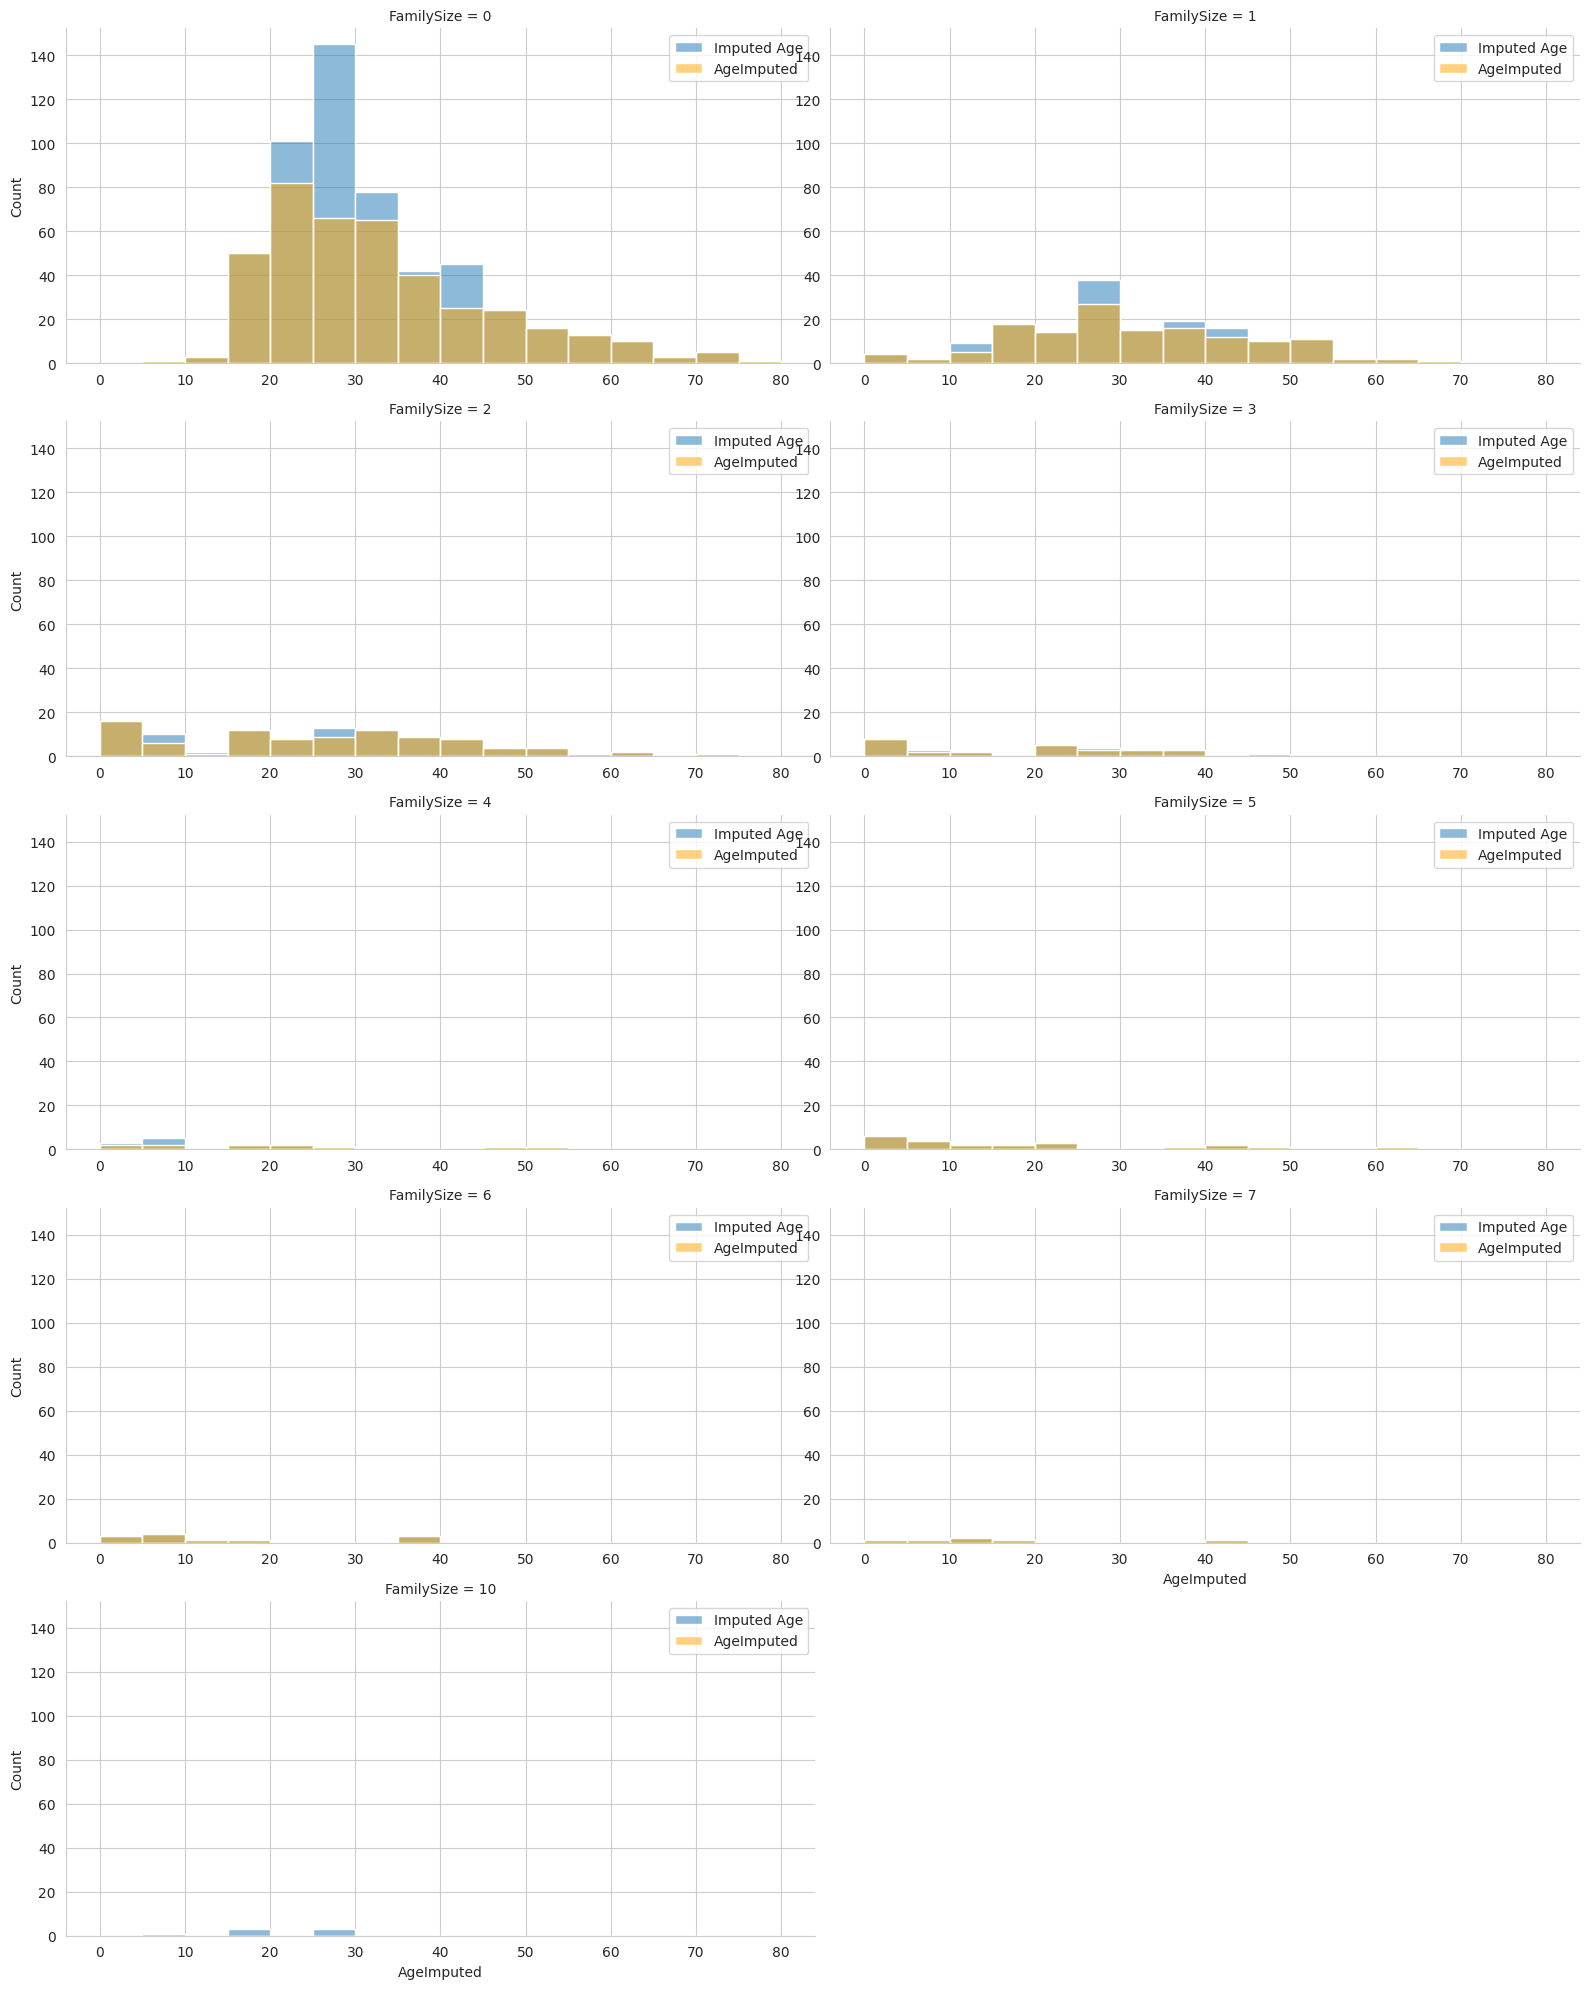

In [57]:
print(df.groupby("FamilySize")[["AgeImputed", "Age"]].describe())
print("")

g = sns.displot(df, kind="hist", bins=range(0, 85, 5), x="AgeImputed", col="FamilySize", col_order=sorted(df.FamilySize.unique()), col_wrap=2, height=4, aspect=2, alpha=0.5, label="Imputed Age")
for i, sz in enumerate(sorted(df.FamilySize.unique())):
    _ = sns.histplot(df.query("FamilySize == @sz"), bins=range(0, 85, 5), x="Age", alpha=0.5, color="orange", label="AgeImputed", ax=g.axes[i])
    _ = g.axes[i].legend()

for ax in g.axes.flat:
    ax.tick_params(labelbottom=True, labelleft=True)

      AgeImputed                                                        \
           count       mean        std       min        25%        50%   
SibSp                                                                    
0          608.0  31.284205  12.420679  0.420000  22.000000  29.345908   
1          209.0  29.647807  14.351437  0.670000  20.000000  29.850933   
2           28.0  22.619889  14.253425  0.750000  14.250000  23.500000   
3           16.0  12.212319  10.203667  2.000000   3.983013   8.155016   
4           18.0   7.055556   4.880601  1.000000   3.250000   6.500000   
5            5.0  10.200000   5.805170  1.000000   9.000000  11.000000   
8            7.0  19.408930   8.408488  7.131283  15.021543  15.021543   

                               Age                                           \
             75%        max  count       mean        std   min    25%   50%   
SibSp                                                                         
0      37.920667  80.0

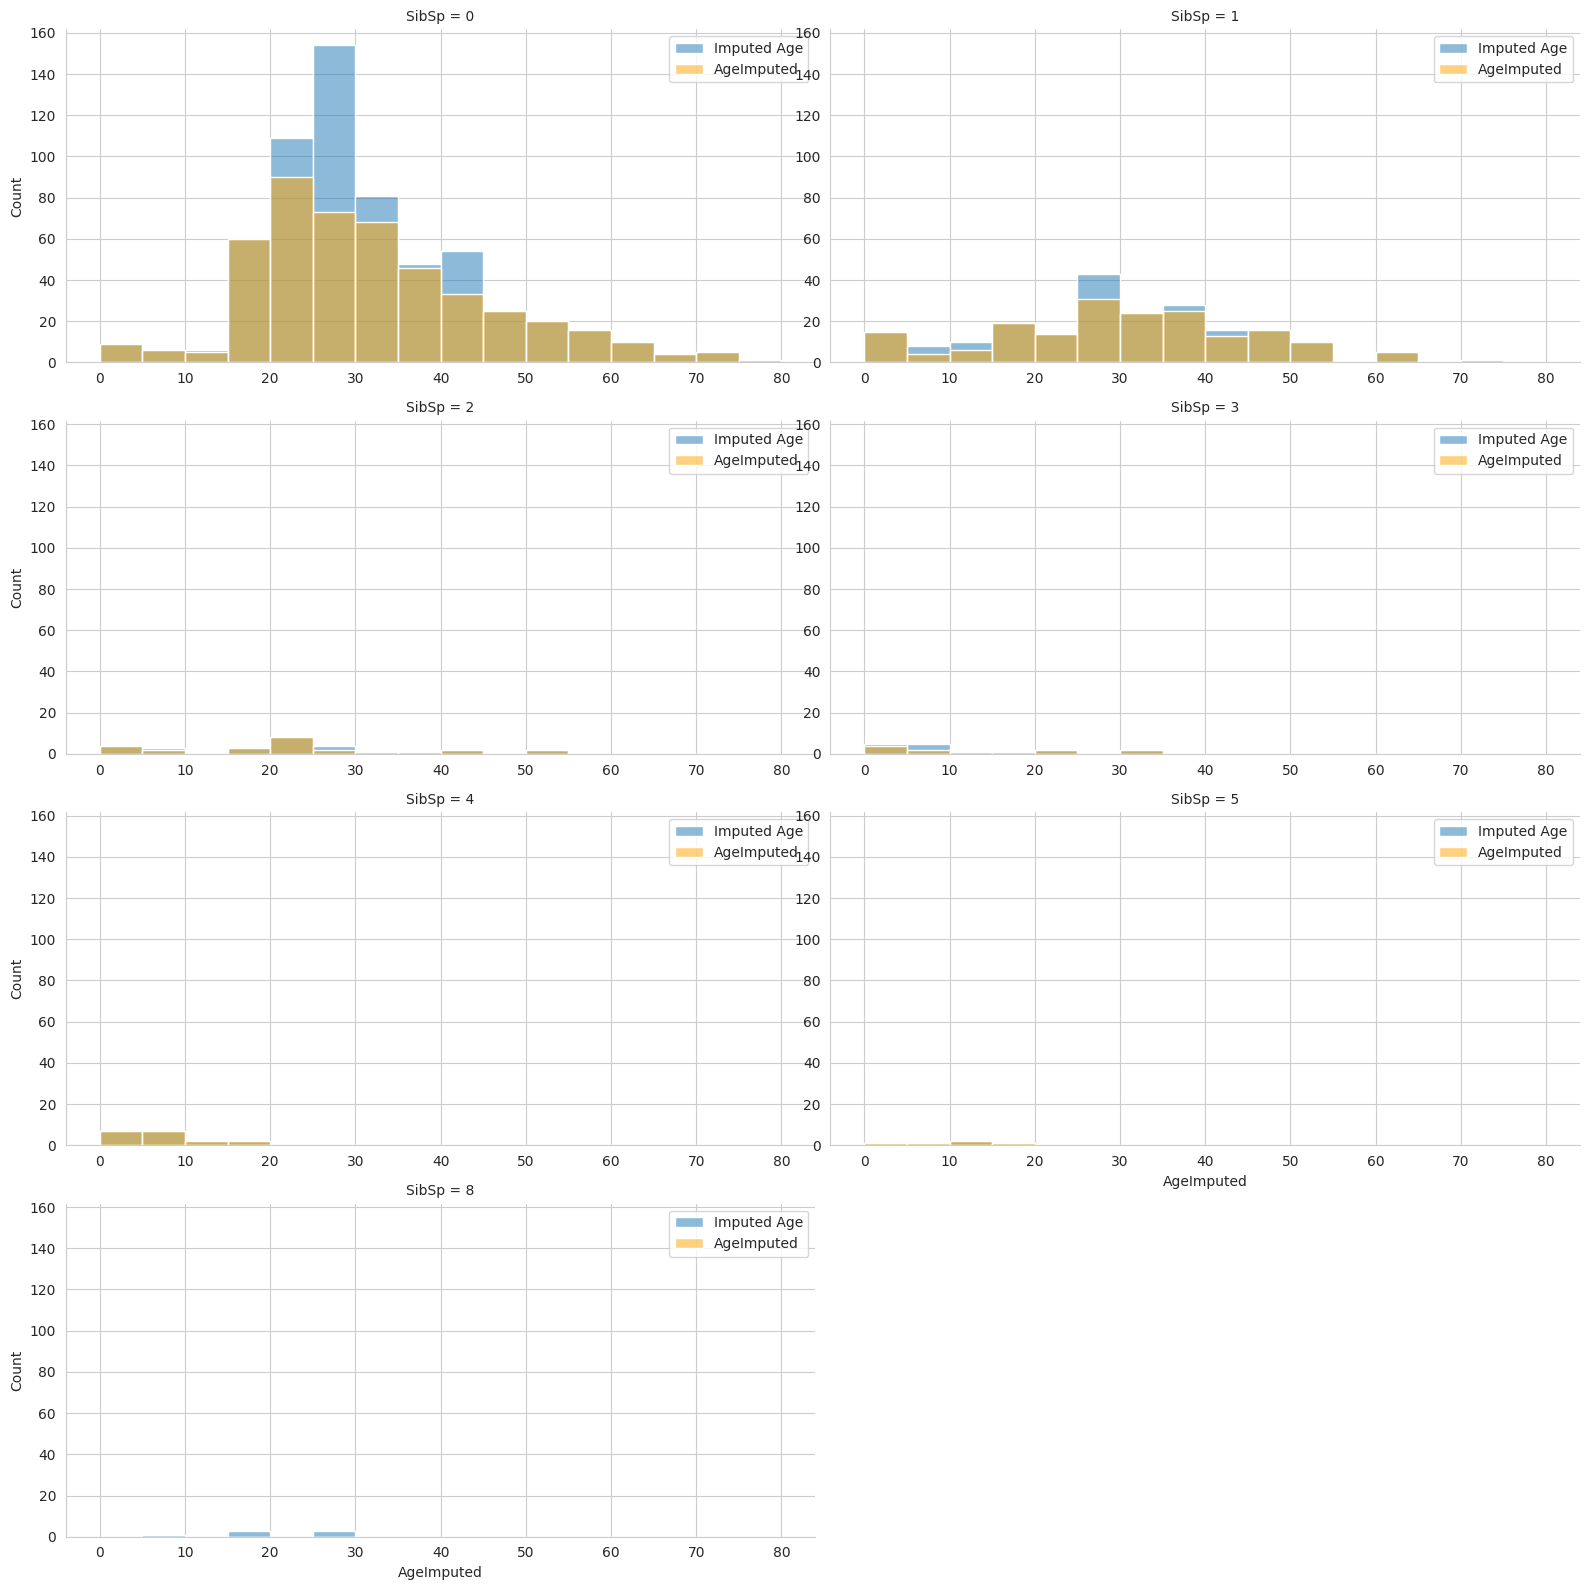

In [58]:
print(df.groupby("SibSp")[["AgeImputed", "Age"]].describe())
print("")

g = sns.displot(df, kind="hist", bins=range(0, 85, 5), x="AgeImputed", col_order=sorted(df.SibSp.unique()), col="SibSp", col_wrap=2, height=4, aspect=2, alpha=0.5, label="Imputed Age")
for i, sz in enumerate(sorted(df.SibSp.unique())):
    _ = sns.histplot(df.query("SibSp == @sz"), bins=range(0, 85, 5), x="Age", alpha=0.5, color="orange", label="AgeImputed", ax=g.axes[i])
    _ = g.axes[i].legend()

for ax in g.axes.flat:
    ax.tick_params(labelbottom=True, labelleft=True)

       AgeImputed                                                          \
            count       mean        std   min   25%        50%        75%   
Pclass                                                                      
1           216.0  38.850269  13.865415  0.92  29.0  39.300918  47.250000   
2           184.0  30.040200  13.599214  0.67  23.0  30.000000  36.000000   
3           491.0  25.337576  11.208869  0.42  19.0  27.000000  29.850933   

                Age                                                      
         max  count       mean        std   min   25%   50%   75%   max  
Pclass                                                                   
1       80.0  186.0  38.233441  14.802856  0.92  27.0  37.0  49.0  80.0  
2       70.0  173.0  29.877630  14.001077  0.67  23.0  29.0  36.0  70.0  
3       74.0  355.0  25.140620  12.495398  0.42  18.0  24.0  32.0  74.0  



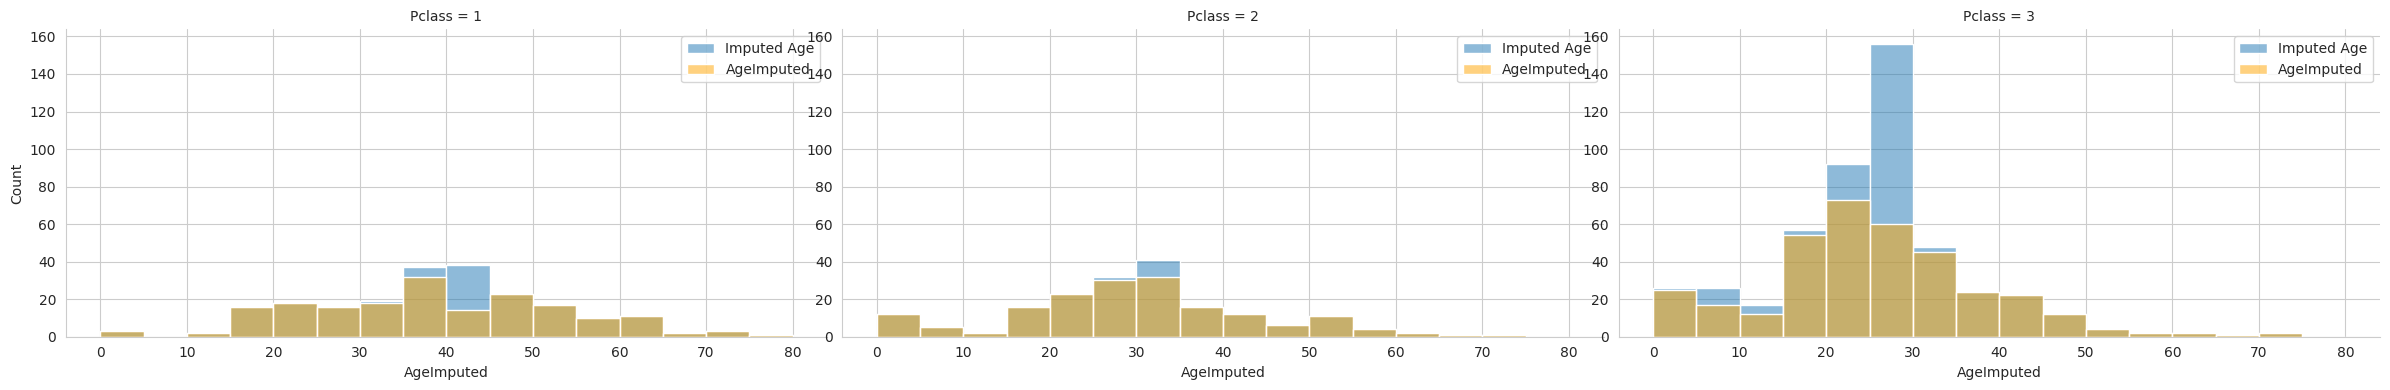

In [59]:
print(df.groupby("Pclass")[["AgeImputed", "Age"]].describe())
print("")

g = sns.displot(df, kind="hist", bins=range(0, 85, 5), x="AgeImputed", col="Pclass", col_order=sorted(df.Pclass.unique()), height=4, aspect=2, alpha=0.5, label="Imputed Age")
ax_iter = g.axes.flat
for i, sz in enumerate(sorted(df.Pclass.unique())):
    ax = next(ax_iter)
    _ = sns.histplot(df.query("Pclass == @sz"), bins=range(0, 85, 5), x="Age", alpha=0.5, color="orange", label="AgeImputed", ax=ax)
    _ = ax.legend()

for ax in g.axes.flat:
    ax.tick_params(labelbottom=True, labelleft=True)

        AgeImputed                                                     \
             count       mean        std    min        25%        50%   
Title                                                                   
Dr             7.0  42.246414  10.989011  23.00  37.862449  44.000000   
Master        40.0   4.663075   3.458929   0.42   1.750000   4.000000   
Miss         185.0  21.189569  11.931337   0.75  14.813612  21.788206   
Mr           517.0  32.322994  11.449893  11.00  25.000000  29.345908   
Mrs          126.0  35.686499  10.844944  14.00  28.250000  35.000000   
Rev            6.0  43.166667  13.136463  27.00  31.500000  46.500000   
Unknown       10.0  49.100000  11.029758  33.00  41.250000  48.500000   

                            Age                                            \
               75%   max  count       mean        std    min    25%   50%   
Title                                                                       
Dr       49.500000  54.0    6.0  42.00

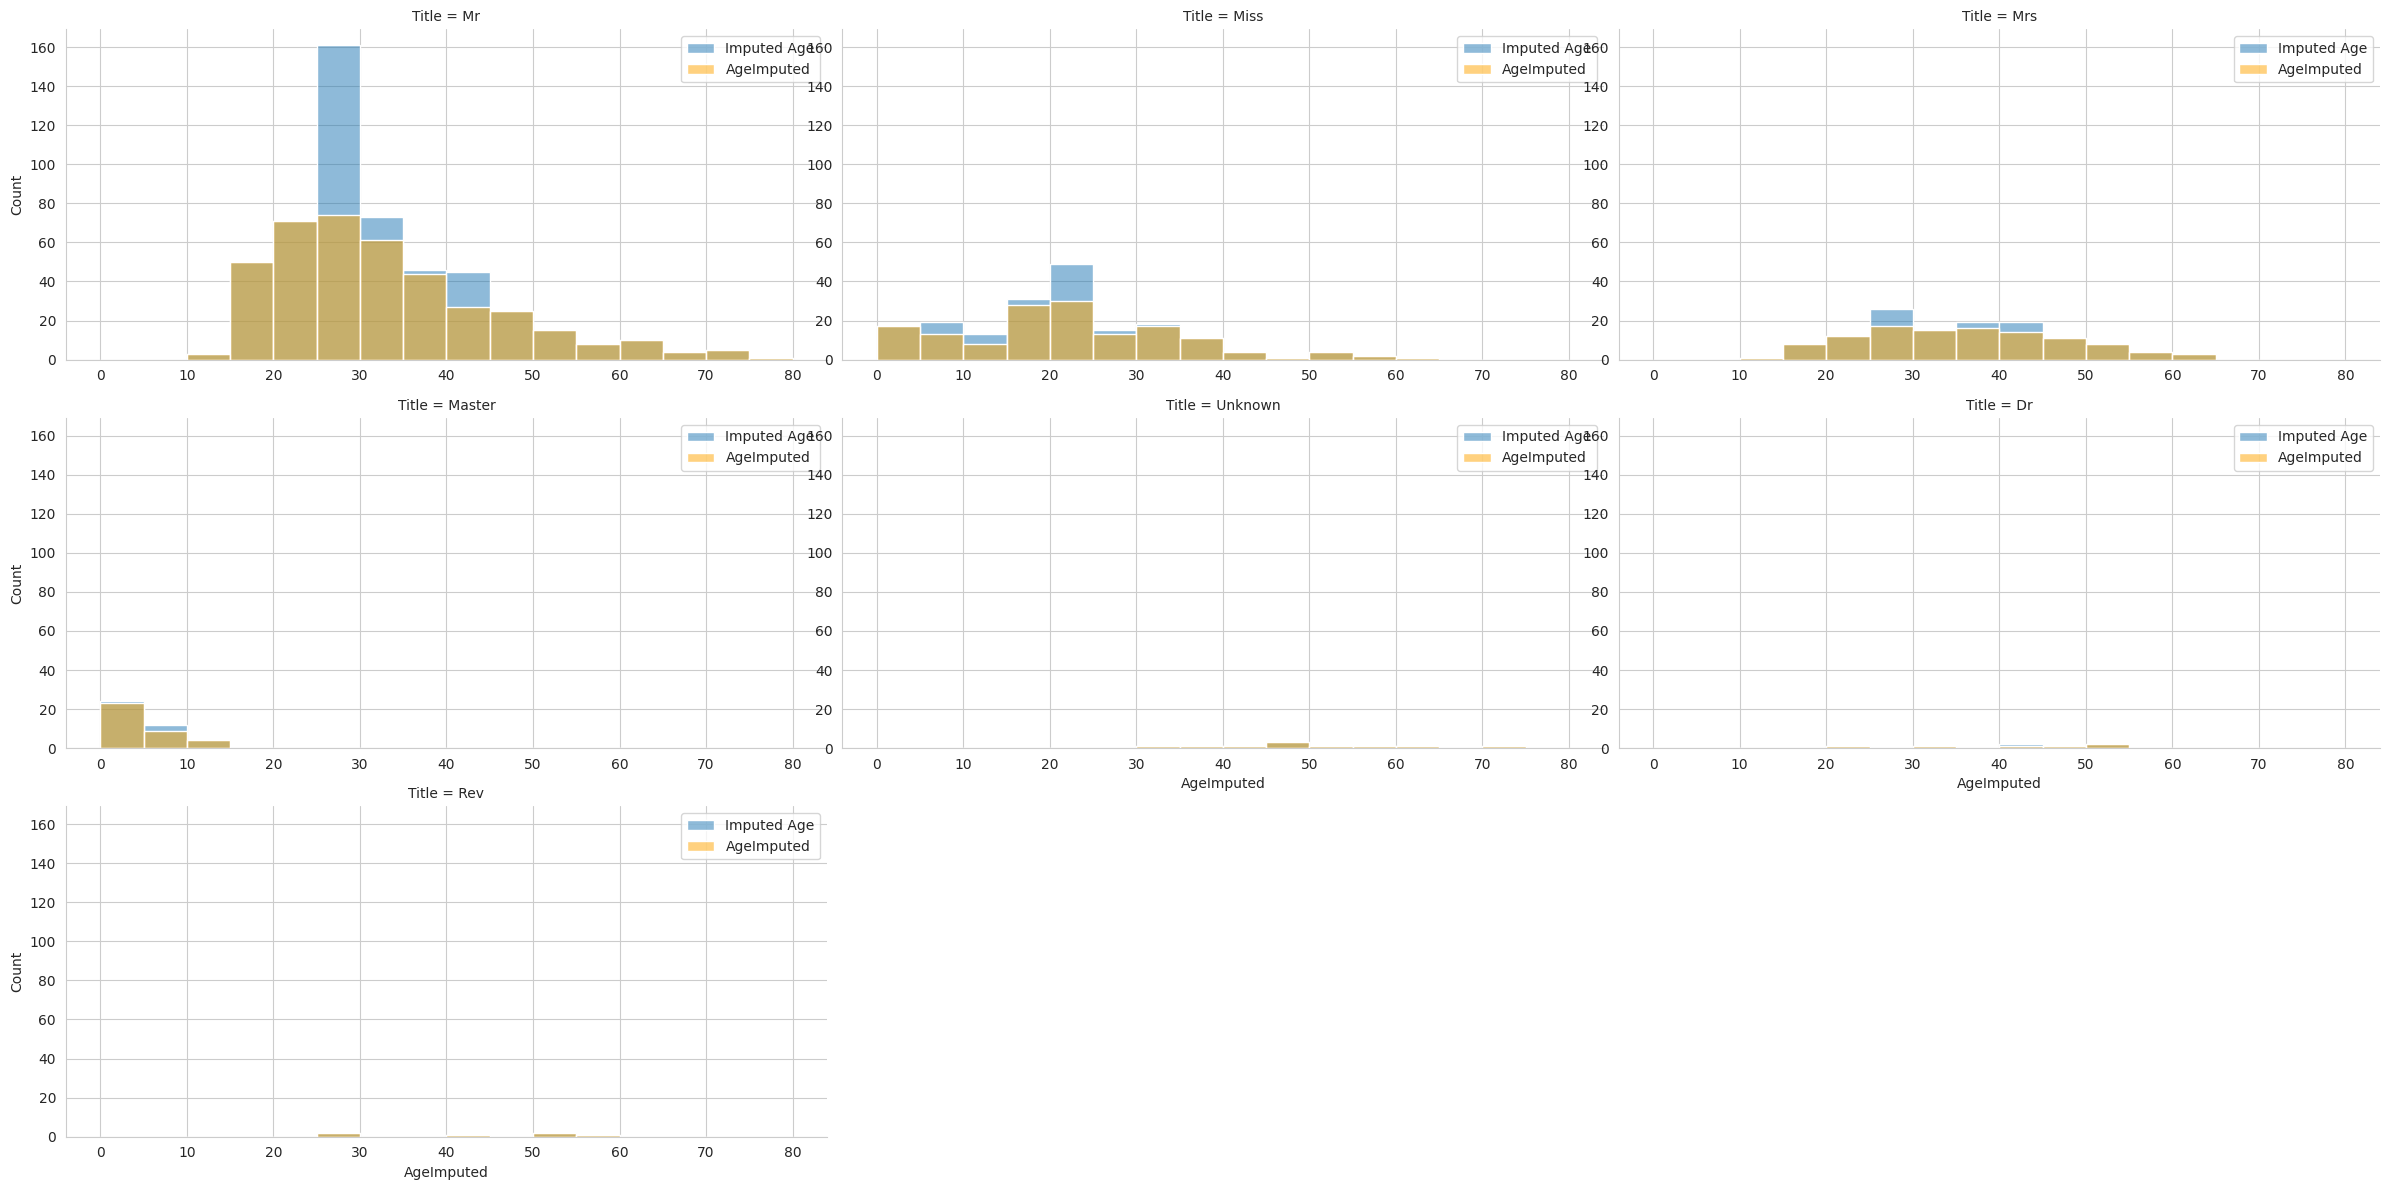

In [60]:
print(df.groupby("Title")[["AgeImputed", "Age"]].describe())
print("")

g = sns.displot(df, kind="hist", bins=range(0, 85, 5), x="AgeImputed", col="Title", col_order=df.Title.value_counts().sort_values(ascending=False).index, col_wrap=3, height=4, aspect=2, alpha=0.5, label="Imputed Age")
ax_iter = g.axes.flat
for i, sz in enumerate(df.Title.value_counts().sort_values(ascending=False).index):
    ax = next(ax_iter)
    _ = sns.histplot(df.query("Title == @sz"), bins=range(0, 85, 5), x="Age", alpha=0.5, color="orange", label="AgeImputed", ax=ax)
    _ = ax.legend()

for ax in g.axes.flat:
    ax.tick_params(labelbottom=True, labelleft=True)

              AgeImputed                                                    \
                   count       mean        std   min        25%        50%   
Pclass Sex                                                                   
1      female       34.0  35.010034  11.496735  16.0  26.750000  32.500000   
       male         75.0  44.390179  11.758339  22.0  36.000000  44.959712   
2      female       32.0  33.054663  10.346248  17.0  27.400691  31.000000   
       male         72.0  33.865522  12.431624  16.0  25.000000  33.211250   
3      female       60.0  23.291894   7.893196   5.0  21.000000  21.788206   
       male        264.0  29.261215   9.055713  11.0  23.000000  29.345908   

                                  Age                                     \
                     75%   max  count       mean        std   min    25%   
Pclass Sex                                                                 
1      female  41.166557  62.0   32.0  34.937500  11.788287  16.0  25

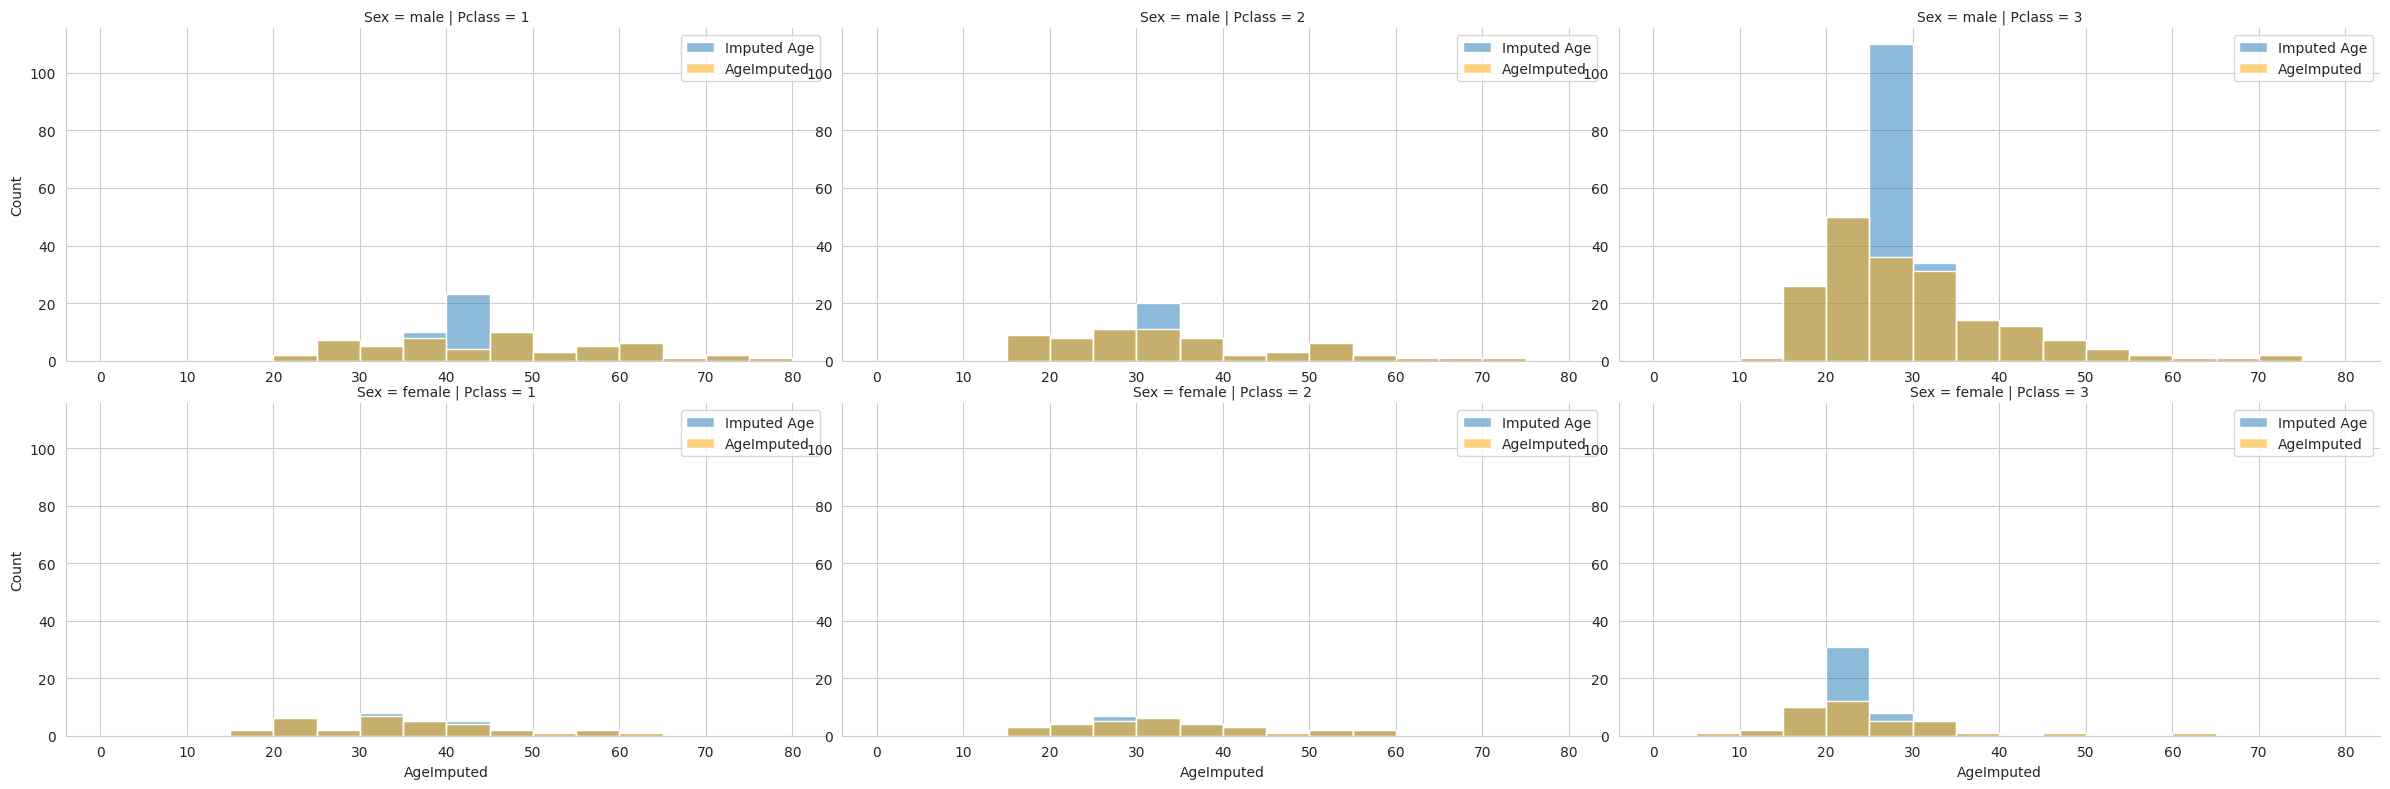

In [61]:
print(df.query("FamilySize == 0").groupby(["Pclass", "Sex"])[["AgeImputed", "Age"]].describe())
print("")

g = sns.displot(df.query("FamilySize == 0"), kind="hist", bins=range(0, 85, 5), x="AgeImputed", col="Pclass", col_order=sorted(df.Pclass.unique()), 
                row="Sex", row_order=["male", "female"], height=4, aspect=2, alpha=0.5, label="Imputed Age")
ax_iter = g.axes.flat
for sex in ["male", "female"]:
    for i, sz in enumerate(sorted(df.Pclass.unique())):
        ax = next(ax_iter)
        _ = sns.histplot(df.query("(FamilySize == 0) and (Pclass == @sz) and (Sex == @sex)"), bins=range(0, 85, 5), x="Age", alpha=0.5, color="orange", label="AgeImputed", ax=ax)
        _ = ax.legend()

for ax in g.axes.flat:
    ax.tick_params(labelbottom=True, labelleft=True)

             AgeImputed                                               \
                  count       mean        std   min   25%        50%   
Pclass Title                                                           
1      Miss        27.0  32.930336  10.574656  16.0  25.0  30.000000   
       Mr          67.0  44.216993  12.046828  22.0  36.0  44.959712   
2      Miss        21.0  30.321391   9.170093  17.0  24.0  28.714946   
       Mr          66.0  33.095721  12.069062  16.0  25.0  32.500000   
3      Miss        55.0  22.099562   5.855604   5.0  20.5  21.788206   
       Mr         264.0  29.261215   9.055713  11.0  23.0  29.345908   

                                Age                                          \
                   75%   max  count       mean        std   min   25%   50%   
Pclass Title                                                                  
1      Miss   38.00000  58.0   26.0  33.000000  10.777755  16.0  24.5  30.0   
       Mr     47.00000  80.0   47.0

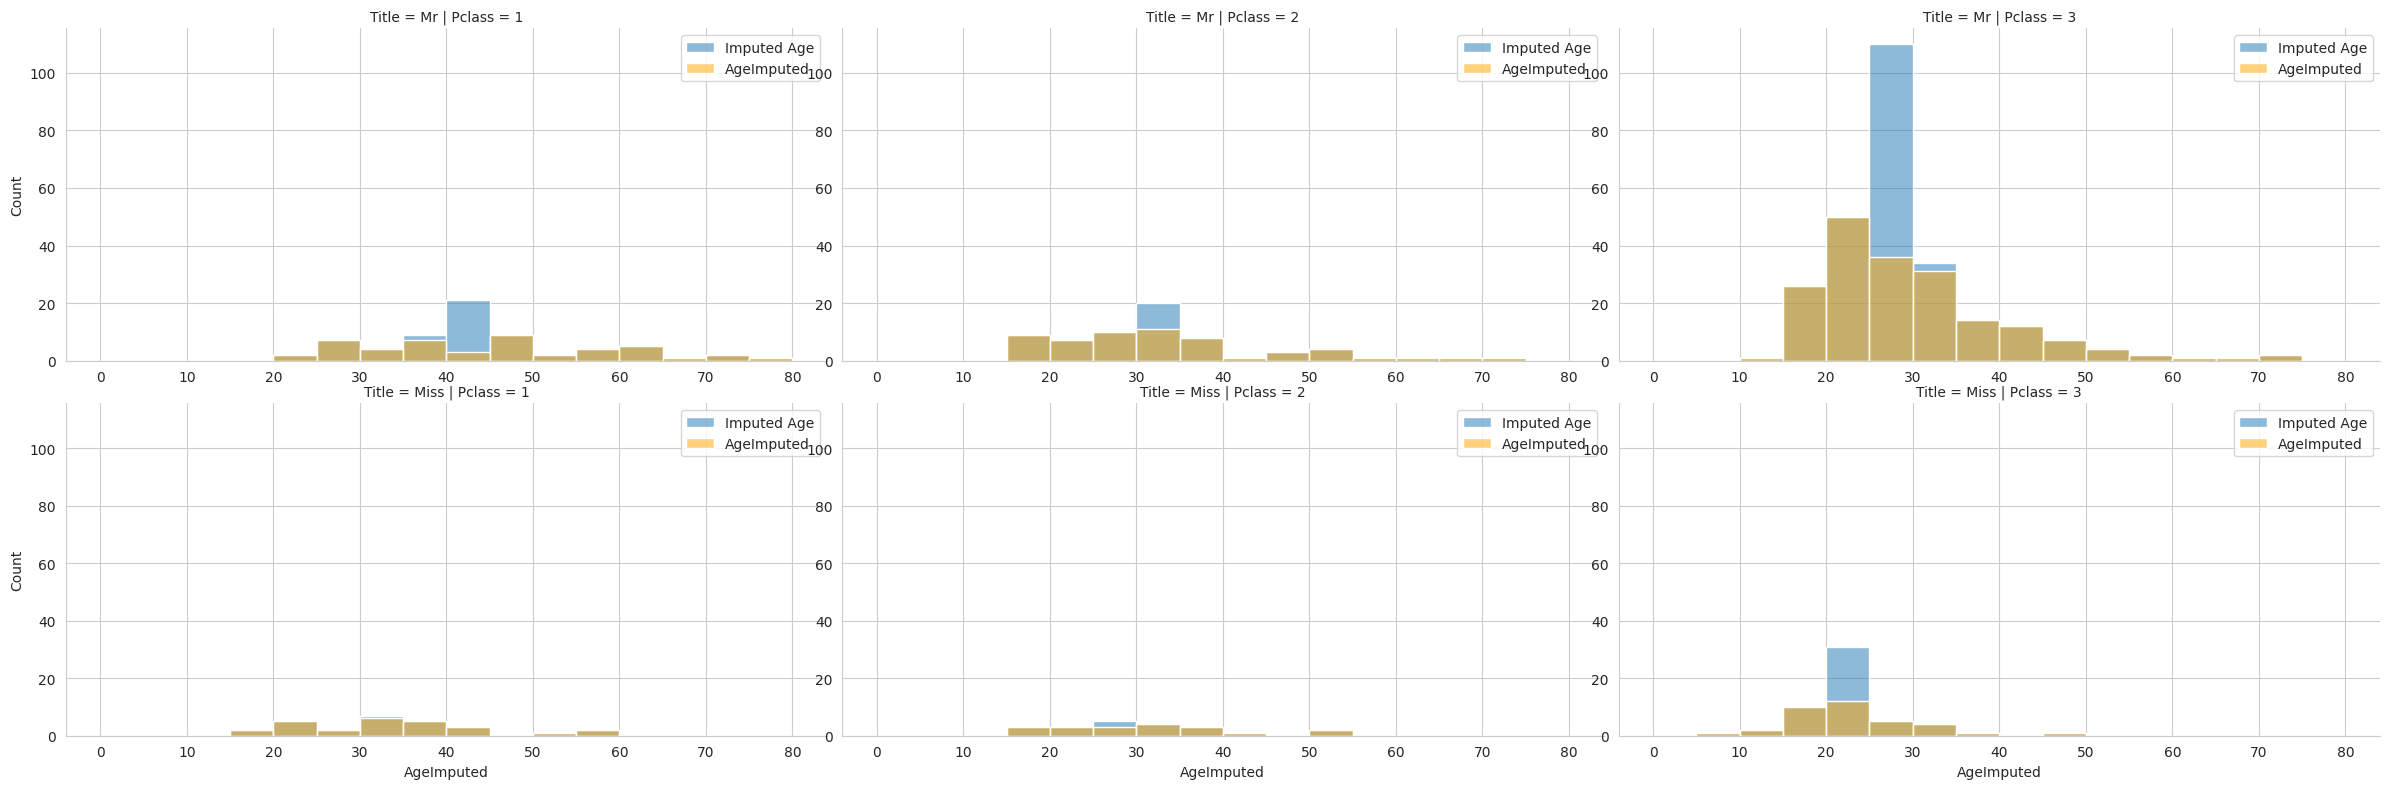

In [62]:
print(df.query("(FamilySize == 0) and (Title in ['Mr', 'Miss'])").groupby(["Pclass", "Title"])[["AgeImputed", "Age"]].describe())
print("")

g = sns.displot(df.query("(FamilySize == 0) and (Title in ['Mr', 'Miss'])"), kind="hist", bins=range(0, 85, 5), x="AgeImputed", col="Pclass", col_order=sorted(df.Pclass.unique()), 
                row="Title", row_order=["Mr", "Miss"], height=4, aspect=2, alpha=0.5, label="Imputed Age")

ax_iter = g.axes.flat
for title in ["Mr", "Miss"]:
    for i, sz in enumerate(sorted(df.Pclass.unique())):
        ax = next(ax_iter)
        _ = sns.histplot(df.query("(FamilySize == 0) and (Pclass == @sz) and (Title == @title)"), bins=range(0, 85, 5), x="Age", alpha=0.5, color="orange", label="AgeImputed", ax=ax)
        _ = ax.legend()

for ax in g.axes.flat:
    ax.tick_params(labelbottom=True, labelleft=True)

## Predicting Fare

In [214]:
X = df_train

In [216]:
X.groupby(["Pclass"]).Fare.median().to_dict()

{1: 60.287499999999994, 2: 14.25, 3: 8.05}

In [251]:
from sklearn.base import BaseEstimator, TransformerMixin
from pandas.core.frame import DataFrame

class FareImputer(BaseEstimator, TransformerMixin):
    def fit(self, X: DataFrame, y=None):
        self.mapper_ = X.groupby("Pclass")["Fare"].median().to_dict()
        return self
    
    def transform(self, X: DataFrame) -> DataFrame:
        X_out = X.copy()
        mask = X_out["Fare"].isna()
        X_out.loc[mask, "Fare"] = X_out.loc[mask, "Pclass"].map(self.mapper_)
        return X_out

In [252]:
fare_impute = FareImputer()

fare_impute.fit(df_train)
fare_impute.mapper_
df_test_out = fare_impute.transform(df_test)

In [258]:
df_test.Fare.describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [254]:
df_test_out.loc[df_test_out.Fare != df_test.Fare]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,8.05,NaN,S


# Model selection

* Treat the test predictions as the labels and see if they make sense
    * I broke it - I used Pclass as the only feature, and indeed, train/val/test accuracy are all 67%
* Other solutions
    * Prove that they leaked data and that it artificially inflates test performance
* Can you visualize how the random forest or decision tree is coming up with decisions?
* Gradient boosting?
* We're still overfitting on training data - is this affecting test generalization?

Features:
* Age: passthrough - imputation, what about log transform? Binning? Clipping or removing outliers?
* Fare: 
    * Tree: passthrough
    * Non-tree: try 4 bins (quantile + ordinal) + minmax, quantile transform (uniform and normal)
* Sex
    * Tree: ordinal
    * Non-tree: onehot
* Pclass
    * Tree: passthrough
    * Non-tree: minmax
* Title (onehot): valid = [Mr, Mrs, Miss, Master, Rev, Dr], valid = [Mr, Mrs, Miss, Master, Rev]
* SibSp/Parch: drop
* FamilySize
    * Tree: passthrough
    * Non-tree: clip upper 4
* Deck (ord): drop
* Embarked (onehot): drop
* SexPclassAge (onehot): passthrough

In [ ]:
from custom_transformers import DynamicDataPrepPipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from utility_functions import make_stratified_k_fold_with_custom_strata, make_custom_strata

df = pd.read_csv("./dataset/train.csv")

In [24]:
# Custom scoring functions

from custom_transformers import TitleExtractor
from custom_scoring import make_scorer_wrapper

title_extractor = TitleExtractor()
df_with_title = title_extractor.transform(df)
# title_mr_acc_scorer = make_scorer_wrapper(df_with_title["Title"], "Mr", "accuracy")
# title_mr_rec_scorer = make_scorer_wrapper(df_with_title["Title"], "Mr", "recall")
# title_mr_prec_scorer = make_scorer_wrapper(df_with_title["Title"], "Mr", "precision")
# title_mr_f1_scorer = make_scorer_wrapper(df_with_title["Title"], "Mr", "f1")
# title_mr_tn_scorer = make_scorer_wrapper(df_with_title["Title"], "Mr", "tn")
# title_mr_tp_scorer = make_scorer_wrapper(df_with_title["Title"], "Mr", "tp")
# title_mr_fn_scorer = make_scorer_wrapper(df_with_title["Title"], "Mr", "fn")
# title_mr_fp_scorer = make_scorer_wrapper(df_with_title["Title"], "Mr", "fp")

## Cross-validation

In [ ]:
from src.custom_transformers import DynamicDataPrepPipeline
from sklearn.preprocessing import KBinsDiscretizer, QuantileTransformer, PowerTransformer, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import cross_validate
from src.custom_model_selection import make_stratified_k_fold_with_custom_strata, make_custom_strata

df = pd.read_csv("./dataset/train.csv")

data_prep_pipe = DynamicDataPrepPipeline(numeric_columns=["Pclass", "SibSp", "Parch"], 
                                         ordinal_columns=["Sex"], 
                                         onehot_columns=[])
# data_prep_pipe = DynamicDataPrepPipeline(numeric_columns=set(), 
#                                          ordinal_columns={"Sex"}, 
#                                          onehot_columns=set())
# data_prep_pipe = DynamicDataPrepPipeline(extract_title=True,
#                                          numeric_columns=set(), 
#                                          ordinal_columns=set(), 
#                                          onehot_columns=set())
# data_prep_pipe = DynamicDataPrepPipeline(numeric_columns={"Age", "Fare", "Pclass"}, 
#                                          ordinal_columns={"Sex"}, 
#                                          onehot_columns=set())

data_prep_pipe = DynamicDataPrepPipeline(
    ordinal_columns=["Sex"],
    numeric_columns=["Age", "Pclass", "Fare"],
    extract_title=True,
    extract_fam=True,
    extract_deck=True,
    extract_sexpclassage=True,
    # age_imputer_model=RandomForestRegressor(max_depth=10, random_state=0),
    # impute_age_kwargs={"add_indicator": True},
)
# data_prep_pipe = DynamicDataPrepPipeline(
#     ordinal_columns={"Sex"},
#     numeric_columns={"Pclass", "Fare"},
#     extract_title=True,
#     extract_fam=True,
#     extract_deck=True,
#     extract_sexpclassage=True,
#     # age_imputer_model=RandomForestRegressor(max_depth=10, random_state=0),
#     # impute_age_kwargs={"add_indicator": True},
# )
model = RandomForestClassifier(max_depth=20, random_state=0)
# model = xgb.XGBClassifier(tree_method="hist") #, early_stopping_rounds=2)
# max_depth=20
# max_leaf_nodes=100
# min_samples_leaf=1
# ccp_alpha=0
# model = RandomForestClassifier(max_depth=max_depth, 
#                                max_leaf_nodes=max_leaf_nodes, 
#                             #    min_samples_leaf=min_samples_leaf, 
#                             #    ccp_alpha=ccp_alpha,
#                                random_state=0)

# max_depth=5
# max_iter=200
# model = HistGradientBoostingClassifier(max_depth=max_depth, max_iter=max_iter, random_state=0)

# max_depth=20
# max_leaf_nodes=50
# model = DecisionTreeClassifier(max_depth=max_depth, max_leaf_nodes=max_leaf_nodes, random_state=0)

# numeric_transformations = {
#     "Fare": Pipeline([("bin", KBinsDiscretizer(n_bins=4, encode="ordinal")), ("scale", MinMaxScaler())]),
#     "Pclass": MinMaxScaler(),
#     # "FamilySize": OneHotEncoder(handle_unknown="ignore")
# }
# data_prep_pipe = DynamicDataPrepPipeline(
#     numeric_columns={"Fare", "Pclass"},
#     numeric_transformations=numeric_transformations,
#     # onehot_columns={"Sex"},
#     extract_fam=True,
#     # fam_kwargs={"max_famsize": 4},
#     fam_kwargs={"max_famsize": 1},
#     extract_title=True
# )
# model = LogisticRegression()
# model = SVC(C=1000)

ml_pipe = Pipeline([
    ("data_prep", data_prep_pipe),
    ("model", model)
])

n_folds = 10
cv_splitter = make_stratified_k_fold_with_custom_strata(df_with_title, ["Title", "Survived"], cv_kwargs={"n_splits": n_folds, "shuffle": True, "random_state": 0})

In [340]:
cv_results = cross_validate(ml_pipe, df.drop(columns=["Survived"]), y=df["Survived"], cv=cv_splitter, return_train_score=True)

cv_df = pd.DataFrame(cv_results)
print(cv_df[["test_score", "train_score"]].describe())
cv_df

       test_score  train_score
count   10.000000    10.000000
mean     0.817029     0.976681
std      0.034497     0.002628
min      0.752809     0.972569
25%      0.800562     0.975062
50%      0.808989     0.976309
75%      0.844007     0.978180
max      0.865169     0.981297


,fit_time,score_time,test_score,train_score
0,12.346066,0.058318,0.844444,0.980025
1,7.583910,0.056749,0.842697,0.981297
2,9.136483,0.067118,0.786517,0.975062
3,11.683393,0.056148,0.865169,0.978803
4,8.152118,0.056614,0.808989,0.975062
5,10.020021,0.043687,0.808989,0.972569
6,10.131404,0.051519,0.752809,0.976309
7,9.344843,0.061598,0.853933,0.975062
8,8.283271,0.055872,0.808989,0.976309
9,7.565722,0.054793,0.797753,0.976309


In [309]:
ml_pipe.fit(df.drop(columns=["Survived"]), y=df["Survived"])

print(ml_pipe.named_steps["data_prep"].get_feature_names_out())

numeric_features = ml_pipe.named_steps["data_prep"].pipeline_.transform(df.drop(columns=["Survived"]))

['num_Pclass__Pclass' 'num_Age__Age' 'num_Fare__Fare'
 'num_FamilySize__FamilySize' 'ord_Sex__Sex' 'ord_Deck__Deck'
 'onehot_Sex__Sex_male' 'onehot_Sex__Sex_female' 'onehot_Title__Title_Mr'
 'onehot_Title__Title_Miss' 'onehot_Title__Title_Mrs'
 'onehot_Title__Title_Master' 'onehot_Title__Title_Dr'
 'onehot_Title__Title_Rev' 'onehot_Title__Title_Unknown'
 'onehot_SexPclassAge__SexPclassAge_Male, P3, 5<Age<=15'
 'onehot_SexPclassAge__SexPclassAge_Male, P3, Age<=5'
 'onehot_SexPclassAge__SexPclassAge_Male, P3, Age>15'
 'onehot_SexPclassAge__SexPclassAge_Other']


In [302]:
ml_pipe.named_steps["data_prep"].pipeline_.named_steps["col_tf"]

ColumnTransformer(transformers=[('num_Pclass', MinMaxScaler(), ['Pclass']),
                                ('num_Fare',
                                 Pipeline(steps=[('bin',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   n_bins=4)),
                                                 ('scale', MinMaxScaler())]),
                                 ['Fare']),
                                ('num_FamilySize', StandardScaler(),
                                 ['FamilySize']),
                                ('onehot_Sex',
                                 OneHotEncoder(categories=[['male', 'female']]),
                                 ['Sex']),
                                ('onehot_Title',
                                 OneHotEncoder(categories=[['Mr', 'Miss', 'Mrs',
                                                            'Master', 'Dr',
                                                            'Rev', 'Unknown']],
                                               handle_unknown='ignore'),
                                 ['Title'])])

In [303]:
for i in range(numeric_features.shape[1]):
    f = numeric_features[:, i]
    print([f.min(), f.max(), f.mean(), f.std()])

[np.float64(0.0), np.float64(1.0), np.float64(0.654320987654321), np.float64(0.4178009667397583)]
[np.float64(0.0), np.float64(1.0), np.float64(0.5028058361391695), np.float64(0.37350305931074607)]
[np.float64(-0.65751558708656), np.float64(2.6901780591655826), np.float64(3.987332972840068e-17), np.float64(1.0)]
[np.float64(0.0), np.float64(1.0), np.float64(0.6475869809203143), np.float64(0.47772176322921145)]
[np.float64(0.0), np.float64(1.0), np.float64(0.35241301907968575), np.float64(0.4777217632292115)]
[np.float64(0.0), np.float64(1.0), np.float64(0.5802469135802469), np.float64(0.4935184220075724)]
[np.float64(0.0), np.float64(1.0), np.float64(0.20763187429854096), np.float64(0.405611734388708)]
[np.float64(0.0), np.float64(1.0), np.float64(0.1414141414141414), np.float64(0.3484482487002089)]
[np.float64(0.0), np.float64(1.0), np.float64(0.04489337822671156), np.float64(0.20706994668011336)]
[np.float64(0.0), np.float64(1.0), np.float64(0.007856341189674524), np.float64(0.088287

In [310]:
# ml_pipe.fit(df.drop(columns=["Survived"]), y=df["Survived"])

feature_importance = pd.DataFrame({"Feature": ml_pipe.named_steps["data_prep"].get_feature_names_out(),
                                   "Importance": (ml_pipe.named_steps["model"].feature_importances_*100).round(2)})

feature_importance.sort_values(by="Importance", ascending=False)

,Feature,Importance
2,num_Fare__Fare,23.78
1,num_Age__Age,21.85
6,onehot_Sex__Sex_male,7.87
8,onehot_Title__Title_Mr,7.70
3,num_FamilySize__FamilySize,7.68
7,onehot_Sex__Sex_female,7.18
0,num_Pclass__Pclass,6.29
5,ord_Deck__Deck,5.24
4,ord_Sex__Sex,4.85
18,onehot_SexPclassAge__SexPclassAge_Other,1.81


In [ ]:
depths = [tree.get_depth() for tree in ml_pipe.named_steps["model"].estimators_]
n_leaves = [tree.get_n_leaves() for tree in ml_pipe.named_steps["model"].estimators_]

rf_fitted_df = pd.DataFrame({"Depth": depths, "NumLeaves": n_leaves})
rf_fitted_df.describe()

In [44]:
print(ml_pipe.named_steps["model"].get_depth())
print(ml_pipe.named_steps["model"].get_n_leaves())

16
100


### Learning curves

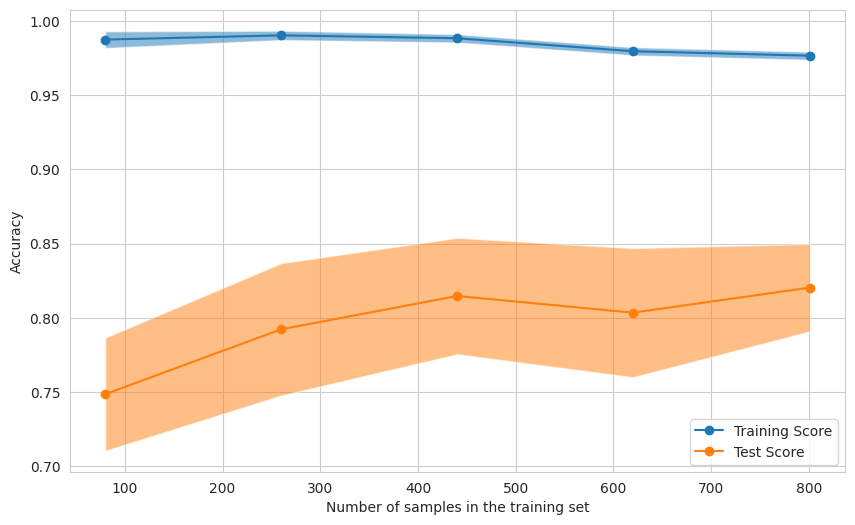

In [341]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6), sharey=True)

common_params = {
    "X": df.drop(columns=["Survived"]),
    "y": df["Survived"],
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": cv_splitter,
    "score_type": "both",
    # "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

# for ax_idx, estimator in enumerate([ml_pipe]):
estimator = ml_pipe
LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax)
handles, label = ax.get_legend_handles_labels()
ax.legend(handles[:2], ["Training Score", "Test Score"])
# ax.set_title(f"Learning Curve for LogisticRegression")
# ax.set_title(f"Learning Curve for SVC")
# ax.set_title(f"Learning Curve for RFC, max_depth={20}, impute age")
# ax.set_title(f"Learning Curve for HGBC, max_iter={max_iter}, max_depth={max_depth}")
# ax.set_title(f"Learning Curve for DT, max_depth={max_depth}, max_leaf_nodes={max_leaf_nodes}")
# ax.set_ylim(bottom=0.75, top=1)
# plt.show()

### Calibration curves

In [ ]:
# train_idx, val_idx = next(cv_splitter.split(df.drop(columns=["Survived"]), y=df["Survived"]))
# X_train = df.drop(columns=["Survived"]).iloc[train_idx]
# y_train = df["Survived"].iloc[train_idx].to_numpy()
# X_test = df.drop(columns=["Survived"]).iloc[val_idx]
# y_test = df["Survived"].iloc[val_idx].to_numpy()
# X_train = data_prep_pipe.fit_transform(X_train)
# X_test = data_prep_pipe.transform(X_test)

In [38]:
df_sub = df_with_title.query("Title in ['Miss', 'Mrs']")

n_folds = 2
cv_splitter = make_stratified_k_fold_with_custom_strata(df_sub, ["Survived"], cv_kwargs={"n_splits": n_folds, "shuffle": True})

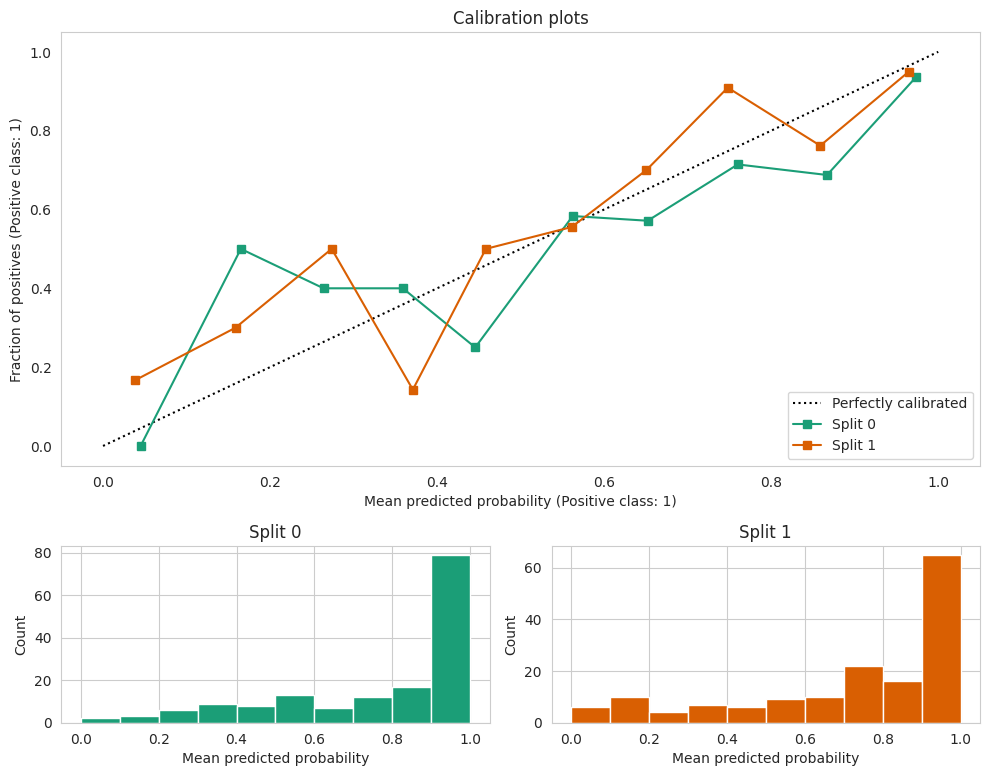

In [40]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay

# n_folds = 2
# cv_splitter = make_stratified_k_fold_with_custom_strata(df_with_title, ["Title", "Survived"], cv_kwargs={"n_splits": n_folds, "shuffle": True})

fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.get_cmap("Dark2")

ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
# for i, (clf, name) in enumerate(clf_list):
for i, (train_idx, val_idx) in enumerate(cv_splitter.split(df_sub.drop(columns=["Survived"]), y=df_sub["Survived"])):
    X_train = df_sub.drop(columns=["Survived"]).iloc[train_idx]
    y_train = df_sub["Survived"].iloc[train_idx].to_numpy()
    X_test = df_sub.drop(columns=["Survived"]).iloc[val_idx]
    y_test = df_sub["Survived"].iloc[val_idx].to_numpy()
    X_train = data_prep_pipe.fit_transform(X_train)
    X_test = data_prep_pipe.transform(X_test)
    model.fit(X_train, y_train)
    display = CalibrationDisplay.from_estimator(
        model,
        X_test,
        y_test,
        n_bins=10,
        name=f"Split {i}",
        ax=ax_calibration_curve,
        color=colors(i),
    )
    calibration_displays[f"Split {i}"] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots")

# Add histogram
grid_positions = [(2, 0), (2, 1), (3, 0), (3, 1)]
# for i, (_, name) in enumerate(clf_list):
for i, name in enumerate(calibration_displays.keys()):
    row, col = grid_positions[i]
    ax = fig.add_subplot(gs[row, col])

    ax.hist(
        calibration_displays[name].y_prob,
        range=(0, 1),
        bins=10,
        label=name,
        color=colors(i),
    )
    ax.set(title=name, xlabel="Mean predicted probability", ylabel="Count")

plt.tight_layout()
plt.show()

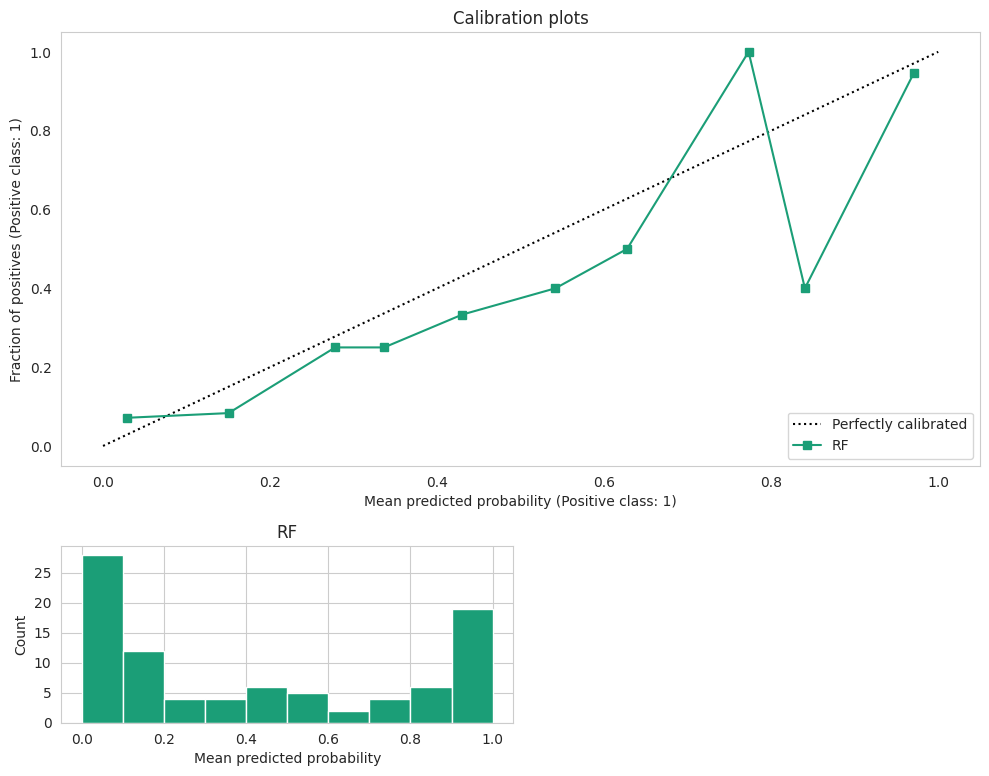

In [ ]:
# import matplotlib.pyplot as plt
# from matplotlib.gridspec import GridSpec

# from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay

# clf_list = [(model, "RF")]

# fig = plt.figure(figsize=(10, 10))
# gs = GridSpec(4, 2)
# colors = plt.get_cmap("Dark2")

# ax_calibration_curve = fig.add_subplot(gs[:2, :2])
# calibration_displays = {}
# for i, (clf, name) in enumerate(clf_list):
#     clf.fit(X_train, y_train)
#     display = CalibrationDisplay.from_estimator(
#         clf,
#         X_test,
#         y_test,
#         n_bins=10,
#         name=name,
#         ax=ax_calibration_curve,
#         color=colors(i),
#     )
#     calibration_displays[name] = display

# ax_calibration_curve.grid()
# ax_calibration_curve.set_title("Calibration plots")

# # Add histogram
# grid_positions = [(2, 0), (2, 1), (3, 0), (3, 1)]
# for i, (_, name) in enumerate(clf_list):
#     row, col = grid_positions[i]
#     ax = fig.add_subplot(gs[row, col])

#     ax.hist(
#         calibration_displays[name].y_prob,
#         range=(0, 1),
#         bins=10,
#         label=name,
#         color=colors(i),
#     )
#     ax.set(title=name, xlabel="Mean predicted probability", ylabel="Count")

# plt.tight_layout()
# plt.show()

## Hyperparameter tuning

In [48]:
from custom_transformers import DynamicDataPrepPipeline
from utility_functions import make_stratified_k_fold_with_custom_strata
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, \
    GradientBoostingClassifier, \
        HistGradientBoostingClassifier, \
        RandomForestRegressor

data_prep_pipe = DynamicDataPrepPipeline()
model = RandomForestClassifier(max_depth=5, random_state=0)
model = HistGradientBoostingClassifier(random_state=0)
model = DecisionTreeClassifier(random_state=0)

ml_pipe = Pipeline([
    ("data_prep", data_prep_pipe),
    ("model", model)
])

# 0
# Not much difference as long as Sex is a feature (77-80% val accuracy)
# Performance drops to 70% val accuracy without Sex
# Train and val accuracy are both low, even when reducing model regularization
# Underfitting, but not due to model complexity - due to features
param_grid = [
    {
        "data_prep__ordinal_columns": [{"Sex"}],
        "data_prep__numeric_columns": [
            {"Pclass", "SibSp", "Parch"}, # From tutorial
            {"SibSp", "Parch"},
            {"Pclass"},
            set()],
        "model__max_depth": [5, 20],
    },
    {
        "data_prep__ordinal_columns": [{"Sex"}],
        "data_prep__numeric_columns": [{"Pclass"}],
        "data_prep__extract_fam": [True],
        "model__max_depth": [5, 20],
    },
    {
        "data_prep__ordinal_columns": [set()],
        "data_prep__numeric_columns": [{"Pclass", "SibSp", "Parch"}],
        "model__max_depth": [5, 20],
    },
]

# 1
# Extracting everything seems best, with fam and title seemingly having the most effect
# Once again, increasing model complexity does not improve val performance
param_grid = [
    {
        "data_prep__ordinal_columns": [{"Sex"}],
        "data_prep__numeric_columns": [
            {"Age", "Pclass", "Fare"}],
        "data_prep__extract_title": [False, True],
        "data_prep__extract_fam": [False, True],
        "data_prep__extract_deck": [False, True],
        "data_prep__extract_sexpclassage": [False, True],
        "model__max_depth": [5, 20],
    },
]

# 2
# Transforming fare and imputing age don't seem to help
param_grid = [
    {
        "data_prep__ordinal_columns": [{"Sex"}],
        "data_prep__numeric_columns": [
            {"Age", "Pclass"}],
        "data_prep__extract_title": [True],
        "data_prep__extract_fam": [True],
        "data_prep__extract_deck": [True],
        "data_prep__extract_sexpclassage": [True],
        "data_prep__transform_fare": [True],
        "model__max_depth": [5, 20],
    },
    {
        "data_prep__ordinal_columns": [{"Sex"}],
        "data_prep__numeric_columns": [
            {"Age", "Pclass", "Fare"}],
        "data_prep__extract_title": [True],
        "data_prep__extract_fam": [True],
        "data_prep__extract_deck": [True],
        "data_prep__extract_sexpclassage": [True],
        "data_prep__age_imputer_model": [
            RandomForestRegressor(max_depth=5, random_state=0),
            RandomForestRegressor(max_depth=10, random_state=0),
            RandomForestRegressor(max_depth=20, random_state=0),
        ],
        "data_prep__impute_age_kwargs": [{"add_indicator": False}, {"add_indicator": True}],
        "model__max_depth": [5, 20],
    },
]

# 3
# Fine-tuning the model hyperparameters
param_grid = [
    {
        "data_prep__ordinal_columns": [{"Sex"}],
        "data_prep__numeric_columns": [{"Age", "Pclass", "Fare"}],
        "data_prep__extract_title": [True],
        "data_prep__extract_fam": [True],
        "data_prep__extract_deck": [True],
        "data_prep__extract_sexpclassage": [True],
        "model__max_depth": [15, 10, 5],
        # "model__l2_regularization": [0.001, 0.002, 0.005, 0.01],
        # "model__max_iter": [200, 500, 1000],
        # "model__n_estimators": [500, 1000],
        # "model__ccp_alpha": [0.002, 0.004],
        "model__max_leaf_nodes": [200],
        # "model__min_samples_leaf": [2, 3],
        # "data_prep__age_imputer_model": [
        #     RandomForestRegressor(max_depth=10, random_state=0),
        # ],
        # "data_prep__impute_age_kwargs": [{"add_indicator": True}],
    },
]

scoring_dict = {
    "accuracy": "accuracy",
    # "recall": "recall",
    # "precision": "precision",
    # "f1": "f1",
    # "accuracy_mr": title_mr_acc_scorer,
    # "recall_mr": title_mr_rec_scorer,
    # "precision_mr": title_mr_prec_scorer,
    # "f1_mr": title_mr_f1_scorer,
    # "tn_mr": title_mr_tn_scorer,
    # "tp_mr": title_mr_tp_scorer,
    # "fn_mr": title_mr_fn_scorer,
    # "fp_mr": title_mr_fp_scorer,
}

n_folds = 10
cv_index_iter = make_stratified_k_fold_with_custom_strata(df_with_title, ["Title", "Survived"], cv_kwargs={"n_splits": n_folds, "shuffle": True, "random_state": 0})
# cv_index_iter = n_folds
# grid = GridSearchCV(ml_pipe, param_grid=param_grid, cv=cv_index_iter, 
#                     scoring=scoring_dict, 
#                     return_train_score=True,
#                     refit=False)
grid = GridSearchCV(ml_pipe, param_grid=param_grid, cv=n_folds, 
                    scoring="accuracy", 
                    return_train_score=True)
grid.fit(df.drop("Survived", axis=1), y=df["Survived"])
# grid.fit(df.drop("Survived", axis=1), y=df["Survived"], **{"model__sample_weight": sample_weights})
# grid.fit(df.drop("Survived", axis=1), y=df["Survived"], model__sample_weight=sample_weights)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('data_prep', DynamicDataPrepPipeline()),
                                       ('model',
                                        DecisionTreeClassifier(random_state=0))]),
             param_grid=[{'data_prep__extract_deck': [True],
                          'data_prep__extract_fam': [True],
                          'data_prep__extract_sexpclassage': [True],
                          'data_prep__extract_title': [True],
                          'data_prep__numeric_columns': [{'Age', 'Fare',
                                                          'Pclass'}],
                          'data_prep__ordinal_columns': [{'Sex'}],
                          'model__max_depth': [15, 10, 5],
                          'model__max_leaf_nodes': [200]}],
             return_train_score=True, scoring='accuracy')

In [ ]:
pd.set_option("display.max_colwidth", 1000)
test_results = pd.DataFrame({"Run": list(range(len(grid.cv_results_["mean_train_score"]))),
                             "Train (Mean)": (np.array(grid.cv_results_["mean_train_score"])*100).round(2),
                             "Train (Std)": (np.array(grid.cv_results_["std_train_score"])*100/np.sqrt(n_folds)).round(2),
                             "Test (Mean)": (np.array(grid.cv_results_["mean_test_score"])*100).round(2),
                             "Test (Std)": (np.array(grid.cv_results_["std_test_score"])*100/np.sqrt(n_folds)).round(2),
                             "Params": grid.cv_results_["params"]})

# test_results = pd.read_pickle("./cv/2_fare_transform_age_impute.pkl")
test_results.sort_values(by="Test (Mean)", ascending=False)

,Run,Train (Mean),Train (Std),Test (Mean),Test (Std),Params
2,2,84.51,0.33,83.05,0.98,"{'data_prep__age_imputer_model': RandomForestRegressor(max_depth=5, random_state=0), 'data_prep__extract_deck': True, 'data_prep__extract_fam': True, 'data_prep__extract_sexpclassage': True, 'data_prep__extract_title': True, 'data_prep__impute_age_kwargs': {'add_indicator': False}, 'data_prep__numeric_columns': {'Pclass', 'Age', 'Fare'}, 'data_prep__ordinal_columns': {'Sex'}, 'model__max_depth': 5}"
10,10,84.32,0.21,82.94,1.18,"{'data_prep__age_imputer_model': RandomForestRegressor(max_depth=20, random_state=0), 'data_prep__extract_deck': True, 'data_prep__extract_fam': True, 'data_prep__extract_sexpclassage': True, 'data_prep__extract_title': True, 'data_prep__impute_age_kwargs': {'add_indicator': False}, 'data_prep__numeric_columns': {'Pclass', 'Age', 'Fare'}, 'data_prep__ordinal_columns': {'Sex'}, 'model__max_depth': 5}"
6,6,84.48,0.29,82.83,1.14,"{'data_prep__age_imputer_model': RandomForestRegressor(max_depth=10, random_state=0), 'data_prep__extract_deck': True, 'data_prep__extract_fam': True, 'data_prep__extract_sexpclassage': True, 'data_prep__extract_title': True, 'data_prep__impute_age_kwargs': {'add_indicator': False}, 'data_prep__numeric_columns': {'Pclass', 'Age', 'Fare'}, 'data_prep__ordinal_columns': {'Sex'}, 'model__max_depth': 5}"
0,0,84.60,0.31,82.60,0.81,"{'data_prep__extract_deck': True, 'data_prep__extract_fam': True, 'data_prep__extract_sexpclassage': True, 'data_prep__extract_title': True, 'data_prep__numeric_columns': {'Pclass', 'Age'}, 'data_prep__ordinal_columns': {'Sex'}, 'data_prep__transform_fare': True, 'model__max_depth': 5}"
4,4,84.57,0.34,82.38,0.80,"{'data_prep__age_imputer_model': RandomForestRegressor(max_depth=5, random_state=0), 'data_prep__extract_deck': True, 'data_prep__extract_fam': True, 'data_prep__extract_sexpclassage': True, 'data_prep__extract_title': True, 'data_prep__impute_age_kwargs': {'add_indicator': True}, 'data_prep__numeric_columns': {'Pclass', 'Age', 'Fare'}, 'data_prep__ordinal_columns': {'Sex'}, 'model__max_depth': 5}"
8,8,84.68,0.37,82.27,0.78,"{'data_prep__age_imputer_model': RandomForestRegressor(max_depth=10, random_state=0), 'data_prep__extract_deck': True, 'data_prep__extract_fam': True, 'data_prep__extract_sexpclassage': True, 'data_prep__extract_title': True, 'data_prep__impute_age_kwargs': {'add_indicator': True}, 'data_prep__numeric_columns': {'Pclass', 'Age', 'Fare'}, 'data_prep__ordinal_columns': {'Sex'}, 'model__max_depth': 5}"
12,12,84.65,0.38,81.93,0.92,"{'data_prep__age_imputer_model': RandomForestRegressor(max_depth=20, random_state=0), 'data_prep__extract_deck': True, 'data_prep__extract_fam': True, 'data_prep__extract_sexpclassage': True, 'data_prep__extract_title': True, 'data_prep__impute_age_kwargs': {'add_indicator': True}, 'data_prep__numeric_columns': {'Pclass', 'Age', 'Fare'}, 'data_prep__ordinal_columns': {'Sex'}, 'model__max_depth': 5}"
1,1,98.91,0.07,81.71,2.07,"{'data_prep__extract_deck': True, 'data_prep__extract_fam': True, 'data_prep__extract_sexpclassage': True, 'data_prep__extract_title': True, 'data_prep__numeric_columns': {'Pclass', 'Age'}, 'data_prep__ordinal_columns': {'Sex'}, 'data_prep__transform_fare': True, 'model__max_depth': 20}"
13,13,98.91,0.07,81.59,1.68,"{'data_prep__age_imputer_model': RandomForestRegressor(max_depth=20, random_state=0), 'data_prep__extract_deck': True, 'data_prep__extract_fam': True, 'data_prep__extract_sexpclassage': True, 'data_prep__extract_title': True, 'data_prep__impute_age_kwargs': {'add_indicator': True}, 'data_prep__numeric_columns': {'Pclass', 'Age', 'Fare'}, 'data_prep__ordinal_columns': {'Sex'}, 'model__max_depth': 20}"
5,5,98.91,0.07,81.59,1.90,"{'data_prep__age_imputer_model': RandomForestRegressor(max_depth=5, random_state=0), 'data_prep__extract_deck': True, 'data_prep__extract_fam': True, 'data_prep__extract_sexpclassage': True, 'data_prep__extract_title': True, 'data_prep__impute_age_kwargs': {'add_i

In [ ]:
# test_results1 = pd.read_pickle("./cv/5_tune_dt.pkl")
# test_results = pd.concat((test_results1, test_results), axis=0)
# test_results.to_pickle("./cv/5_tune_dt.pkl")
# test_results.sort_values(by="Test (Mean)", ascending=False)

In [98]:
import glob

pd.set_option("display.max_rows", 500)
for i, f in enumerate(sorted(glob.glob("./cv/*.pkl"))):
    if i > 0:
        test_results = pd.concat((test_results, pd.read_pickle(f)), axis=0)
    else:
        test_results = pd.read_pickle(f)

test_results.sort_values(by="Test (Mean)", ascending=False)

,Run,Train (Mean),Train (Std),Test (Mean),Test (Std),Params
18,1,89.01,0.24,84.18,1.43,"{'data_prep__extract_deck': True, 'data_prep__extract_fam': True, 'data_prep__extract_sexpclassage': True, 'data_prep__extract_title': True, 'data_prep__numeric_columns': {'Pclass', 'Age', 'Fare'}, 'data_prep__ordinal_columns': {'Sex'}, 'model__max_depth': 20, 'model__max_leaf_nodes': 100, 'model__min_samples_leaf': 3}"
0,0,93.89,0.13,84.18,1.65,"{'data_prep__extract_deck': True, 'data_prep__extract_fam': True, 'data_prep__extract_sexpclassage': True, 'data_prep__extract_title': True, 'data_prep__numeric_columns': {'Pclass', 'Age', 'Fare'}, 'data_prep__ordinal_columns': {'Sex'}, 'model__ccp_alpha': 0.001, 'model__max_depth': 20, 'model__max_leaf_nodes': 100}"
2,2,88.00,0.27,84.07,1.40,"{'data_prep__extract_deck': True, 'data_prep__extract_fam': True, 'data_prep__extract_sexpclassage': True, 'data_prep__extract_title': True, 'data_prep__numeric_columns': {'Pclass', 'Age', 'Fare'}, 'data_prep__ordinal_columns': {'Sex'}, 'model__max_depth': 20, 'model__max_leaf_nodes': 30}"
17,0,91.02,0.16,84.07,1.59,"{'data_prep__extract_deck': True, 'data_prep__extract_fam': True, 'data_prep__extract_sexpclassage': True, 'data_prep__extract_title': True, 'data_prep__numeric_columns': {'Pclass', 'Age', 'Fare'}, 'data_prep__ordinal_columns': {'Sex'}, 'model__max_depth': 20, 'model__max_leaf_nodes': 100, 'model__min_samples_leaf': 2}"
1,1,89.51,0.25,84.07,1.41,"{'data_prep__extract_deck': True, 'data_prep__extract_fam': True, 'data_prep__extract_sexpclassage': True, 'data_prep__extract_title': True, 'data_prep__numeric_columns': {'Pclass', 'Age', 'Fare'}, 'data_prep__ordinal_columns': {'Sex'}, 'model__max_depth': 4}"
0,0,94.66,0.11,83.96,1.69,"{'data_prep__extract_deck': True, 'data_prep__extract_fam': True, 'data_prep__extract_sexpclassage': True, 'data_prep__extract_title': True, 'data_prep__numeric_columns': {'Pclass', 'Age', 'Fare'}, 'data_prep__ordinal_columns': {'Sex'}, 'model__max_depth': 20, 'model__max_leaf_nodes': 100, 'model__min_samples_leaf': 1}"
1,1,90.02,0.23,83.96,1.57,"{'data_prep__extract_deck': True, 'data_prep__extract_fam': True, 'data_prep__extract_sexpclassage': True, 'data_prep__extract_title': True, 'data_prep__numeric_columns': {'Pclass', 'Age', 'Fare'}, 'data_prep__ordinal_columns': {'Sex'}, 'model__max_depth': 20, 'model__max_leaf_nodes': 40}"
6,6,94.66,0.11,83.96,1.69,"{'data_prep__extract_deck': True, 'data_prep__extract_fam': True, 'data_prep__extract_sexpclassage': True, 'data_prep__extract_title': True, 'data_prep__numeric_columns': {'Pclass', 'Age', 'Fare'}, 'data_prep__ordinal_columns': {'Sex'}, 'model__max_depth': 40, 'model__max_leaf_nodes': 100, 'model__min_samples_leaf': 1}"
0,0,94.69,0.10,83.96,1.58,"{'data_prep__extract_deck': True, 'data_prep__extract_fam': True, 'data_prep__extract_sexpclassage': True, 'data_prep__extract_title': True, 'data_prep__numeric_columns': {'Pclass', 'Age', 'Fare'}, 'data_prep__ordinal_columns': {'Sex'}, 'model__max_depth': 20, 'model__max_leaf_nodes': 100, 'model__n_estimators': 500}"
0,0,93.38,0.19,83.96,1.76,"{'data_prep__extract_deck': True, 'data_prep__extract_fam': True, 'data_prep__extract_sexpclassage': True, 'data_prep__extract_title': True, 'data_prep__numeric_columns': {'Pclass', 'Age', 'Fare'}, 'data_prep__ordinal_columns': {'Sex'}, 'model__max_depth': 5, 'model__max_iter': 200}"


In [389]:
feature_importance = pd.DataFrame({"Feature": grid.best_estimator_.named_steps["data_prep"].get_feature_names_out(),
                                   "Importance": (grid.best_estimator_.named_steps["model"].feature_importances_*100).round(2)})

feature_importance.sort_values(by="Importance", ascending=False)

,Feature,Importance
0,num__Age,23.11
1,num__Fare,22.10
7,onehot__Title_Mr,12.40
15,ord_sex__Sex,10.10
3,num__FamilySize,7.77
16,ord_deck__Deck,5.66
2,num__Pclass,5.44
6,onehot__Title_Miss,2.60
13,"onehot__SexPclassAge_Male, P3, Age>15",2.54
8,onehot__Title_Mrs,2.52


In [189]:
score_names_mean = [key for key in grid.cv_results_.keys() if key.startswith("mean")]
score_names_std = [key for key in grid.cv_results_.keys() if key.startswith("std")]
scores = {}
for run in range(len(grid.cv_results_[score_names_mean[0]])):
    scores[f"Run_{run}_mean"] = [round(grid.cv_results_[score_name][run]*100,2) for score_name in score_names_mean]
    scores[f"Run_{run}_se"] = [round(grid.cv_results_[score_name][run]*100/np.sqrt(n_folds),2) for score_name in score_names_std]
    # scores[f"Run_{run}_mean"] = [grid.cv_results_[score_name][run] for score_name in score_names_mean]
    # scores[f"Run_{run}_se"] = [grid.cv_results_[score_name][run] for score_name in score_names_std]

test_results = pd.DataFrame(scores, index=[name.replace("mean_","") for name in score_names_mean])
test_results

,Run_0_mean,Run_0_se
fit_time,20.66,0.76
score_time,1.18,0.06
test_score,78.57,1.09
train_score,81.69,0.10


In [202]:
scores = np.zeros(n_folds)
for idx in range(n_folds):
    scores[idx] = grid.cv_results_[f"split{idx}_test_score"].item()
sorted(scores)

[np.float64(0.7303370786516854),
 np.float64(0.7528089887640449),
 np.float64(0.7528089887640449),
 np.float64(0.7555555555555555),
 np.float64(0.7752808988764045),
 np.float64(0.8089887640449438),
 np.float64(0.8089887640449438),
 np.float64(0.8202247191011236),
 np.float64(0.8202247191011236),
 np.float64(0.8314606741573034)]

### Nested cross-validation

In [171]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

data_prep_pipe = DynamicDataPrepPipeline()
model = RandomForestClassifier(max_depth=12, random_state=0)

ml_pipe = Pipeline([
    ("data_prep", data_prep_pipe),
    ("model", model)
])

param_grid = [
    {
        "data_prep__numeric_columns": [{"Age", "Pclass"}],
        "data_prep__extract_title": [True],
        "data_prep__transform_fare": [True],
        "model__max_depth": [8],
        # "model__max_depth": [12, 10, 8, 6],
        "data_prep__age_imputer_model": [RandomForestRegressor(max_depth=10, random_state=0)],
        "data_prep__impute_age_kwargs": [{"feature_names": {"numeric": {"FamilySize", "SibSp", "Pclass", "FareTransformed"}, 
                                                            "ordinal": {"Sex"}, 
                                                            "onehot": {"Title"}}}]
    },
]

param_grid = [
    {
        "data_prep__numeric_columns": [
            {"Pclass", "SibSp", "Parch"},
            {"Age", "Pclass", "Fare"},
            ],
        "model__max_depth": [5],
    },
]


scoring_dict = {
    "accuracy": "accuracy",
    "recall": "recall",
    "precision": "precision",
    "f1": "f1",
    # "accuracy_mr": title_mr_acc_scorer,
    # "recall_mr": title_mr_rec_scorer,
    # "precision_mr": title_mr_prec_scorer,
    # "f1_mr": title_mr_f1_scorer,
    # "tn_mr": title_mr_tn_scorer,
    # "tp_mr": title_mr_tp_scorer,
    # "fn_mr": title_mr_fn_scorer,
    # "fp_mr": title_mr_fp_scorer,
}

n_folds = 5
inner_cv = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=0)
outer_cv = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=0)
# cv_index_iter = make_stratified_k_fold_with_custom_strata(df, ["Title", "Survived"], cv_kwargs={"n_splits": n_folds, "shuffle": True, "random_state": 0})
# cv_index_iter = n_folds
# grid = GridSearchCV(ml_pipe, param_grid=param_grid, cv=cv_index_iter, 
#                     scoring=scoring_dict, 
#                     return_train_score=True,
#                     refit=False)
grid = GridSearchCV(ml_pipe, param_grid=param_grid, cv=inner_cv, 
                    scoring="accuracy", 
                    return_train_score=True)
# grid.fit(df.drop("Survived", axis=1), y=df["Survived"])
# grid.fit(df.drop("Survived", axis=1), y=df["Survived"], **{"model__sample_weight": sample_weights})
# grid.fit(df.drop("Survived", axis=1), y=df["Survived"], model__sample_weight=sample_weights)

nested_score = cross_val_score(grid, df.drop("Survived", axis=1), y=df["Survived"], cv=outer_cv)

In [172]:
grid.best_score_

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

In [166]:
nested_score.mean()

np.float64(0.8102881175067479)

In [179]:
data_prep_pipe = DynamicDataPrepPipeline(numeric_columns=set())
# data_prep_pipe = DynamicDataPrepPipeline(numeric_columns=set(), ordinal_columns=set(), onehot_columns={"Embarked"})
model = RandomForestClassifier(max_depth=5, random_state=0)

ml_pipe = Pipeline([
    ("data_prep", data_prep_pipe),
    ("model", model)
])

score = cross_val_score(ml_pipe, df.drop("Survived", axis=1), y=df["Survived"], cv=outer_cv)

score.mean()

# grid = GridSearchCV(ml_pipe, param_grid=param_grid, cv=outer_cv, 
#                     scoring="accuracy", 
#                     return_train_score=True)

# grid.fit(df.drop("Survived", axis=1), y=df["Survived"])

# grid.best_score_

np.float64(0.7867177201682256)

In [144]:
ml_pipe.named_steps["data_prep"].get_feature_names_out()

array(['num__Age', 'num__Fare', 'num__Pclass', 'ord_sex__Sex'],
      dtype=object)

In [ ]:
score_names_mean = [key for key in grid.cv_results_.keys() if key.startswith("mean")]
score_names_std = [key for key in grid.cv_results_.keys() if key.startswith("std")]
scores = {}
for run in range(len(grid.cv_results_[score_names_mean[0]])):
    scores[f"Run_{run}_mean"] = [round(grid.cv_results_[score_name][run]*100,2) for score_name in score_names_mean]
    scores[f"Run_{run}_se"] = [round(grid.cv_results_[score_name][run]*100/np.sqrt(n_folds),2) for score_name in score_names_std]
    # scores[f"Run_{run}_mean"] = [grid.cv_results_[score_name][run] for score_name in score_names_mean]
    # scores[f"Run_{run}_se"] = [grid.cv_results_[score_name][run] for score_name in score_names_std]

test_results = pd.DataFrame(scores, index=[name.replace("mean_","") for name in score_names_mean])
test_results

### With decision threshold tuning

In [ ]:
from custom_transformers import MLPipeline, DynamicDataPrepPipeline, ThresholdClassifier

param_grid = [
    {
        "data_prep_kwargs": 
        [
            {
                "numeric_columns": {"Age", "Pclass"}, 
                "extract_title": True, 
                "transform_fare": True, 
                "age_imputer_model": RandomForestRegressor(max_depth=10, random_state=0)
            }
        ],
        "classifier_kwargs":
        [
            {
                "base_estimator": RandomForestClassifier(max_depth=8, random_state=0),
                # "subgroup_thresholds": {"Mr": 0.25, "Miss": 0.5},
            },
            # {
            #     "base_estimator": RandomForestClassifier(max_depth=8, random_state=0),
            #     "subgroup_thresholds": {"Mr": 0.4},
            # },
            # {
            #     "base_estimator": RandomForestClassifier(max_depth=8, random_state=0),
            #     "subgroup_thresholds": {"Mr": 0.5},
            # },
        ]
    },
]

scoring_dict = {
    "accuracy": "accuracy",
    "recall": "recall",
    "precision": "precision",
    "f1": "f1",
    "accuracy_mr": make_scorer_wrapper(df["Title"], "Mr", "accuracy"),
    "recall_mr": make_scorer_wrapper(df["Title"], "Mr", "recall"),
    "precision_mr": make_scorer_wrapper(df["Title"], "Mr", "precision"),
    "f1_mr": make_scorer_wrapper(df["Title"], "Mr", "f1"),
    # "accuracy_miss": make_scorer_wrapper(df["Title"], "Miss", "accuracy"),
    # "recall_miss": make_scorer_wrapper(df["Title"], "Miss", "recall"),
    # "precision_miss": make_scorer_wrapper(df["Title"], "Miss", "precision"),
    # "f1_miss": make_scorer_wrapper(df["Title"], "Miss", "f1"),
}

n_folds = 10
cv_index_iter = make_stratified_k_fold_with_custom_strata(df, ["Title", "Survived"], cv_kwargs={"n_splits": n_folds, "shuffle": True, "random_state": 0})
grid = GridSearchCV(MLPipeline(), 
                    param_grid=param_grid, 
                    cv=cv_index_iter, 
                    scoring=scoring_dict, 
                    return_train_score=True,
                    refit=False)
grid.fit(df.drop("Survived", axis=1), y=df["Survived"])
grid.fit(df.drop("Survived", axis=1), y=df["Survived"], **{"model__sample_weight": sample_weights})

In [ ]:
score_names_mean = [key for key in grid.cv_results_.keys() if key.startswith("mean")]
score_names_std = [key for key in grid.cv_results_.keys() if key.startswith("std")]
scores = {}
for run in range(len(grid.cv_results_[score_names_mean[0]])):
    scores[f"Run_{run}_mean"] = [round(grid.cv_results_[score_name][run]*100,2) for score_name in score_names_mean]
    scores[f"Run_{run}_se"] = [round(grid.cv_results_[score_name][run]*100/np.sqrt(n_folds),2) for score_name in score_names_std]
    # scores[f"Run_{run}_mean"] = [grid.cv_results_[score_name][run] for score_name in score_names_mean]
    # scores[f"Run_{run}_se"] = [grid.cv_results_[score_name][run] for score_name in score_names_std]

test_results = pd.DataFrame(scores, index=[name.replace("mean_","") for name in score_names_mean])
test_results

,Run_0_mean,Run_0_se,Run_1_mean,Run_1_se,Run_2_mean,Run_2_se
fit_time,58.99,3.93,52.68,2.04,50.29,1.22
score_time,13.26,0.92,12.96,0.73,11.92,0.50
test_accuracy,81.37,0.90,81.25,0.98,80.81,1.04
train_accuracy,91.07,0.13,91.28,0.11,91.45,0.14
test_recall,79.82,1.42,79.23,1.59,77.47,1.78
train_recall,90.81,0.38,90.29,0.34,89.77,0.34
test_precision,73.97,1.39,74.02,1.47,73.99,1.55
train_precision,86.60,0.32,87.43,0.30,88.18,0.34
test_f1,76.68,1.11,76.43,1.24,75.57,1.35
train_f1,88.64,0.17,88.83,0.14,88.96,0.18


In [ ]:
pd.set_option("display.max_colwidth", 1000)
test_results = pd.DataFrame({"Run": list(range(len(grid.cv_results_["mean_train_score"]))),
                             "Train (Mean)": (np.array(grid.cv_results_["mean_train_score"])*100).round(2),
                             "Train (Std)": (np.array(grid.cv_results_["std_train_score"])*100/np.sqrt(n_folds)).round(2),
                             "Test (Mean)": (np.array(grid.cv_results_["mean_test_score"])*100).round(2),
                             "Test (Std)": (np.array(grid.cv_results_["std_test_score"])*100/np.sqrt(n_folds)).round(2),
                             "Params": grid.cv_results_["params"]})

test_results.sort_values(by="Test (Mean)", ascending=False)

In [ ]:
from pathlib import Path

# filepath = "./cv/8_n_estimators.pkl"
# filepath = "./cv/5_remove_one_feature_per_iteration.pkl"
filepath = "./cv/9_impute_age_rfreg"

filepath = Path(filepath)

# test_results.to_pickle(filepath)

In [100]:
pd.set_option("display.max_colwidth", 500)

filepath = "./cv/4_extract_title_only_sweep_depth.pkl"
filepath = "./cv/7_fare_transformed_only.pkl"
filepath = "./cv/9_impute_age_rfreg"
test_results = pd.read_pickle(filepath)
# test_results.sort_values(by="Test (Mean)", ascending=False)
test_results.sort_values(by="Test (Mean)", ascending=False)

,Run,Train (Mean),Train (Std),Test (Mean),Test (Std),Params
1,1,91.12,0.08,85.86,1.31,"{'data_prep__age_imputer_model': RandomForestRegressor(max_depth=10, random_state=0), 'data_prep__extract_title': True, 'data_prep__impute_age_kwargs': {'feature_names': {'numeric': {'Pclass', 'FamilySize', 'FareTransformed', 'SibSp'}, 'ordinal': {'Sex'}, 'onehot': {'Title'}}}, 'data_prep__numeric_columns': {'Age', 'Pclass'}, 'data_prep__transform_fare': True, 'model__max_depth': 8}"
2,2,91.40,0.06,85.08,1.37,"{'data_prep__age_imputer_model': RandomForestRegressor(max_depth=10, random_state=0), 'data_prep__extract_title': True, 'data_prep__impute_age_kwargs': {'add_indicator': True}, 'data_prep__numeric_columns': {'Age', 'Pclass'}, 'data_prep__transform_fare': True, 'model__max_depth': 8}"
0,0,91.33,0.08,84.96,1.42,"{'data_prep__age_imputer_model': RandomForestRegressor(max_depth=10, random_state=0), 'data_prep__extract_title': True, 'data_prep__impute_age_kwargs': {'add_indicator': True, 'feature_names': {'numeric': {'Pclass', 'FamilySize', 'FareTransformed', 'SibSp'}, 'ordinal': {'Sex'}, 'onehot': {'Title'}}}, 'data_prep__numeric_columns': {'Age', 'Pclass'}, 'data_prep__transform_fare': True, 'model__max_depth': 8}"
3,3,91.17,0.09,84.52,1.41,"{'data_prep__age_imputer_model': RandomForestRegressor(max_depth=10, random_state=0), 'data_prep__extract_title': True, 'data_prep__impute_age_kwargs': {}, 'data_prep__numeric_columns': {'Age', 'Pclass'}, 'data_prep__transform_fare': True, 'model__max_depth': 8}"


In [ ]:
feature_importance = pd.DataFrame({"Feature": grid.best_estimator_.named_steps["data_prep"].get_feature_names_out(),
                                   "Importance": (grid.best_estimator_.named_steps["model"].feature_importances_*100).round(2)})

feature_importance.sort_values(by="Importance", ascending=False)

# Testing

In [7]:
df_train = pd.read_csv("./dataset/train.csv")
df_test = pd.read_csv("./dataset/test.csv")

In [8]:
from custom_transformers import TitleExtractor
from custom_scoring import make_scorer_wrapper

title_extractor = TitleExtractor()
df_with_title = title_extractor.transform(df_train)

# y_concat = make_custom_strata(df_train, ["Title", "Survived"])
# sample_weights = np.ones(y_concat.shape)
# sample_weights[y_concat == "Mr_1"] = 5
# s = pd.DataFrame({"Strata": y_concat, "Weight": sample_weights})
# s.value_counts()

In [9]:
from custom_transformers import DynamicDataPrepPipeline, ThresholdClassifier, MLPipeline
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier

data_prep_pipe = DynamicDataPrepPipeline(
    numeric_columns={"Pclass", "SibSp", "Parch"}, 
    ordinal_columns={"Sex"}, 
    onehot_columns=set())
data_prep_pipe = DynamicDataPrepPipeline(
    ordinal_columns={"Sex"},
    numeric_columns={"Age", "Pclass", "Fare"},
    extract_title=True,
    extract_fam=True,
    extract_deck=True,
    extract_sexpclassage=True,
    # age_imputer_model=RandomForestRegressor(max_depth=10, random_state=0),
    # impute_age_kwargs={"add_indicator": True},
)
model = RandomForestClassifier(max_depth=20, random_state=0)
# max_depth=5
# max_iter=200
# model = HistGradientBoostingClassifier(max_depth=max_depth, max_iter=max_iter, random_state=0)



# numeric_transformations = {
#     "Fare": KBinsDiscretizer(n_bins=4, encode="ordinal"),
#     "Pclass": MinMaxScaler(),
# }
# data_prep_pipe = DynamicDataPrepPipeline(
#     numeric_columns={"Fare", "Pclass"},
#     numeric_transformations=numeric_transformations,
#     # onehot_columns={"Sex"},
#     extract_fam=True,
#     fam_kwargs={"max_famsize": 4},
#     extract_title=True
# )
# model = LogisticRegression()


ml_pipe = Pipeline([
    ("data_prep", data_prep_pipe),
    ("model", model)
])

# ml_pipe = MLPipeline(
#     data_prep_kwargs={
#                 "numeric_columns": {"Age", "Pclass"}, 
#                 "extract_title": True, 
#                 "transform_fare": True, 
#                 "age_imputer_model": RandomForestRegressor(max_depth=10, random_state=0)
#     },
#     classifier_kwargs={
#         "base_estimator": RandomForestClassifier(max_depth=8, random_state=0),
#         # "subgroup_thresholds": {"Mr": 0.25},
#     }
# )



In [10]:
# Cross-validation predictions

from utility_functions import make_stratified_k_fold_with_custom_strata, custom_cross_validate

n_folds = 10
cv_splitter = make_stratified_k_fold_with_custom_strata(df_with_title, ["Title", "Survived"], cv_kwargs={"n_splits": n_folds, "shuffle": True, "random_state": 0})

df_val, metrics = custom_cross_validate(ml_pipe, df_train.drop("Survived", axis=1), df_train["Survived"], cv=cv_splitter)
metrics

{'accuracy': np.float64(0.8237934904601572),
 'recall': np.float64(0.7368421052631579),
 'precision': np.float64(0.7899686520376176),
 'f1': np.float64(0.7624810892586988)}

In [11]:
# Train

ml_pipe.fit(df_train.drop("Survived", axis=1), df_train["Survived"])
# ml_pipe.fit(df_train.drop("Survived", axis=1), df_train["Survived"], **{"model__sample_weight": sample_weights})
# ml_pipe.fit(df_train.drop("Survived", axis=1), df_train["Survived"], model__sample_weight=sample_weights)

# Sanity check
y_pred = ml_pipe.predict(df_train.drop("Survived", axis=1))
(y_pred == df_train["Survived"].to_numpy()).sum()/len(y_pred)

np.float64(0.9876543209876543)

In [12]:
# Predict on test set

y_pred = ml_pipe.predict(df_test)
# df_test["Survived"] = y_pred
# print(df_test["Survived"].value_counts())
sum(y_pred)/len(y_pred)

np.float64(0.3923444976076555)

In [ ]:
# Save test predictions

df_submit = pd.DataFrame({"PassengerId": df_test["PassengerId"],
                          "Survived": y_pred})

df_submit.to_csv("./dataset/submission.csv", index=False)

In [269]:
df1 = pd.read_csv("./dataset/submission.csv")
df2 = pd.read_csv("./dataset/submission_new.csv")

In [274]:
df = df1.merge(df2, on="PassengerId")
df.head(10)

,PassengerId,Survived_x,Survived_y
0,892,0,0
1,893,1,0
2,894,0,0
3,895,0,0
4,896,1,1
5,897,0,0
6,898,1,1
7,899,0,0
8,900,1,1
9,901,0,0


## Analyze the predictions

In [13]:
def map_farebins(x):
    bins = np.array([10, 20, 40, 80])
    if x > bins.max():
        return 1000
    return bins[np.argmax(x <= bins)]

def map_agebins(x):
    bins = np.array([5, 15, 30, 40, 50])
    if x > bins.max():
        return 100
    return bins[np.argmax(x <= bins)]

In [14]:
def apply_cm(x):
    if not(x.Survived) and not(x.Prediction):
        x["Misclassified"] = "TN"
    elif x.Survived and x.Prediction:
        x["Misclassified"] = "TP"
    elif not(x.Survived) and x.Prediction:
        x["Misclassified"] = "FP"
    elif x.Survived and not(x.Prediction):
        x["Misclassified"] = "FN"
    return x

In [15]:
# df_train = pd.read_csv("./dataset/train.csv")
# df_train["Prediction"] = ml_pipe.predict(df_train)
# df_train["PredictProba"] = ml_pipe.predict_proba(df_train)[:,1]
# df_train = df_train.apply(apply_cm, axis="columns")
df_train = df_val

df_test = pd.read_csv("./dataset/test.csv")
df_test["Prediction"] = ml_pipe.predict(df_test)
df_test["PredictProba"] = ml_pipe.predict_proba(df_test)[:,1]
df_test["CM"] = ""

df_train["Split"] = "Train"
df_test["Split"] = "Test"
df_out = pd.concat((df_train, df_test), axis=0).reset_index(drop=True)
df_out["AgeMissing"] = df_out.Age.isna()
df_out["AgeOG"] = df_out["Age"]
ml_pipe.named_steps["data_prep"].feature_extractor_.named_steps["deck"].extract = True
ml_pipe.named_steps["data_prep"].feature_extractor_.named_steps["fam"].extract = True
# ml_pipe.named_steps["data_prep"].feature_extractor_.named_steps["fam"].max_famsize = 2
df_out = ml_pipe.named_steps["data_prep"].feature_extractor_.transform(df_out)
# ml_pipe.pipeline_.named_steps["data_prep"].feature_extractor_.named_steps["deck"].extract = True
# ml_pipe.pipeline_.named_steps["data_prep"].feature_extractor_.named_steps["fam"].extract = True
# ml_pipe.pipeline_.named_steps["data_prep"].feature_extractor_.named_steps["fam"].max_famsize = 2
# df_out = ml_pipe.pipeline_.named_steps["data_prep"].feature_extractor_.transform(df_out)
# df_out["FamilySize"] = df_out["SibSp"] + df_out["Parch"]
# df_out["AgeOGBin"] = ((np.floor(df_out["AgeOG"]/10)+1)*10).astype("category")
# df_out["AgeBin"] = ((np.floor(df_out["Age"]/10)+1)*10).astype("category")
df_out["AgeOGBin"] = df_out["AgeOG"].map(map_agebins)
df_out["AgeBin"] = df_out["Age"].map(map_agebins)
# df_out["FareBin"] = ((np.floor(df_out["Fare"]/10)+1)*10).astype("category")
df_out["FareBin"] = df_out["Fare"].map(map_farebins)

### Subset scoring

In [16]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

y_true = df_out.query("Split == 'Train'")["Survived"]
y_pred = df_out.query("Split == 'Train'")["Prediction"]
cm = confusion_matrix(y_true, y_pred, labels=[0,1])

tab = {"Feature": ["All"],
       "Count": [len(y_true)], 
       "Accuracy": [round(accuracy_score(y_true, y_pred)*100,2)], 
       "Recall": [round(recall_score(y_true, y_pred)*100,2)], 
       "Precision": [round(precision_score(y_true, y_pred)*100,2)], 
       "F1": [round(f1_score(y_true, y_pred)*100,2)],
       "TN": [cm[0,0]], "TP": [cm[1,1]], "FN": [cm[1,0]], "FP": [cm[0,1]]
       }


# tab = {"Feature": [], "Count": [], "Accuracy": [], "Recall": [], "Precision": [], "F1": [],
#        "TN": [], "TP": [], "FN": [], "FP": []}
features = ["Title", "Sex", "Pclass", "AgeBin", "FareBin"]
for feature in features:
    for group in df_out.query("Split == 'Train'")[feature].value_counts().sort_values(ascending=False).index:
        tab["Feature"].append(feature + "_" + str(group))
        # y_true = df_out.query("Split == 'Train' and Title == @group").Survived
        # y_pred = df_out.query("Split == 'Train' and Title == @group").Prediction
        y_true = df_out.query(f"Split == 'Train' and {feature} == @group").Survived
        y_pred = df_out.query(f"Split == 'Train' and {feature} == @group").Prediction
        tab["Count"].append(len(y_true))
        tab["Accuracy"].append(round(accuracy_score(y_true, y_pred)*100,2))
        tab["Recall"].append(round(recall_score(y_true, y_pred, zero_division=np.nan)*100,2))
        tab["Precision"].append(round(precision_score(y_true, y_pred, zero_division=np.nan)*100,2))
        tab["F1"].append(round(f1_score(y_true, y_pred, zero_division=np.nan)*100,2))
        cm = confusion_matrix(y_true, y_pred, labels=[0,1])
        tab["TN"].append(cm[0,0])
        tab["TP"].append(cm[1,1])
        tab["FN"].append(cm[1,0])
        tab["FP"].append(cm[0,1])

scoring_df = pd.DataFrame(tab)

In [20]:
scoring_df.sort_values(by="Accuracy", ascending=True)
# scoring_df.sort_values(by="FN", ascending=False).head(10)
# scoring_df.sort_values(by="FP", ascending=False).head(10)

,Feature,Count,Accuracy,Recall,Precision,F1,TN,TP,FN,FP
5,Title_Unknown,10,50.00,40.00,50.00,44.44,3,2,3,2
6,Title_Dr,7,57.14,33.33,50.00,40.00,3,1,2,1
13,AgeBin_30,326,79.14,67.52,72.48,69.91,179,79,38,30
21,FareBin_20,179,79.89,77.63,75.64,76.62,84,59,17,19
3,Title_Mrs,126,80.16,92.00,84.40,88.04,9,92,8,17
16,AgeBin_50,86,80.23,69.70,76.67,73.02,46,23,10,7
10,Pclass_3,491,80.45,56.30,60.36,58.26,328,67,52,44
11,Pclass_1,216,80.56,78.68,89.17,83.59,67,107,29,13
9,Sex_female,314,81.21,91.42,84.52,87.84,42,213,20,39
2,Title_Miss,185,81.62,90.77,84.29,87.41,33,118,12,22


#### Women - overestimating survival

In [495]:
features = ["Pclass", "Title", "AgeBin", "FareBin", "FamilySize"]
for control_feature in features:
    fp = df_out.query("Split == 'Train' and Sex == 'female' and CM == 'FP'")[control_feature].value_counts().reset_index().rename(columns={"count": "fp_count"})
    tot = df_out.query("Split == 'Train' and Sex == 'female'")[control_feature].value_counts().reset_index().rename(columns={"count": "total_count"})
    merge = fp.merge(tot, on=control_feature)
    merge["fp_prop"] = (merge["fp_count"] / merge["total_count"]*100).round(2)
    merge.sort_values(by="fp_prop", ascending=False)
    print(merge)
    print("-"*50)

   Pclass  fp_count  total_count  fp_prop
0       3        48          144    33.33
1       2         6           76     7.89
2       1         3           94     3.19
--------------------------------------------------
  Title  fp_count  total_count  fp_prop
0  Miss        38          185    20.54
1   Mrs        19          126    15.08
--------------------------------------------------
   AgeBin  fp_count  total_count  fp_prop
0      30        26          115    22.61
1       5        13           74    17.57
2      40         7           55    12.73
3      50         6           31    19.35
4      15         4           22    18.18
5     100         1           17     5.88
--------------------------------------------------
   FareBin  fp_count  total_count  fp_prop
0       10        26           64    40.62
1       20        21           78    26.92
2       40         8           79    10.13
3     1000         2           48     4.17
--------------------------------------------------

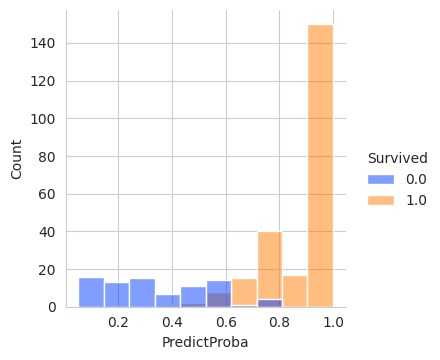

In [894]:
g = sns.displot(df_out.query("Split == 'Train' and Sex == 'female'"), x="PredictProba", hue="Survived", palette="bright", height=3.7)

In [897]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

tab = {
    "DT": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1": [],
    "TN": [],
    "TP": [],
    "FN": [],
    "FP": [],
}
decision_thresholds = np.arange(0.5, 0.71, 0.01)
y_true = df_out.query("Split == 'Train' and Sex == 'female'")["Survived"]
for dt in decision_thresholds:
    tab["DT"].append(dt)
    y_pred = df_out.query("Split == 'Train' and Sex == 'female'")["PredictProba"] >= dt
    tab["Accuracy"].append(round(accuracy_score(y_true, y_pred)*100,2))
    tab["Recall"].append(round(recall_score(y_true, y_pred, zero_division=np.nan)*100,2))
    tab["Precision"].append(round(precision_score(y_true, y_pred, zero_division=np.nan)*100,2))
    tab["F1"].append(round(f1_score(y_true, y_pred, zero_division=np.nan)*100,2))
    cm = confusion_matrix(y_true, y_pred, labels=[0,1])
    tab["TN"].append(cm[0,0])
    tab["TP"].append(cm[1,1])
    tab["FN"].append(cm[1,0])
    tab["FP"].append(cm[0,1])

pd.DataFrame(tab)

,DT,Accuracy,Precision,Recall,F1,TN,TP,FN,FP
0,0.50,92.99,91.70,99.57,95.47,60,232,1,21
1,0.51,93.31,92.40,99.14,95.65,62,231,2,19
2,0.52,92.99,92.37,98.71,95.44,62,230,3,19
3,0.53,93.31,92.74,98.71,95.63,63,230,3,18
4,0.54,94.59,94.26,98.71,96.44,67,230,3,14
5,0.55,94.90,95.02,98.28,96.62,69,229,4,12
6,0.56,95.54,95.82,98.28,97.03,71,229,4,10
7,0.57,95.22,95.80,97.85,96.82,71,228,5,10
8,0.58,94.90,95.78,97.42,96.60,71,227,6,10
9,0.59,95.22,96.58,97.00,96.79,73,226,7,8


#### Mr - underestimating survival

In [498]:
features = ["Pclass", "AgeBin", "FareBin", "FamilySize"]
metric = "FN"
for control_feature in features:
    fp = df_out.query("Split == 'Train' and Title == 'Mr' and CM == @metric")[control_feature].value_counts().reset_index().rename(columns={"count": f"{metric.lower()}_count"})
    tot = df_out.query("Split == 'Train' and Title == 'Mr'")[control_feature].value_counts().reset_index().rename(columns={"count": "total_count"})
    merge = fp.merge(tot, on=control_feature)
    merge[f"{metric.lower()}_prop"] = (merge[f"{metric.lower()}_count"] / merge["total_count"]*100).round(2)
    merge = merge.sort_values(by=f"{metric.lower()}_prop", ascending=False)
    print(merge)
    print("-"*50)

   Pclass  fn_count  total_count  fn_prop
0       1        37          107    34.58
1       3        36          319    11.29
2       2         8           91     8.79
--------------------------------------------------
   AgeBin  fn_count  total_count  fn_prop
1      40        22           97    22.68
3      50        10           50    20.00
0      30        31          208    14.90
2       5        14          119    11.76
4     100         4           39    10.26
--------------------------------------------------
   FareBin  fn_count  total_count  fn_prop
4     1000         7           21    33.33
2       80        15           51    29.41
1       40        22           90    24.44
3       20         9           85    10.59
0       10        28          270    10.37
--------------------------------------------------
   FamilySize  fn_count  total_count  fn_prop
1           1        14           68    20.59
0           0        61          397    15.37
2           2         6        

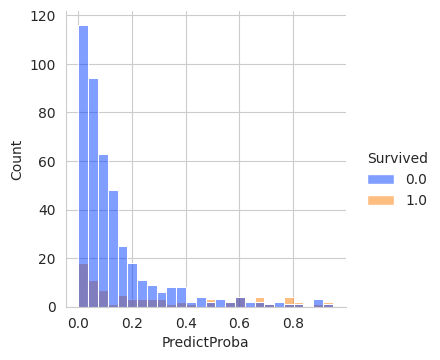

In [65]:
g = sns.displot(df_out.query("Split == 'Train' and Title == 'Mr'"), x="PredictProba", hue="Survived", palette="bright", height=3.7)

In [500]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

tab = {
    "DT": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1": [],
    "TN": [],
    "TP": [],
    "FN": [],
    "FP": [],
}
decision_thresholds = np.arange(0.3, 0.51, 0.01)
y_true = df_out.query("Split == 'Train' and Title == 'Mr'")["Survived"]
for dt in decision_thresholds:
    tab["DT"].append(dt)
    y_pred = df_out.query("Split == 'Train' and Title == 'Mr'")["PredictProba"] >= dt
    tab["Accuracy"].append(round(accuracy_score(y_true, y_pred)*100,2))
    tab["Recall"].append(round(recall_score(y_true, y_pred, zero_division=np.nan)*100,2))
    tab["Precision"].append(round(precision_score(y_true, y_pred, zero_division=np.nan)*100,2))
    tab["F1"].append(round(f1_score(y_true, y_pred, zero_division=np.nan)*100,2))
    cm = confusion_matrix(y_true, y_pred, labels=[0,1])
    tab["TN"].append(cm[0,0])
    tab["TP"].append(cm[1,1])
    tab["FN"].append(cm[1,0])
    tab["FP"].append(cm[0,1])

pd.DataFrame(tab)
    

,DT,Accuracy,Precision,Recall,F1,TN,TP,FN,FP
0,0.30,79.30,33.75,33.33,33.54,383,27,54,53
1,0.31,80.08,35.14,32.10,33.55,388,26,55,48
2,0.32,80.46,35.71,30.86,33.11,391,25,56,45
3,0.33,80.08,33.82,28.40,30.87,391,23,58,45
4,0.34,80.08,32.81,25.93,28.97,393,21,60,43
5,0.35,80.08,32.26,24.69,27.97,394,20,61,42
6,0.36,81.62,36.54,23.46,28.57,403,19,62,33
7,0.37,82.21,38.30,22.22,28.12,407,18,63,29
8,0.38,82.79,40.48,20.99,27.64,411,17,64,25
9,0.39,82.79,38.89,17.28,23.93,414,14,67,22


### Survival and prediction rate vs. features

In [279]:
print(df_out.query("Split == 'Train'").Survived.mean())
print(df_out.query("Split == 'Train'").Prediction.mean())
# (38.38-34.34)

0.3838383838383838
0.3378226711560045


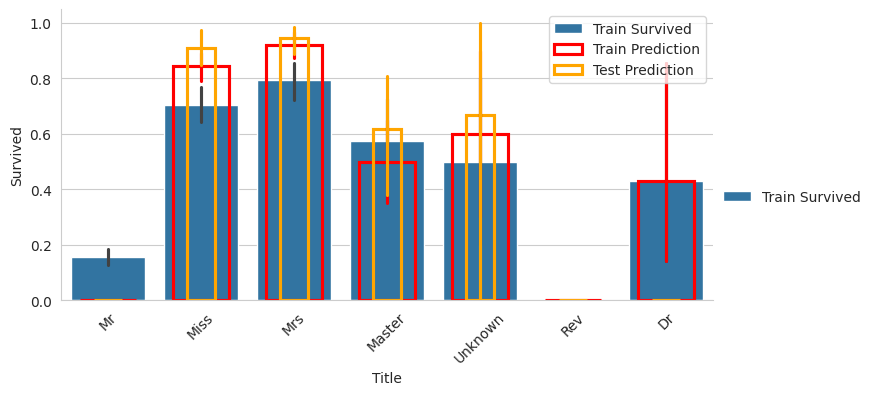

In [280]:
# Title
g = sns.catplot(df_out.query("Split == 'Train'"), kind="bar", x="Title", y="Survived", order=df_out.Title.value_counts().sort_values(ascending=False).index, height=3.7, aspect=2, fill=True, label="Train Survived")
_ = sns.barplot(df_out.query("Split == 'Train'"), x="Title", y="Prediction", label="Train Prediction", ax=g.ax, color="red", width=0.6, fill=False)
_ = sns.barplot(df_out.query("Split == 'Test'"), x="Title", y="Prediction", label="Test Prediction", ax=g.ax, color="orange", width=0.3, fill=False)
_ = g.ax.legend()
_ = g.ax.tick_params(axis="x", labelrotation=45)

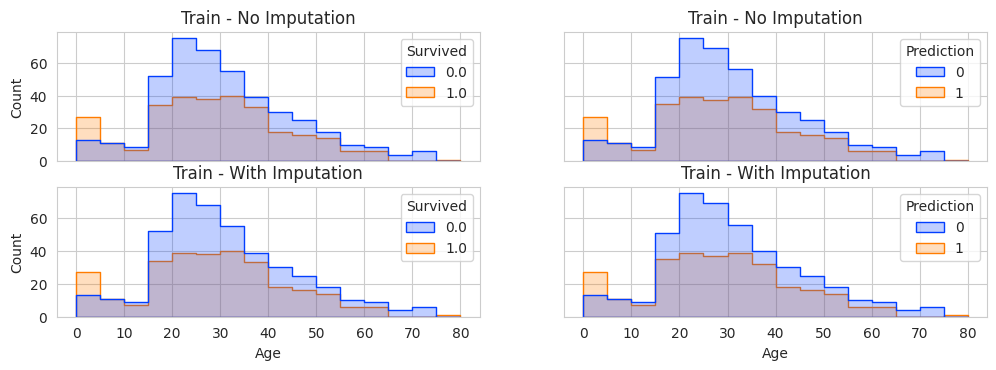

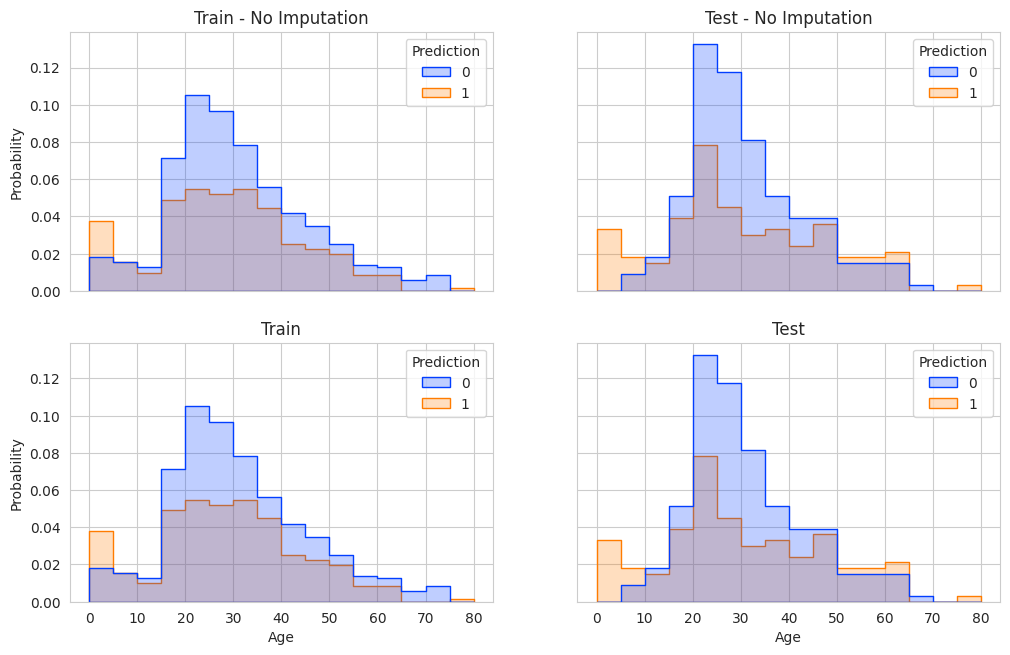

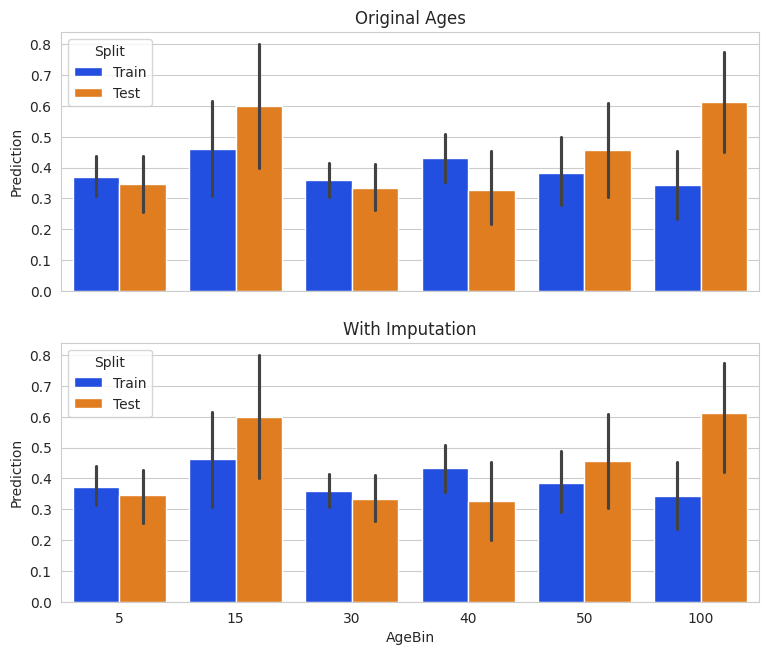

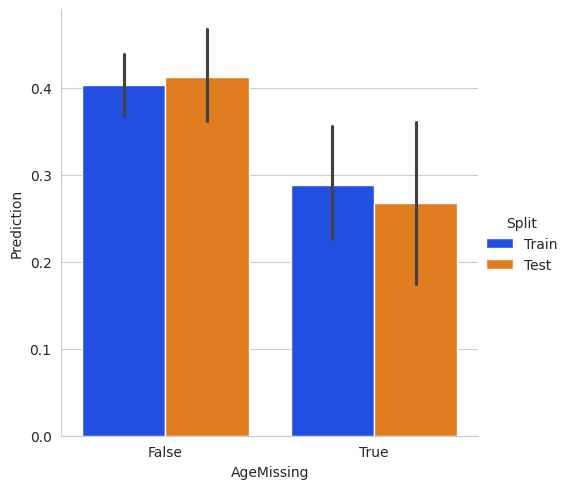

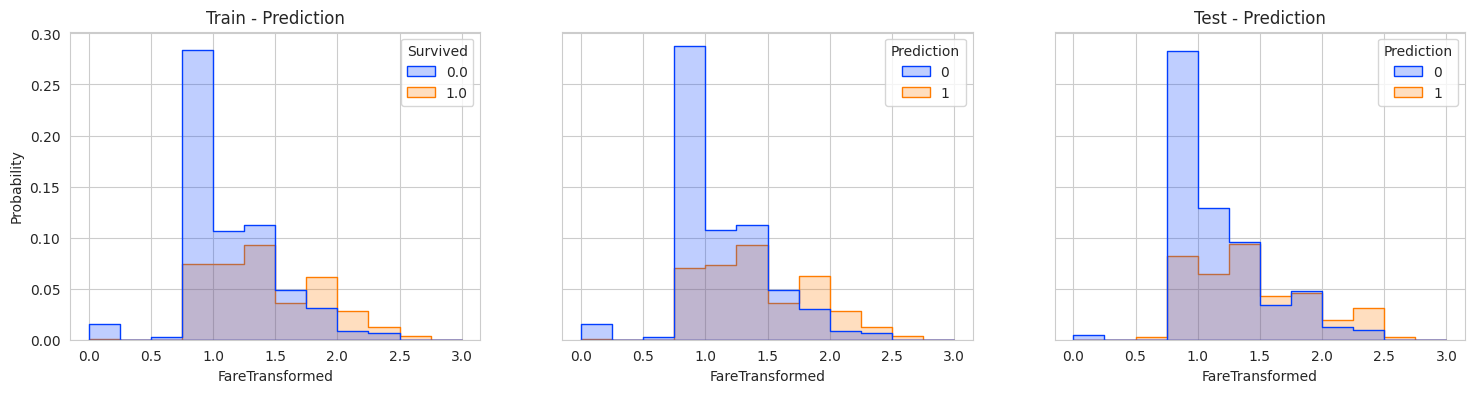

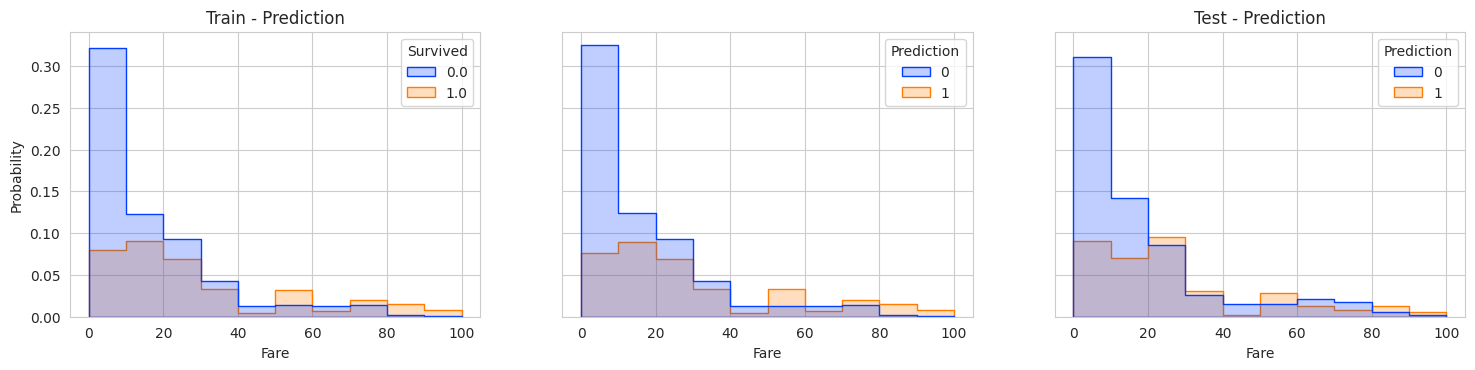

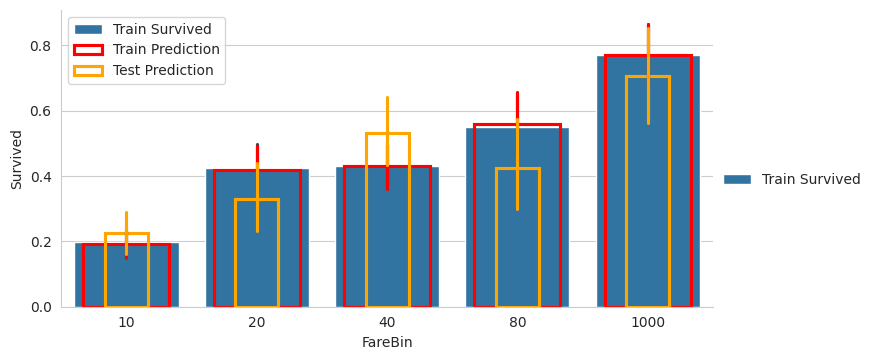

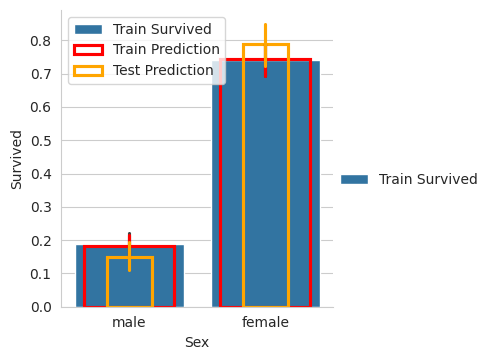

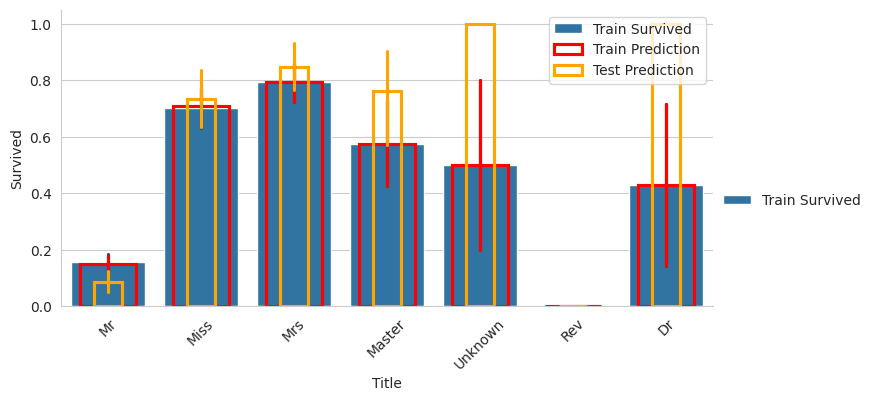

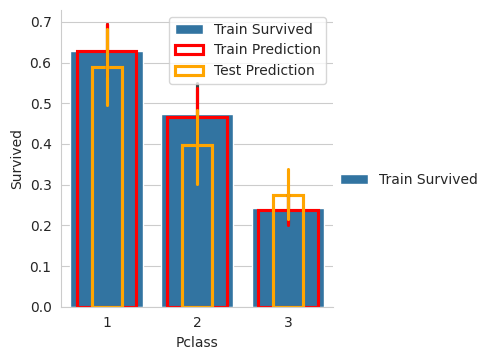

In [ ]:
# Age - not much difference between survival and prediction
f, axs = plt.subplots(nrows=2, ncols=2, figsize=(6*2, 3.7), sharex=True, sharey=True)
_ = sns.histplot(df_out.query("Split == 'Train'"), x="AgeOG", hue="Survived", palette="bright", element="step", bins=range(0,85,5), ax=axs[0][0])
_ = sns.histplot(df_out.query("Split == 'Train'"), x="AgeOG", hue="Prediction", palette="bright", element="step", bins=range(0,85,5), ax=axs[0][1])
_ = sns.histplot(df_out.query("Split == 'Train'"), x="Age", hue="Survived", palette="bright", element="step", bins=range(0,85,5), ax=axs[1][0])
_ = sns.histplot(df_out.query("Split == 'Train'"), x="Age", hue="Prediction", palette="bright", element="step", bins=range(0,85,5), ax=axs[1][1])
_ = axs[0][0].set_title("Train - No Imputation")
_ = axs[0][1].set_title("Train - No Imputation")
_ = axs[1][0].set_title("Train - With Imputation")
_ = axs[1][1].set_title("Train - With Imputation")
f, axs = plt.subplots(nrows=2, ncols=2, figsize=(6*2, 3.7*2), sharex=True, sharey=True)
_ = sns.histplot(df_out.query("Split == 'Train'"), x="AgeOG", hue="Prediction", element="step", bins=range(0,85,5), palette="bright", stat="probability", ax=axs[0][0])
_ = sns.histplot(df_out.query("Split == 'Test'"), x="AgeOG", hue="Prediction", element="step", bins=range(0,85,5), palette="bright", stat="probability", ax=axs[0][1])
_ = sns.histplot(df_out.query("Split == 'Train'"), x="Age", hue="Prediction", element="step", bins=range(0,85,5), palette="bright", stat="probability", ax=axs[1][0])
_ = sns.histplot(df_out.query("Split == 'Test'"), x="Age", hue="Prediction", element="step", bins=range(0,85,5), palette="bright", stat="probability", ax=axs[1][1])
_ = axs[0][0].set_title("Train - No Imputation")
_ = axs[0][1].set_title("Test - No Imputation")
_ = axs[1][0].set_title("Train")
_ = axs[1][1].set_title("Test")
f, axs = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(6*1.5, 3.7*2))
_ = sns.barplot(df_out, x="AgeOGBin", y="Prediction", hue="Split", palette="bright", ax=axs[0])
_ = sns.barplot(df_out, x="AgeBin", y="Prediction", hue="Split", palette="bright", ax=axs[1])
_ = axs[0].set_title("Original Ages")
_ = axs[1].set_title("With Imputation")
g = sns.catplot(df_out, x="AgeMissing", y="Prediction", kind="bar", hue="Split", palette="bright")

# Fare
f, axs = plt.subplots(ncols=3, figsize=(6*3, 4), sharex=True, sharey=True)
_ = sns.histplot(df_out.query("Split == 'Train'"), x="FareTransformed", hue="Survived", element="step", bins=np.arange(0,3.25,0.25), palette="bright", stat="probability", ax=axs[0])
_ = sns.histplot(df_out.query("Split == 'Train'"), x="FareTransformed", hue="Prediction", element="step", bins=np.arange(0,3.25,0.25), palette="bright", stat="probability", ax=axs[1])
_ = sns.histplot(df_out.query("Split == 'Test'"), x="FareTransformed", hue="Prediction", element="step", bins=np.arange(0,3.25,0.25), palette="bright", stat="probability", ax=axs[2])
_ = axs[0].set_title("Train - Survived")
_ = axs[0].set_title("Train - Prediction")
_ = axs[2].set_title("Test - Prediction")
f, axs = plt.subplots(ncols=3, figsize=(6*3, 3.7), sharex=True, sharey=True)
_ = sns.histplot(df_out.query("Fare <= 100 and Split == 'Train'"), x="Fare", hue="Survived", element="step", bins=range(0, 110, 10), palette="bright", stat="probability", ax=axs[0])
_ = sns.histplot(df_out.query("Fare <= 100 and Split == 'Train'"), x="Fare", hue="Prediction", element="step", bins=range(0, 110, 10), palette="bright", stat="probability", ax=axs[1])
_ = sns.histplot(df_out.query("Fare <= 100 and Split == 'Test'"), x="Fare", hue="Prediction", element="step", bins=range(0, 110, 10), palette="bright", stat="probability", ax=axs[2])
_ = axs[0].set_title("Train - Survived")
_ = axs[0].set_title("Train - Prediction")
_ = axs[2].set_title("Test - Prediction")
g = sns.catplot(df_out.query("Split == 'Train'"), x="FareBin", y="Survived", kind="bar", height=3.7, aspect=2, label="Train Survived")
_ = sns.barplot(df_out.query("Split == 'Train'"), x="FareBin", y="Prediction", color="red", fill=False, width=0.66, label="Train Prediction")
_ = sns.barplot(df_out.query("Split == 'Test'"), x="FareBin", y="Prediction", color="orange", fill=False, width=0.33, label="Test Prediction")
_ = g.ax.legend()

# Sex
g = sns.catplot(df_out.query("Split == 'Train'"), x="Sex", y="Survived", kind="bar", height=3.7, label="Train Survived")
_ = sns.barplot(df_out.query("Split == 'Train'"), x="Sex", y="Prediction", color="red", fill=False, width=0.66, label="Train Prediction")
_ = sns.barplot(df_out.query("Split == 'Test'"), x="Sex", y="Prediction", color="orange", fill=False, width=0.33, label="Test Prediction")
_ = g.ax.legend()

# Title
g = sns.catplot(df_out.query("Split == 'Train'"), kind="bar", x="Title", y="Survived", order=df_out.Title.value_counts().sort_values(ascending=False).index, height=3.7, aspect=2, fill=True, label="Train Survived")
_ = sns.barplot(df_out.query("Split == 'Train'"), x="Title", y="Prediction", label="Train Prediction", ax=g.ax, color="red", width=0.6, fill=False)
_ = sns.barplot(df_out.query("Split == 'Test'"), x="Title", y="Prediction", label="Test Prediction", ax=g.ax, color="orange", width=0.3, fill=False)
_ = g.ax.legend()
_ = g.ax.tick_params(axis="x", labelrotation=45)

# Pclass
g = sns.catplot(df_out.query("Split == 'Train'"), x="Pclass", y="Survived", kind="bar", height=3.7, label="Train Survived")
_ = sns.barplot(df_out.query("Split == 'Train'"), x="Pclass", y="Prediction", color="red", fill=False, width=0.66, label="Train Prediction")
_ = sns.barplot(df_out.query("Split == 'Test'"), x="Pclass", y="Prediction", color="orange", fill=False, width=0.33, label="Test Prediction")
_ = g.ax.legend()

# g = sns.catplot(df_out, x="FamilySize", y="Survived", kind="bar")
# # g = sns.displot(df_out, x="FamilySize", hue="Survived", element="step", discrete=True, palette="bright")
# # g = sns.catplot(df_out, x="SibSp", y="Survived", kind="bar")
# # g = sns.catplot(df_out, x="Parch", y="Survived", kind="bar")
# g = sns.catplot(df_out, x="Deck", y="Survived", kind="bar", order=sorted(df_out.Deck.unique()))
# g = sns.catplot(df_out, x="Embarked", y="Survived", kind="bar", order=df_out.Embarked.value_counts().sort_values(ascending=False).index)

### The problem with "Mr"

What's happening: the model predicts all "Mr" to die. Good prediction - most of them do die.
* Take a look at misclassification rate across all features to see which subsets are misclassified the most
    * I think it's important to look not just at misclassification, but which kind of misclassification - false negative or false positive. In "Mr" case, it's mostly false negative.
    * For "Mr", it's the older and wealthier that are misclassified (makes sense since loss is dominated by the larger population of younger and poor)
    * However, for "Mr", it's the misclassification of young, poor, single men that will have the most impact on accuracy since this is by far the majority demographic.
    * What does this mean? Should I weight the young, poor, single men even more?
* Even if the survival rate isn't actually 0%, it's like 10-15%. So we always predict that they die because it's not like we can randomly pick 15% of them to survive (unless we change our threshold). Exactly - when I check prediction probability across all "Mr" samples, the mean probability is 15%. This matches the survival rate, but the prediction rate is much lower (almost zero for the test set).
    * This is true for both train and test splits - prediction rate is much lower than actual survival rate (although test is worse)
* DO NOT USE test set for tuning the learning algorithm.
* Training and validation
    * Does it make sense to "weight" Title less? Or Sex less? I bet this is why you can't achieve better than 77%. The model is super fixated on these features (but what about feature importance?). Can you weight features less? Or weight specific samples less.
    * Does it make sense to use recall/precision/F1 score to evaluate generalization?
* Does it make sense to change threshold? Is that how RandomForestClassifier works?
    * Look at predict_proba distribution per Title. For Mr that survived, is predict_proba higher?
    * Look at recall and precision per Title.
* Changing decision threshold for "Mr" doesn't help - you end up overestimating survival rate for Pclass 1 and still underestimating survival for lower Pclass. More false positives, fewer false negatives; overall accuracy drops.
* Increasing sample weight for surviving "Mr" also doesn't help - it actually has the same effect as changing the decision threshold. Because now you really penalize false negatives, so you get fewer false negatives at the cost of more false positives.
* Double-check your original setup with stratification by Survived 
* mlflow experiment tracking/save models
* Try single-feature classification
* For the "Mr" that do survive, is there anything distinguishing them from the others? Is there some feature that predicts that they could survive?

Training:
* Try adding all features to let the model learn - revisit survival rate for "Mr" as a function of other features. Even if survival rate is less than 50%, any feature that increases survival rate is important. Hopefully this means that adding the feature and increasing the weight for surviving "Mr" will increase accuracy.
* Try increasing the weight for surviving "Mr"
* You can tune prediction thresholds after training

In [63]:
df_out.query("Title == 'Mr'").groupby("Split").Pclass.value_counts(normalize=True).sort_index().reset_index()

,Split,Pclass,proportion
0,Test,1,0.216667
1,Test,2,0.245833
2,Test,3,0.537500
3,Train,1,0.206963
4,Train,2,0.176015
5,Train,3,0.617021


In [64]:
(df_out.query("Split == 'Train'").groupby("Title").Survived.value_counts().sort_values(ascending=False)/len(df_train)*100).reset_index()

,Title,Survived,count
0,Mr,0.0,48.933782
1,Miss,1.0,14.590348
2,Mrs,1.0,11.223345
3,Mr,1.0,9.090909
4,Miss,0.0,6.172840
5,Mrs,0.0,2.918070
6,Master,1.0,2.581369
7,Master,0.0,1.907969
8,Rev,0.0,0.673401
9,Unknown,0.0,0.561167


In [ ]:
print(df_out.query("Split == 'Train' and Title == 'Mr'").groupby("Pclass").Misclassified.agg(["count", "mean"]))
print("")
print(df_out.query("Split == 'Train' and Title == 'Mr'").groupby("AgeBin").Misclassified.agg(["count", "mean"]))
print("")
print(df_out.query("Split == 'Train' and Title == 'Mr'").groupby("FareBin").Misclassified.agg(["count", "mean"]))
print("")
print(df_out.query("Split == 'Train' and Title == 'Mr'").groupby("FamilySize").Misclassified.agg(["count", "mean"]))
print("")
print(df_out.query("Split == 'Train' and Title == 'Mr'").groupby("SibSp").Misclassified.agg(["count", "mean"]))
print("")
print(df_out.query("Split == 'Train' and Title == 'Mr'").groupby("Parch").Misclassified.agg(["count", "mean"]))
print("")
print(df_out.query("Split == 'Train' and Title == 'Mr'").groupby("AgeMissing").Misclassified.agg(["count", "mean"]))
print("")
print(df_out.query("Split == 'Train' and Title == 'Mr'").groupby("Embarked").Misclassified.agg(["count", "mean"]))
print("")
print(df_out.query("Split == 'Train' and Title == 'Mr'").groupby("Deck").Misclassified.agg(["count", "mean"]))
print("")

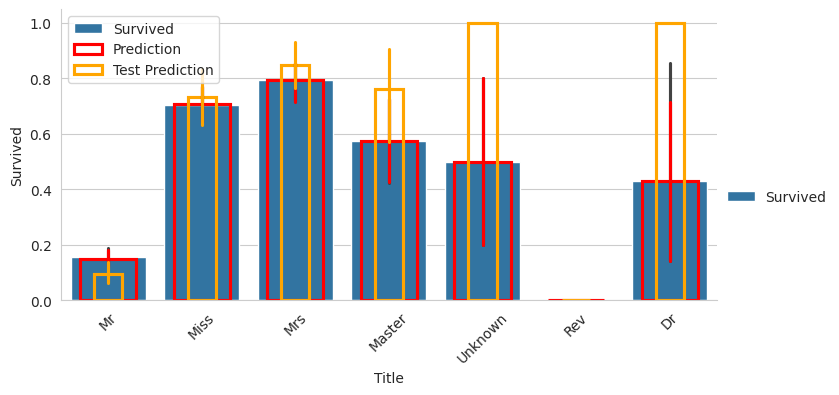

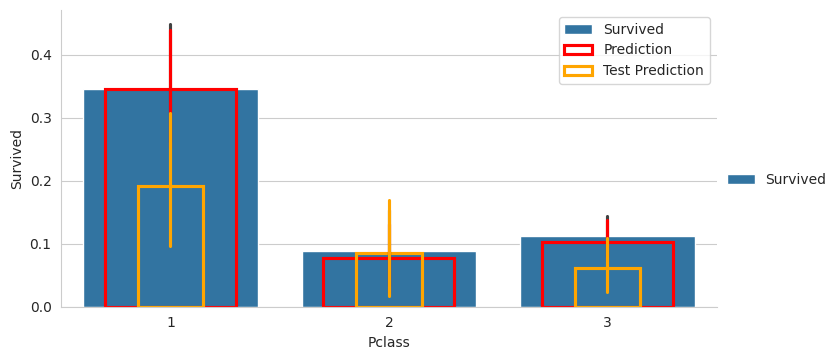

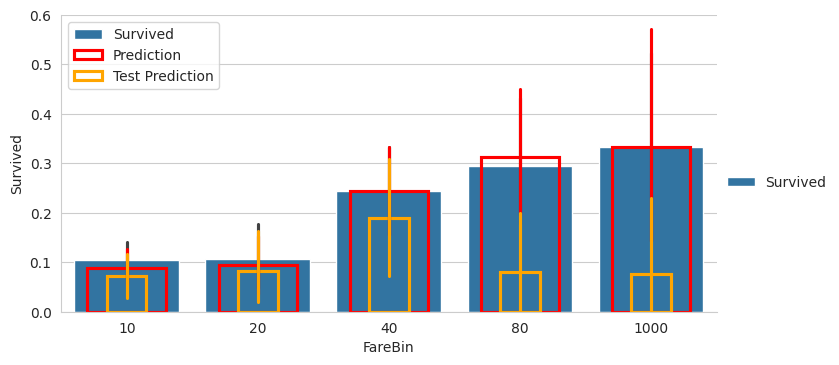

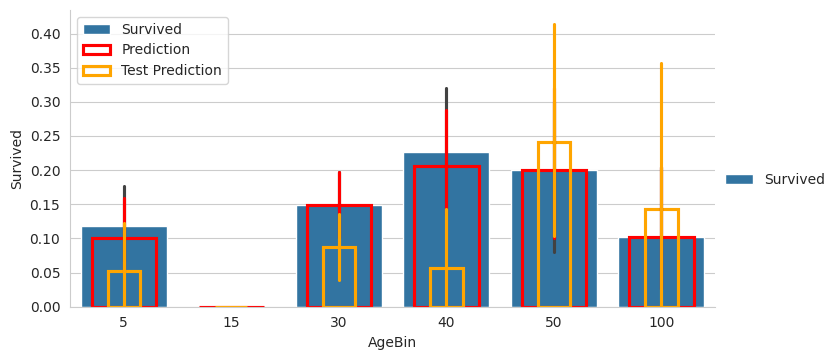

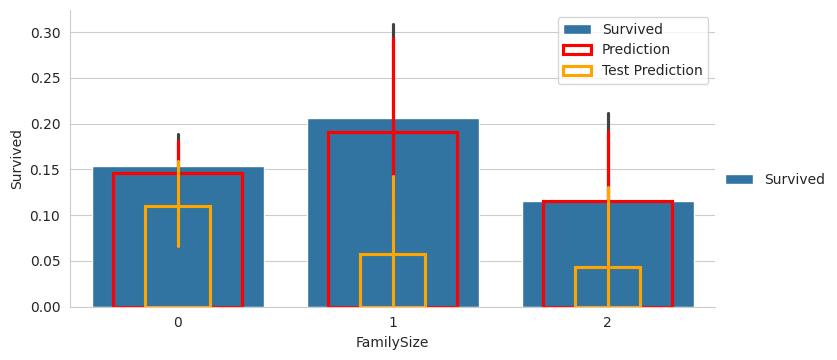

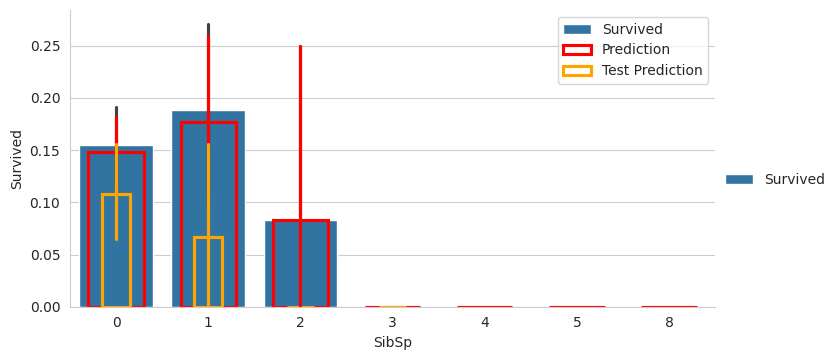

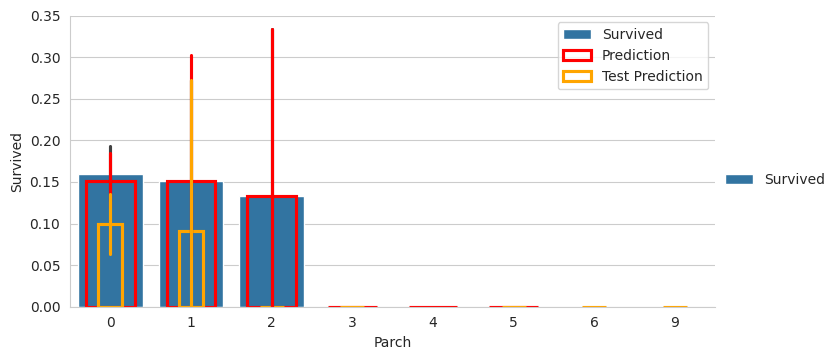

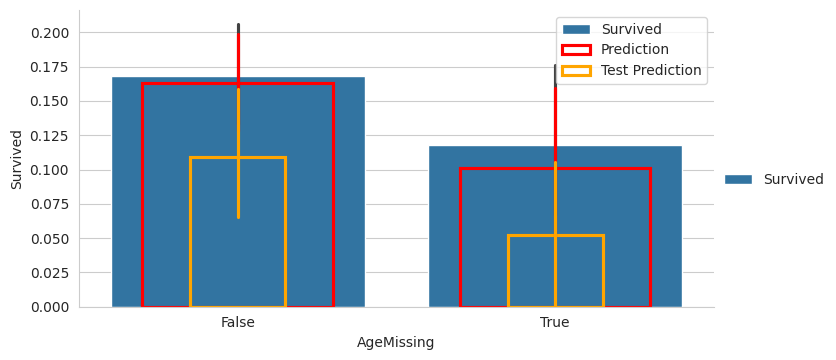

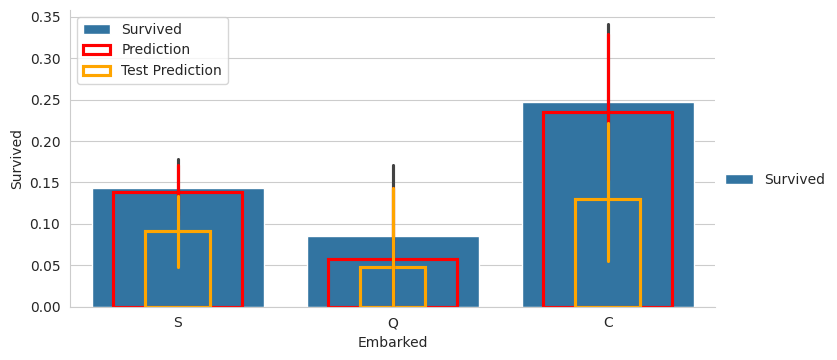

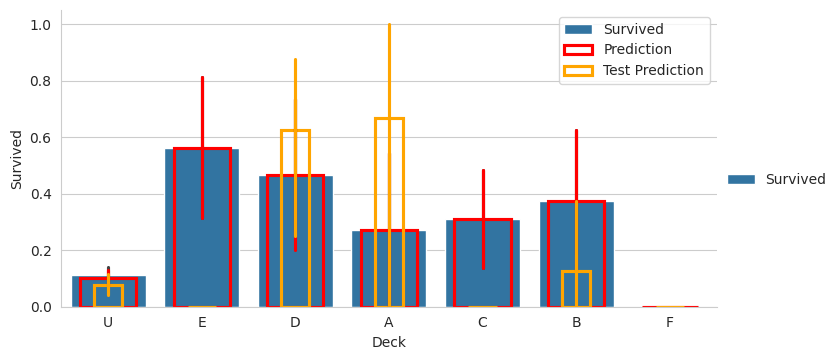

In [382]:
# Take a closer look at Title == Mr
g = sns.catplot(df_out.query("Split == 'Train'"), kind="bar", x="Title", y="Survived", order=df_out.Title.value_counts().sort_values(ascending=False).index, height=3.7, aspect=2, fill=True, label="Survived")
_ = sns.barplot(df_out.query("Split == 'Train'"), x="Title", y="Prediction", label="Prediction", ax=g.ax, color="red", width=0.6, fill=False)
_ = sns.barplot(df_out.query("Split == 'Test'"), x="Title", y="Prediction", label="Test Prediction", ax=g.ax, color="orange", width=0.3, fill=False)
_ = g.ax.legend()
_ = g.ax.tick_params(axis="x", labelrotation=45)
g = sns.catplot(df_out.query("Split == 'Train' and Title == 'Mr'"), kind="bar", x="Pclass", order=[1,2,3], y="Survived", height=3.7, aspect=2, label="Survived")
_ = sns.barplot(df_out.query("Split == 'Train' and Title == 'Mr'"), x="Pclass", order=[1,2,3], y="Prediction", ax=g.ax, label="Prediction", color="red", width=0.6, fill=False)
_ = sns.barplot(df_out.query("Split == 'Test' and Title == 'Mr'"), x="Pclass", order=[1,2,3], y="Prediction", ax=g.ax, label="Test Prediction", color="orange", width=0.3, fill=False)
_ = g.ax.legend()
g = sns.catplot(df_out.query("Split == 'Train' and Title == 'Mr'"), kind="bar", x="FareBin", y="Survived", height=3.7, aspect=2, label="Survived")
_ = sns.barplot(df_out.query("Split == 'Train' and Title == 'Mr'"), x="FareBin", y="Prediction", ax=g.ax, label="Prediction", color="red", width=0.6, fill=False)
_ = sns.barplot(df_out.query("Split == 'Test' and Title == 'Mr'"), x="FareBin", y="Prediction", ax=g.ax, label="Test Prediction", color="orange", width=0.3, fill=False)
_ = g.ax.legend()
g = sns.catplot(df_out.query("Split == 'Train' and Title == 'Mr'"), kind="bar", x="AgeBin", y="Survived", height=3.7, aspect=2, label="Survived")
_ = sns.barplot(df_out.query("Split == 'Train' and Title == 'Mr'"), x="AgeBin", y="Prediction", ax=g.ax, label="Prediction", color="red", width=0.6, fill=False)
_ = sns.barplot(df_out.query("Split == 'Test' and Title == 'Mr'"), x="AgeBin", y="Prediction", ax=g.ax, label="Test Prediction", color="orange", width=0.3, fill=False)
_ = g.ax.legend()

# The features below were not used in training
g = sns.catplot(df_out.query("Split == 'Train' and Title == 'Mr'"), kind="bar", x="FamilySize", y="Survived", height=3.7, aspect=2, label="Survived")
_ = sns.barplot(df_out.query("Split == 'Train' and Title == 'Mr'"), x="FamilySize", y="Prediction", ax=g.ax, label="Prediction", color="red", width=0.6, fill=False)
_ = sns.barplot(df_out.query("Split == 'Test' and Title == 'Mr'"), x="FamilySize", y="Prediction", ax=g.ax, label="Test Prediction", color="orange", width=0.3, fill=False)
_ = g.ax.legend()
g = sns.catplot(df_out.query("Split == 'Train' and Title == 'Mr'"), kind="bar", x="SibSp", y="Survived", height=3.7, aspect=2, label="Survived")
_ = sns.barplot(df_out.query("Split == 'Train' and Title == 'Mr'"), x="SibSp", y="Prediction", ax=g.ax, label="Prediction", color="red", width=0.6, fill=False)
_ = sns.barplot(df_out.query("Split == 'Test' and Title == 'Mr'"), x="SibSp", y="Prediction", ax=g.ax, label="Test Prediction", color="orange", width=0.3, fill=False)
_ = g.ax.legend()
g = sns.catplot(df_out.query("Split == 'Train' and Title == 'Mr'"), kind="bar", x="Parch", y="Survived", height=3.7, aspect=2, label="Survived")
_ = sns.barplot(df_out.query("Split == 'Train' and Title == 'Mr'"), x="Parch", y="Prediction", ax=g.ax, label="Prediction", color="red", width=0.6, fill=False)
_ = sns.barplot(df_out.query("Split == 'Test' and Title == 'Mr'"), x="Parch", y="Prediction", ax=g.ax, label="Test Prediction", color="orange", width=0.3, fill=False)
_ = g.ax.legend()
g = sns.catplot(df_out.query("Split == 'Train' and Title == 'Mr'"), kind="bar", x="AgeMissing", y="Survived", height=3.7, aspect=2, label="Survived")
_ = sns.barplot(df_out.query("Split == 'Train' and Title == 'Mr'"), x="AgeMissing", y="Prediction", ax=g.ax, label="Prediction", color="red", width=0.6, fill=False)
_ = sns.barplot(df_out.query("Split == 'Test' and Title == 'Mr'"), x="AgeMissing", y="Prediction", ax=g.ax, label="Test Prediction", color="orange", width=0.3, fill=False)
_ = g.ax.legend()
g = sns.catplot(df_out.query("Split == 'Train' and Title == 'Mr'"), kind="bar", x="Embarked", y="Survived", height=3.7, aspect=2, label="Survived")
_ = sns.barplot(df_out.query("Split == 'Train' and Title == 'Mr'"), x="Embarked", y="Prediction", ax=g.ax, label="Prediction", color="red", width=0.6, fill=False)
_ = sns.barplot(df_out.query("Split == 'Test' and Title == 'Mr'"), x="Embarked", y="Prediction", ax=g.ax, label="Test Prediction", color="orange", width=0.3, fill=False)
_ = g.ax.legend()
g = sns.catplot(df_out.query("Split == 'Train' and Title == 'Mr'"), kind="bar", x="Deck", y="Survived", height=3.7, aspect=2, label="Survived")
_ = sns.barplot(df_out.query("Split == 'Train' and Title == 'Mr'"), x="Deck", y="Prediction", ax=g.ax, label="Prediction", color="red", width=0.6, fill=False)
_ = sns.barplot(df_out.query("Split == 'Test' and Title == 'Mr'"), x="Deck", y="Prediction", ax=g.ax, label="Test Prediction", color="orange", width=0.3, fill=False)
_ = g.ax.legend()

count    517.000000
mean       0.156673
std        0.363844
Name: Survived, dtype: float64

       count      mean       std
Split                           
Test     240  0.025000  0.156451
Train    517  0.048356  0.214725

       count      mean    median       std
Split                                     
Test     240  0.152170  0.108518  0.114151
Train    517  0.156944  0.100008  0.140638


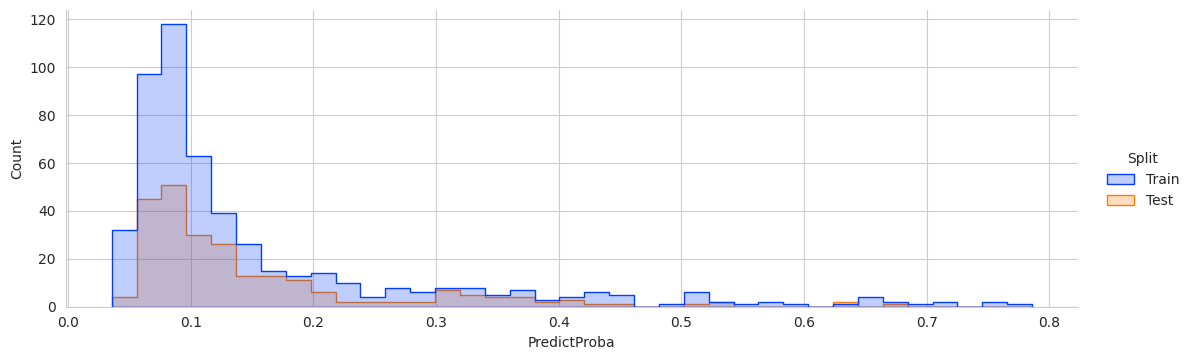

In [64]:
print(df_out.query("Title == 'Mr' and Split == 'Train'").Survived.agg(["count", "mean", "std"]))
print("")
print(df_out.query("Title == 'Mr'").groupby("Split").Prediction.agg(["count", "mean", "std"]))
print("")
print(df_out.query("Title == 'Mr'").groupby("Split").PredictProba.agg(["count", "mean", "median", "std"]))
g = sns.displot(df_out.query("Title == 'Mr'"), kind="hist", x="PredictProba", hue="Split", palette="bright", height=3.7, aspect=3, element="step")

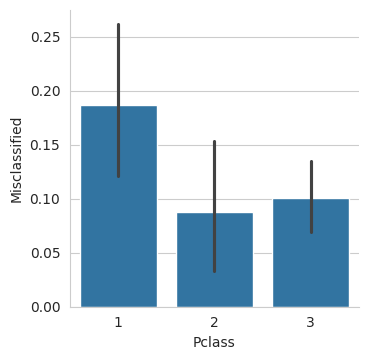

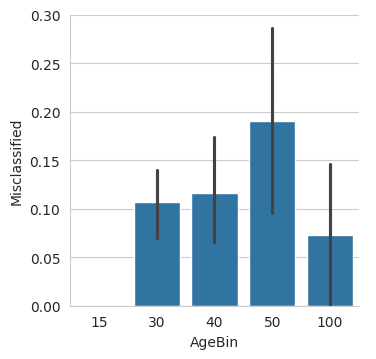

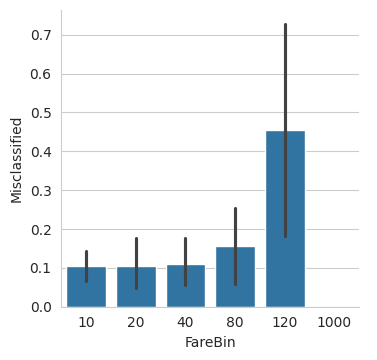

In [648]:
g = sns.catplot(df_out.query("Split == 'Train' and Title == 'Mr'"), kind="bar", x="Pclass", y="Misclassified", height=3.7)
g = sns.catplot(df_out.query("Split == 'Train' and Title == 'Mr'"), kind="bar", x="AgeBin", y="Misclassified", height=3.7)
g = sns.catplot(df_out.query("Split == 'Train' and Title == 'Mr'"), kind="bar", x="FareBin", y="Misclassified", height=3.7)

### What distinguishes a "Mr" survivor?

* For sure Pclass, Age, Fare
* Survival rate seems slightly higher for "Mr" with FamilySize=1
* Deck/Embarked are highly correlated with Pclass - ignore

In [742]:
df_out.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Prediction', 'PredictProba',
       'Misclassified', 'Split', 'AgeMissing', 'AgeOG', 'FamilySize', 'Title',
       'Deck', 'FareTransformed', 'AgeOGBin', 'AgeBin', 'FareBin'],
      dtype='object')

In [759]:
avg_surv_rate_mr = df_out.query("Split == 'Train' and Title == 'Mr'").Survived.mean()

In [774]:
print(df_out.query("Split == 'Train' and Title == 'Mr'").Survived.agg(["count", "mean", "std"]))
print("")
print(df_out.query("Split == 'Train' and Title == 'Mr'").groupby("FareBin").Survived.agg(["count", "mean", "std"]).sort_index())
print("")
print(df_out.query("Split == 'Train' and Title == 'Mr'").groupby("AgeBin").Survived.agg(["count", "mean", "std"]).sort_index())
print("")
print(df_out.query("Split == 'Train' and Title == 'Mr'").groupby("Pclass").Survived.agg(["count", "mean", "std"]).sort_index())
print("")
print(df_out.query("Split == 'Train' and Title == 'Mr'").groupby("FamilySize").Survived.agg(["count", "mean", "std"]).sort_index())
print("")
print(df_out.query("Split == 'Train' and Title == 'Mr'").groupby("Embarked").Survived.agg(["count", "mean", "std"]).sort_index())
print("")
print(df_out.query("Split == 'Train' and Title == 'Mr'").groupby("Deck").Survived.agg(["count", "mean", "std"]).sort_index())
print("")

count    517.000000
mean       0.156673
std        0.363844
Name: Survived, dtype: float64

         count      mean       std
FareBin                           
10         270  0.103704  0.305442
20          85  0.105882  0.309513
40          90  0.244444  0.432165
80          51  0.294118  0.460179
1000        21  0.333333  0.483046

        count      mean       std
AgeBin                           
15          4  0.000000  0.000000
30        271  0.136531  0.343987
40        138  0.181159  0.386553
50         63  0.238095  0.429339
100        41  0.097561  0.300406

        count      mean       std
Pclass                           
1         107  0.345794  0.477865
2          91  0.087912  0.284736
3         319  0.112853  0.316910

            count      mean       std
FamilySize                           
0             397  0.153652  0.361070
1              68  0.205882  0.407351
2              52  0.115385  0.322603

          count      mean       std
Embarked                 

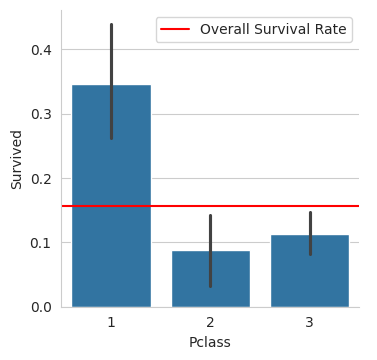

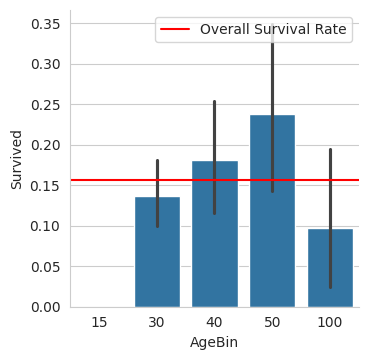

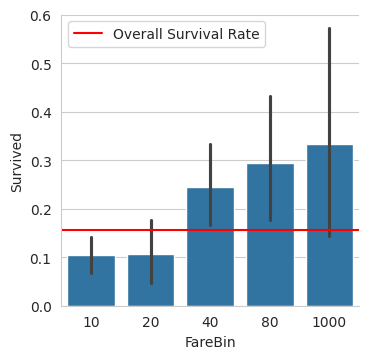

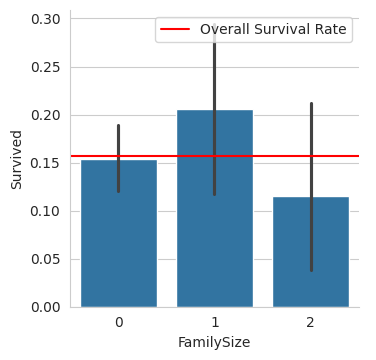

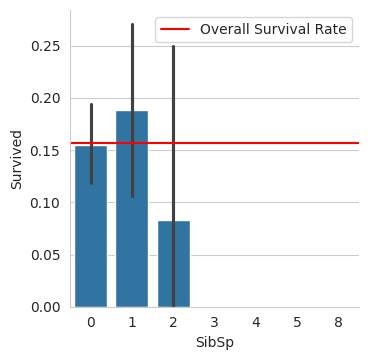

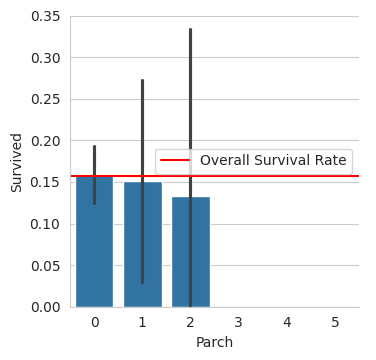

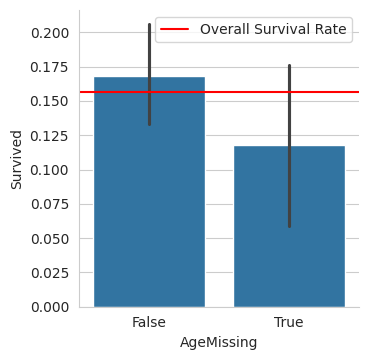

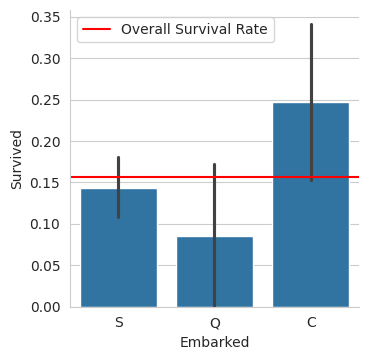

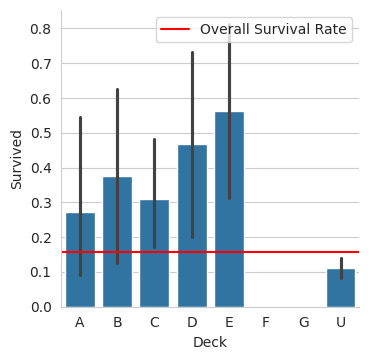

In [775]:
# What distinguishes a Mr that survives?

g = sns.catplot(df_out.query("Split == 'Train' and Title == 'Mr'"), kind="bar", x="Pclass", y="Survived", height=3.7)
_ = g.ax.axhline(y=avg_surv_rate_mr, label="Overall Survival Rate", color="red")
_ = g.ax.legend()
g = sns.catplot(df_out.query("Split == 'Train' and Title == 'Mr'"), kind="bar", x="AgeBin", y="Survived", height=3.7)
_ = g.ax.axhline(y=avg_surv_rate_mr, label="Overall Survival Rate", color="red")
_ = g.ax.legend()
g = sns.catplot(df_out.query("Split == 'Train' and Title == 'Mr'"), kind="bar", x="FareBin", y="Survived", height=3.7)
_ = g.ax.axhline(y=avg_surv_rate_mr, label="Overall Survival Rate", color="red")
_ = g.ax.legend()
# g = sns.catplot(df_out.query("Split == 'Train' and Title == 'Mr'"), kind="bar", x="AgeBin", y="Survived", col="Pclass", height=3.7)
# g = sns.catplot(df_out.query("Split == 'Train' and Title == 'Mr'"), kind="bar", x="FareBin", y="Survived", col="Pclass", height=3.7)
# g = sns.catplot(df_out.query("Split == 'Train' and Title == 'Mr'"), kind="bar", x="FareBin", y="Survived", row="AgeBin", col="Pclass", height=3, aspect=2)
g = sns.catplot(df_out.query("Split == 'Train' and Title == 'Mr'"), kind="bar", x="FamilySize", y="Survived", height=3.7)
_ = g.ax.axhline(y=avg_surv_rate_mr, label="Overall Survival Rate", color="red")
_ = g.ax.legend()
g = sns.catplot(df_out.query("Split == 'Train' and Title == 'Mr'"), kind="bar", x="SibSp", y="Survived", height=3.7)
_ = g.ax.axhline(y=avg_surv_rate_mr, label="Overall Survival Rate", color="red")
_ = g.ax.legend()
g = sns.catplot(df_out.query("Split == 'Train' and Title == 'Mr'"), kind="bar", x="Parch", y="Survived", height=3.7)
_ = g.ax.axhline(y=avg_surv_rate_mr, label="Overall Survival Rate", color="red")
_ = g.ax.legend()
g = sns.catplot(df_out.query("Split == 'Train' and Title == 'Mr'"), kind="bar", x="AgeMissing", y="Survived", height=3.7)
_ = g.ax.axhline(y=avg_surv_rate_mr, label="Overall Survival Rate", color="red")
_ = g.ax.legend()
g = sns.catplot(df_out.query("Split == 'Train' and Title == 'Mr'"), kind="bar", x="Embarked", y="Survived", height=3.7)
_ = g.ax.axhline(y=avg_surv_rate_mr, label="Overall Survival Rate", color="red")
_ = g.ax.legend()
g = sns.catplot(df_out.query("Split == 'Train' and Title == 'Mr'"), kind="bar", x="Deck", y="Survived", height=3.7, order=sorted(df_out.Deck.unique()))
_ = g.ax.axhline(y=avg_surv_rate_mr, label="Overall Survival Rate", color="red")
_ = g.ax.legend()

# Sanity-check the train-test distributions

In [329]:
df_train = pd.read_csv("./dataset/train.csv")
df_test = pd.read_csv("./dataset/test.csv")
df_train["Split"] = "Train"
df_test["Split"] = "Test"
df = pd.concat((df_train, df_test), axis=0).reset_index(drop=True)

In [330]:
from custom_transformers import DynamicDataPrepPipeline
from sklearn.ensemble import RandomForestRegressor

data_prep_pipe = DynamicDataPrepPipeline(extract_fam=True, extract_title=True)
data_prep_pipe = DynamicDataPrepPipeline(extract_fam=True, extract_title=True, age_imputer_model=RandomForestRegressor(max_depth=10, random_state=0),
                                         impute_age_kwargs={"add_indicator": True, "feature_names": {"numeric": {"FamilySize", "SibSp", "Pclass", "FareTransformed"}, "ordinal": {"Sex"}, "onehot": {"Title"}}})
data_prep_pipe.fit(df_train)
df_train_out = data_prep_pipe.feature_extractor_.transform(df_train)
data_prep_pipe.fit(df_test)
df_test_out = data_prep_pipe.feature_extractor_.transform(df_test)

df_out = pd.concat((df_train_out, df_test_out), axis=0).reset_index(drop=True)
df_out["AgeOG"] = df["Age"]

print(df_out.shape)
print(df_out.columns)

(1309, 16)
Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Split', 'FamilySize', 'Title',
       'FareTransformed', 'Age_Missing', 'AgeOG'],
      dtype='object')


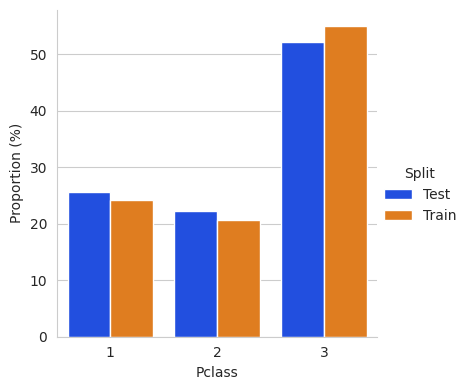

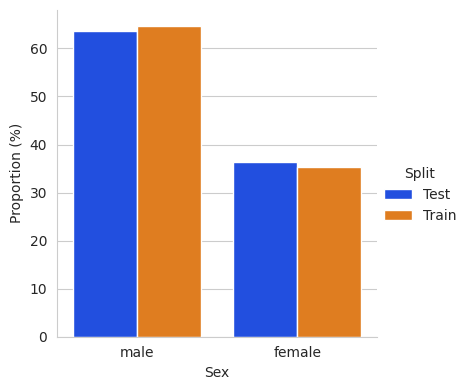

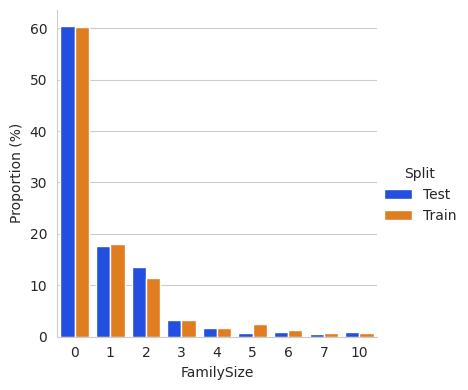

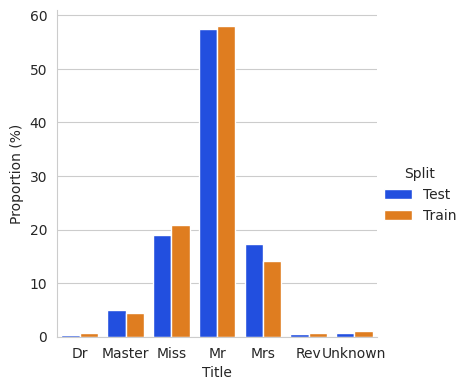

In [331]:
pclass_dist = (df_out.groupby("Split").Pclass.value_counts(normalize=True).sort_index()*100).reset_index()
sex_dist = (df_out.groupby("Split").Sex.value_counts(normalize=True)*100).reset_index()
fam_dist = (df_out.groupby("Split").FamilySize.value_counts(normalize=True).sort_index()*100).reset_index()
title_dist = (df_out.groupby("Split").Title.value_counts(normalize=True).sort_index()*100).reset_index()

g = sns.catplot(pclass_dist, kind="bar", x="Pclass", y="proportion", hue="Split", palette="bright", height=4)
_ = g.ax.set_ylabel("Proportion (%)")
g = sns.catplot(sex_dist, kind="bar", x="Sex", y="proportion", hue="Split", palette="bright", height=4)
_ = g.ax.set_ylabel("Proportion (%)")
g = sns.catplot(fam_dist, kind="bar", x="FamilySize", y="proportion", hue="Split", palette="bright", height=4)
_ = g.ax.set_ylabel("Proportion (%)")
g = sns.catplot(title_dist, kind="bar", x="Title", y="proportion", hue="Split", palette="bright", height=4)
_ = g.ax.set_ylabel("Proportion (%)")

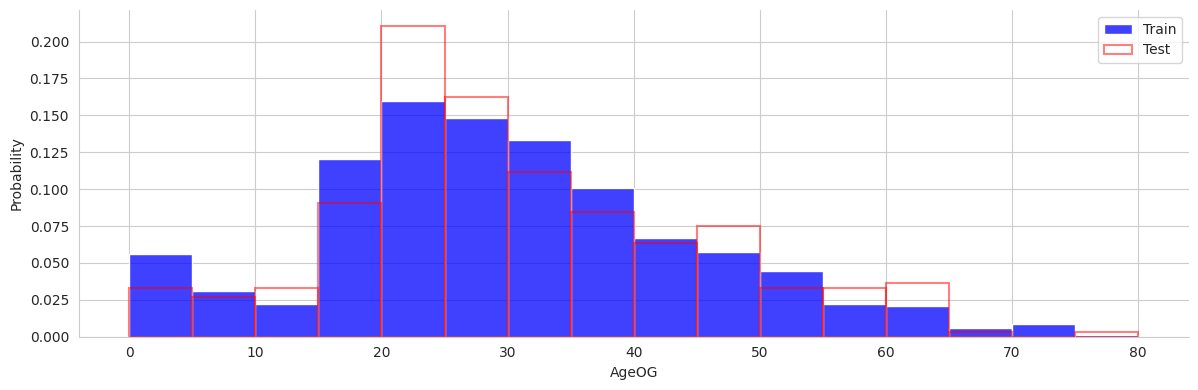

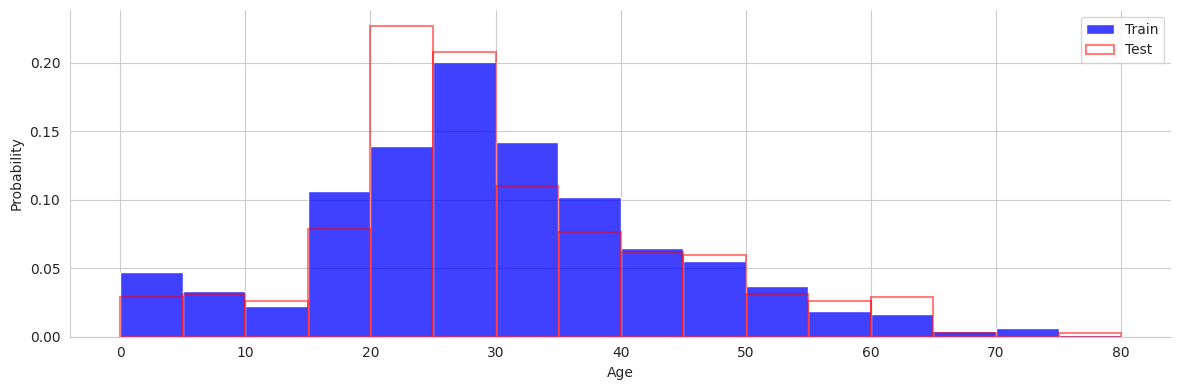

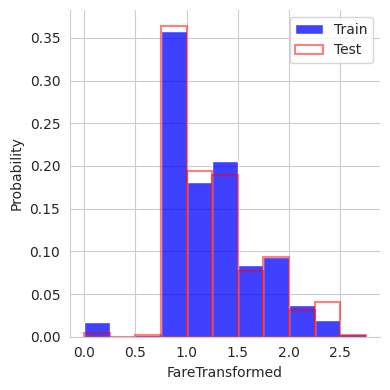

In [332]:
g = sns.displot(df_out.query("Split == 'Train'"), kind="hist", x="AgeOG", bins=range(0,85,5), height=4, aspect=3, label="Train", stat="probability", color="blue")
_ = sns.histplot(df_out.query("Split == 'Test'"), x="AgeOG", bins=range(0,85,5), color="red", alpha=0.5, label="Test", stat="probability", ax = g.ax, fill=False)
_ = g.ax.legend()
g = sns.displot(df_out.query("Split == 'Train'"), kind="hist", x="Age", bins=range(0,85,5), height=4, aspect=3, label="Train", stat="probability", color="blue")
_ = sns.histplot(df_out.query("Split == 'Test'"), x="Age", bins=range(0,85,5), color="red", alpha=0.5, label="Test", stat="probability", ax = g.ax, fill=False)
_ = g.ax.legend()
g = sns.displot(df_out.query("Split == 'Train'"), kind="hist", x="FareTransformed", bins=np.arange(0, 3, 0.25), height=4, label="Train", stat="probability", color="blue")
_ = sns.histplot(df_out.query("Split == 'Test'"), x="FareTransformed", bins=np.arange(0, 3, 0.25), color="red", alpha=0.5, label="Test", stat="probability", ax = g.ax, fill=False)
_ = g.ax.legend()

       count      mean       std       min       25%       50%       75%  \
Split                                                                      
Test   332.0  5.982517  4.663007  0.046121  2.500229  5.027340  8.047415   
Train  714.0  6.454360  5.897722  0.005500  2.258022  4.899704  8.846023   

             max  
Split             
Test   28.348427  
Train  46.088358  

Split      
Test   0.50     5.027340
       0.75     8.047415
       0.90    12.293159
       0.95    14.828642
       0.99    20.019194
Train  0.50     4.899704
       0.75     8.846023
       0.90    14.298822
       0.95    17.339964
       0.99    29.469891
Name: MAE, dtype: float64



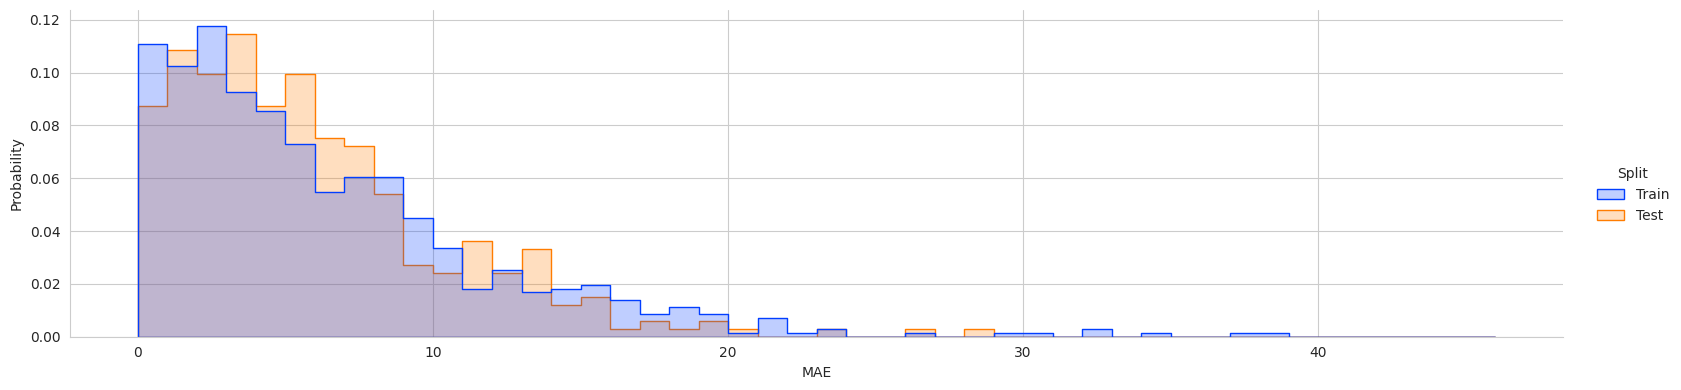

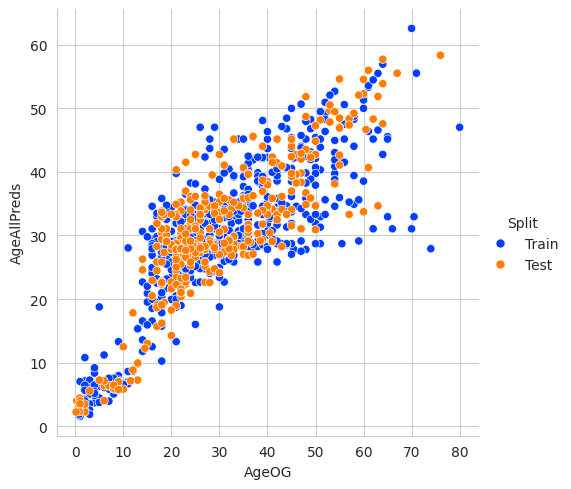

In [403]:
y_preds = data_prep_pipe.feature_extractor_.named_steps["age_imputer"].pipeline_.predict(df_out)

df_all_preds = df_out.copy()
df_all_preds["AgeAllPreds"] = y_preds
df_all_preds["MAE"] = df_all_preds["AgeOG"]
not_missing_mask = df_all_preds["MAE"].notna()
df_all_preds.loc[not_missing_mask, "MAE"] = np.abs(df_all_preds.loc[not_missing_mask, "AgeOG"] - df_all_preds.loc[not_missing_mask, "AgeAllPreds"])

print(df_all_preds.groupby("Split")["MAE"].describe())
print("")
print(df_all_preds.groupby("Split")["MAE"].quantile([0.5, 0.75, 0.9, 0.95, 0.99]))
print("")
g = sns.displot(df_all_preds, kind="hist", x="MAE", hue="Split", palette="bright", element="step", height=4, aspect=4, 
                stat="probability", common_norm=False, bins=range(0,np.ceil(df_all_preds["MAE"].max()).astype("int").item()))
g = sns.relplot(df_all_preds.loc[not_missing_mask], kind="scatter", x="AgeOG", y="AgeAllPreds", hue="Split", palette="bright")